# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [5]:
if os.path.isfile("sydney_airbnb_listing.csv"):
    filepath = "sydney_airbnb_listing.csv"
    print("loading from file")
else:
    filepath = "https://data.insideairbnb.com/australia/nsw/sydney/2024-03-16/data/listings.csv.gz"
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")


loading from file
done


In [6]:
listing_data.head()


id                                       listing_url  \
0  1050164598350388320  https://www.airbnb.com/rooms/1050164598350388320   
1  1096082243192434668  https://www.airbnb.com/rooms/1096082243192434668   
2              2167538              https://www.airbnb.com/rooms/2167538   
3   790607305500629830   https://www.airbnb.com/rooms/790607305500629830   
4   641106357139201992   https://www.airbnb.com/rooms/641106357139201992   

        scrape_id last_scraped       source  \
0  20240316023820   2024-03-18  city scrape   
1  20240316023820   2024-03-18  city scrape   
2  20240316023820   2024-03-18  city scrape   
3  20240316023820   2024-03-18  city scrape   
4  20240316023820   2024-03-18  city scrape   

                                            name  \
0                 Self service English breakfast   
1                   Apartment in Rushcutters Bay   
2            Modern Sydney home near beach,shops   
3                             Luxury double room   
4  Chic Studio Apartment in Prime Bondi Location   

                                         description  \
0  Close to transport airport older style unit ne...   
1  Full 2 bedroom apartment with balcony. Walking...   
2  **Availability extremely flexible**<br /><br /...   
3          Relax in this tranquil and stylish space.   
4  Immerse yourself in the vibrant atmosphere of ...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  Queens Park is a safe and friendly neighbourho...   
3                                                NaN   
4  Bondi is one of Australia’s most iconic suburb...   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  211218678  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...   26721338  ...   
2  https://a0.muscache.com/pictures/29922910/2399...   11059668  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...  202112801  ...   
4  https://a0.muscache.com/pictures/prohost-api/H...  279001183  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                         NaN                    NaN                 NaN   
2                        5.00                   5.00                4.00   
3                        4.77                   4.68                4.68   
4                        3.94                   4.94                4.29   

          license instant_bookable calculated_host_listings_count  \
0  PID-STRA-61891                f                              1   
1          Exempt                f                              2   
2             NaN                f                              1   
3  PID-STRA-21723                f                             30   
4  PID-STRA-36651                f                            217   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           1   
2                                           1   
3                                           5   
4                                         217   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            0   
3                                           25   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0               NaN  
2                                           0              0.01  
3                                           0              2.13  
4                                           0              0.8

`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [7]:
listing_data.sample(5)


id                                       listing_url  \
11486  1030972771184129219  https://www.airbnb.com/rooms/1030972771184129219   
7947   1069933211230817387  https://www.airbnb.com/rooms/1069933211230817387   
5535    623437900785458277   https://www.airbnb.com/rooms/623437900785458277   
11706  1085107026461030118  https://www.airbnb.com/rooms/1085107026461030118   
12460  1099806066177597628  https://www.airbnb.com/rooms/1099806066177597628   

            scrape_id last_scraped       source  \
11486  20240316023820   2024-03-16  city scrape   
7947   20240316023820   2024-03-18  city scrape   
5535   20240316023820   2024-03-16  city scrape   
11706  20240316023820   2024-03-16  city scrape   
12460  20240316023820   2024-03-18  city scrape   

                                                name  \
11486                Cosy Sunlit Home Away from Home   
7947   Beautiful Seaside Apartment Near Bondi Beach!   
5535                   Cheerful family-friendly room   
11706                       19 Bedroom Heritage Home   
12460               Brand New Apt Near Macquarie Prk   

                                             description  \
11486  Welcome to our charming granny flat, nestled w...   
7947   Easy-care beachside, contemporary style and co...   
5535   2 minutes from major highways to beaches/Blue ...   
11706  This beautiful Victorian Heritage House is set...   
12460  * Brandnew High end  apartment<br />* Free Wif...   

                                   neighborhood_overview  \
11486  Safe and Family friendly,  Parks and Leash fre...   
7947                                                 NaN   
5535   There is no traffic noise in this cute suburba...   
11706                                                NaN   
12460                                                NaN   

                                             picture_url    host_id  ...  \
11486  https://a0.muscache.com/pictures/miso/Hosting-...  249512991  ...   
7947   https://a0.muscache.com/pictures/hosting/Hosti...  509819926  ...   
5535   https://a0.muscache.com/pictures/miso/Hosting-...   59222682  ...   
11706  https://a0.muscache.com/pictures/miso/Hosting-...  232862903  ...   
12460  https://a0.muscache.com/pictures/hosting/Hosti...  488523187  ...   

      review_scores_communication review_scores_location review_scores_value  \
11486                         5.0                    5.0                 5.0   
7947                          5.0                    5.0                 5.0   
5535                          5.0                    5.0                 5.0   
11706                         NaN                    NaN                 NaN   
12460                         5.0                    5.0                 5.0   

              license instant_bookable calculated_host_listings_count  \
11486  PID-STRA-60158                f                              1   
7947   PID-STRA-62672                t                              2   
5535   PID-STRA-35867                f                              4   
11706          Exempt                f                              1   
12460  PID-STRA-63942                t                              4   

      calculated_host_listings_count_entire_homes  \
11486                                           1   
7947                                            2   
5535                                            3   
11706                                           1   
12460                                           4   

      calculated_host_listings_count_private_rooms  \
11486                                            0   
7947                                             0   
5535                                             1   
11706                                            0   
12460                                            0   

      calculated_host_listings_count_shared_rooms reviews_per_month  
11486                                           0              2.12  
7947            

We can also get the list of columns out of the data frame

In [8]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [9]:
row_one = listing_data.iloc[1]
row_one


id                                                                           1096082243192434668
listing_url                                     https://www.airbnb.com/rooms/1096082243192434668
scrape_id                                                                         20240316023820
last_scraped                                                                          2024-03-18
source                                                                               city scrape
                                                                      ...                       
calculated_host_listings_count                                                                 2
calculated_host_listings_count_entire_homes                                                    1
calculated_host_listings_count_private_rooms                                                   1
calculated_host_listings_count_shared_rooms                                                    0
reviews_per_month             

Series objects are _very_ similar to dictionaries. They have more properties though.

In [10]:
row_one["review_scores_rating"]

nan

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [11]:
row_one.review_scores_rating

nan

Doing the same thing on a dataframe gives us the whole column

In [12]:
listing_data.review_scores_rating

0         NaN
1         NaN
2        4.00
3        4.71
4        4.00
         ... 
14269    4.57
14270    4.87
14271    4.96
14272     NaN
14273    4.98
Name: review_scores_rating, Length: 14274, dtype: float64

<Axes: >

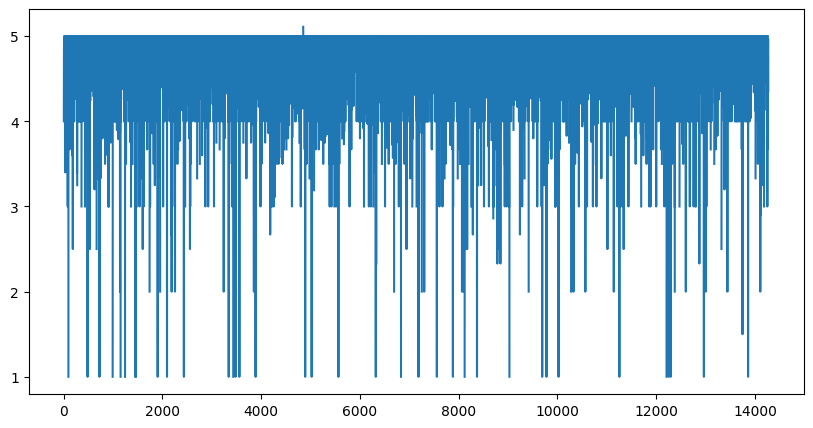

In [13]:
listing_data["review_scores_rating"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

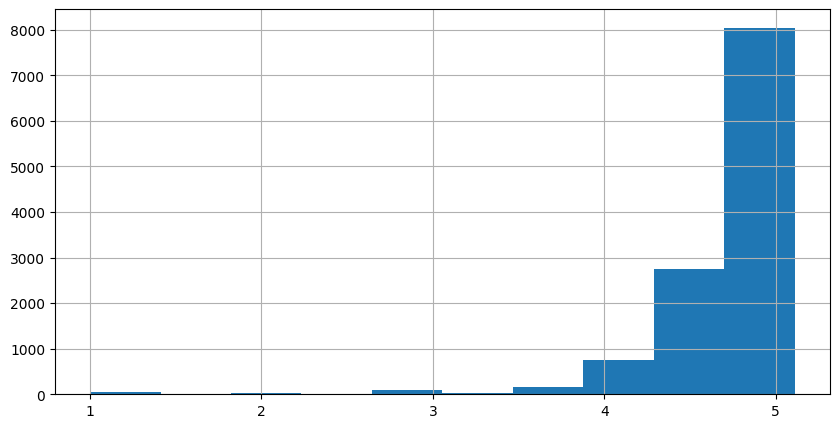

In [14]:
listing_data.review_scores_rating.hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<Axes: >

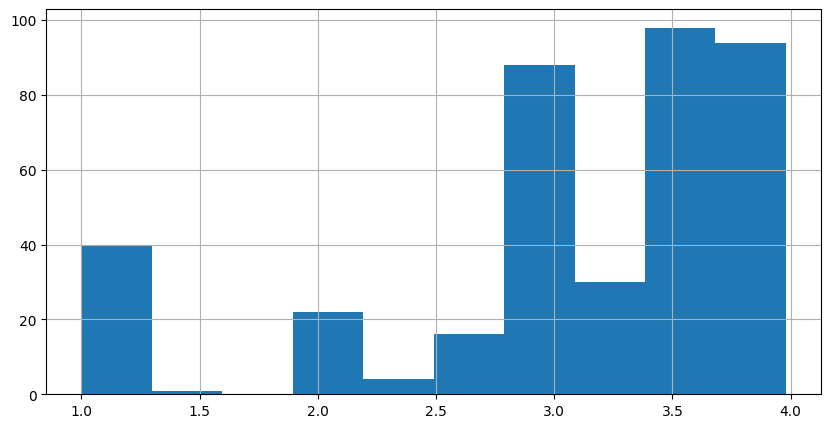

In [15]:
listing_data.review_scores_rating[listing_data.review_scores_rating < 4].hist()


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [16]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()


0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [17]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [18]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.


0      0
1      1
2      2
3      3
97    97
98    98
99    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [19]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = [("n" in pet_name) for pet_name in pets_series]
print("pattern:",pattern_of_bools)

pets_series[pattern_of_bools]

pattern: [False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False]


7                   Chicken
8                Guinea pig
9                    Donkey
12        Western honey bee
16                   pigeon
19           Bactrian camel
22               guineafowl
32                   canary
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
36    Fancy rat and Lab rat
37                     mink
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [20]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about


['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [21]:
[p for p in pets]

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [22]:
[p.upper() for p in pets]

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT AND LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [23]:
[p for p in pets if len(p) == 4]


['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [24]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'All ratings below 4')

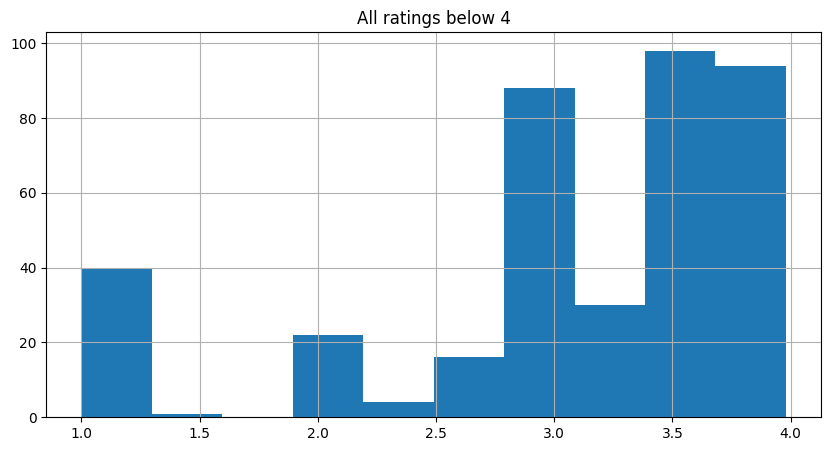

In [25]:
upper_bound = 4
listing_data.review_scores_rating[listing_data.review_scores_rating < upper_bound].hist()
plt.title(f"All ratings below {upper_bound}")


Let's see what's under $1000

Text(0.5, 1.0, 'All ratings below 3')

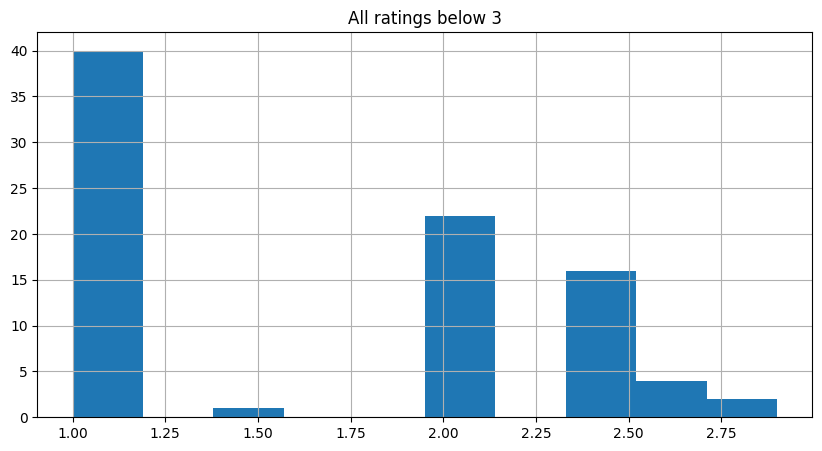

In [26]:
upper_bound = 3
listing_data.review_scores_rating[listing_data.review_scores_rating < upper_bound].hist()
plt.title(f"All ratings below {upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [27]:
listing_data.head(2)

id                                       listing_url  \
0  1050164598350388320  https://www.airbnb.com/rooms/1050164598350388320   
1  1096082243192434668  https://www.airbnb.com/rooms/1096082243192434668   

        scrape_id last_scraped       source                            name  \
0  20240316023820   2024-03-18  city scrape  Self service English breakfast   
1  20240316023820   2024-03-18  city scrape    Apartment in Rushcutters Bay   

                                         description neighborhood_overview  \
0  Close to transport airport older style unit ne...                   NaN   
1  Full 2 bedroom apartment with balcony. Walking...                   NaN   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  211218678  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...   26721338  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                         NaN                    NaN                 NaN   

          license instant_bookable calculated_host_listings_count  \
0  PID-STRA-61891                f                              1   
1          Exempt                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0               NaN  

[2 rows x 75 columns]

We can see that `FACE_VALUE` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [28]:
listing_data.license.value_counts()

license
Exempt            2104
PID-STRA-27025      32
PID-STRA-32849      29
PID-STRA-21723      28
PID-STRA-50900      20
                  ... 
PID-STRA-49146       1
PID-STRA-50221       1
PID-STRA-59109       1
PID-STRA-42187       1
PID-STRA-2304        1
Name: count, Length: 9126, dtype: int64

In [29]:
listing_data.source.value_counts()

source
city scrape    14274
Name: count, dtype: int64

In [30]:
listing_data.property_type.value_counts()

property_type
Entire rental unit               6134
Entire home                      3182
Private room in home             1362
Private room in rental unit       841
Entire guesthouse                 383
                                 ... 
Private room in vacation home       1
Private room in minsu               1
Private room in earthen home        1
Private room in cottage             1
Train                               1
Name: count, Length: 69, dtype: int64

In [31]:
listing_data.accommodates.value_counts()

accommodates
2     4954
4     3088
6     1593
3      904
5      883
1      848
8      846
10     379
7      346
12     134
9      133
11      56
16      53
14      30
13      16
15      11
Name: count, dtype: int64

In [32]:
listing_data.amenities.value_counts()

amenities
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   20
["First aid kit", "Smart lock", "Wifi"

In [33]:
listing_data.neighbourhood_cleansed.value_counts()

neighbourhood_cleansed
Sydney              2988
Waverley            1319
Pittwater            901
Randwick             813
Warringah            758
Manly                651
North Sydney         575
Woollahra            449
Sutherland Shire     393
Marrickville         387
Leichhardt           327
Auburn               324
Hornsby              309
Ryde                 306
Parramatta           283
Willoughby           256
The Hills Shire      249
Rockdale             245
Blacktown            237
Botany Bay           235
Ku-Ring-Gai          234
Canada Bay           215
Mosman               191
Bankstown            167
Liverpool            158
Canterbury           158
Penrith              151
Fairfield            139
Burwood              136
Lane Cove            118
Ashfield             105
Strathfield           94
Hurstville            81
Campbelltown          78
Holroyd               77
City Of Kogarah       75
Camden                68
Hunters Hill          24
Name: count, dtype: int64

In [34]:
listing_data.room_type.value_counts()

room_type
Entire home/apt    11287
Private room        2823
Shared room           91
Hotel room            73
Name: count, dtype: int64

In [35]:
listing_data.instant_bookable.value_counts()

instant_bookable
f    10446
t     3828
Name: count, dtype: int64

In [36]:
listing_data.neighbourhood.value_counts()

neighbourhood
Bondi Beach, New South Wales, Australia          322
Manly, New South Wales, Australia                298
Sydney, New South Wales, Australia               280
Surry Hills, New South Wales, Australia          260
Darlinghurst, New South Wales, Australia         202
                                                ... 
Eastlakes, New South Wales, Australia              1
Coogee, Nouvelle Galles du Sud, Australia          1
Claremont Meadows, New South Wales, Australia      1
Pyrmont, Australia                                 1
Cambridge Park, New South Wales, Australia         1
Name: count, Length: 579, dtype: int64

In [37]:
listing_data.bathrooms_text.value_counts()

bathrooms_text
1 bath               7016
2 baths              2653
1 shared bath         968
1 private bath        689
3 baths               646
1.5 baths             618
2.5 baths             576
2 shared baths        247
3.5 baths             186
1.5 shared baths      179
4 baths               159
4.5 baths              66
5 baths                59
3 shared baths         42
0 baths                33
Half-bath              30
2.5 shared baths       23
0 shared baths         20
5.5 baths              19
Shared half-bath       10
6 baths                10
4 shared baths          4
6.5 baths               4
3.5 shared baths        3
Private half-bath       2
7 baths                 1
11 baths                1
7 shared baths          1
7.5 baths               1
Name: count, dtype: int64

In [38]:
listing_data.host_neighbourhood.value_counts()

host_neighbourhood
Surry Hills                  394
Central Business District    290
Newtown/Enmore               252
Palm Beach                   239
Bondi Beach                  216
                            ... 
Allawah                        1
Croydon Park                   1
Riverwood                      1
Pimlico                        1
Justicia                       1
Name: count, Length: 177, dtype: int64

In [39]:
listing_data.host_verifications.value_counts()

host_verifications
['email', 'phone']                  10793
['email', 'phone', 'work_email']     2051
['phone']                            1192
['phone', 'work_email']               177
['email']                              58
[]                                      2
['email', 'work_email']                 1
Name: count, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: xlabel='license'>

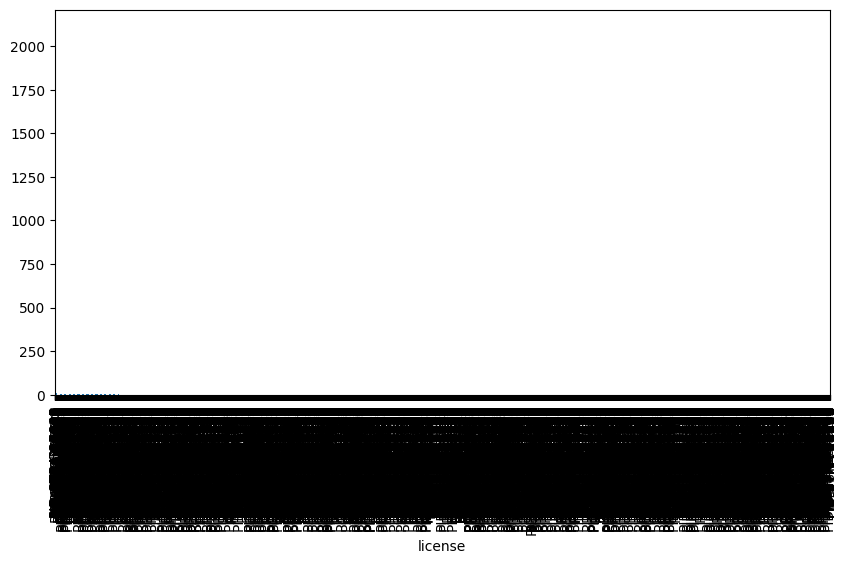

In [40]:
license = listing_data.license.value_counts() # This makes a series
license.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

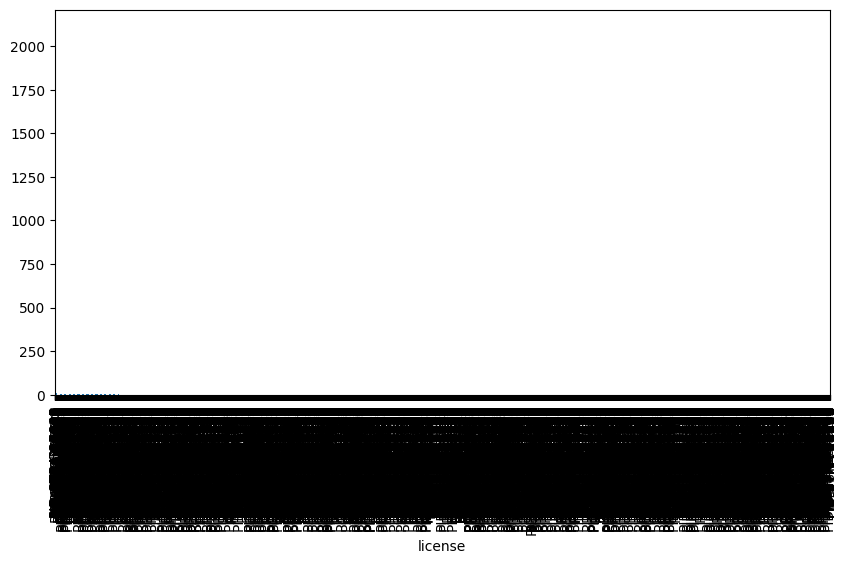

In [41]:
license = listing_data.license.value_counts() 
license[license < 5000].plot(kind="bar");

This pattern keeps repeating itself:

<Axes: xlabel='license'>

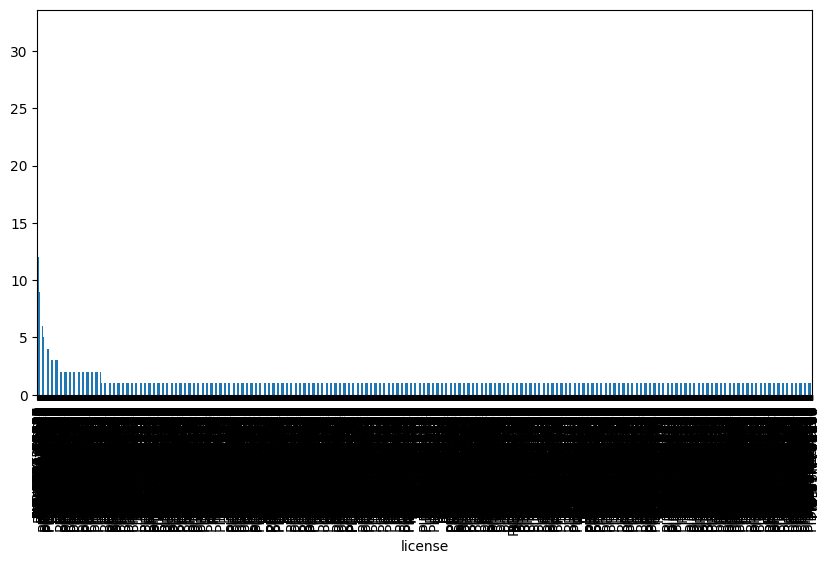

In [42]:
license[license < 1000].plot(kind="bar")

<Axes: xlabel='license'>

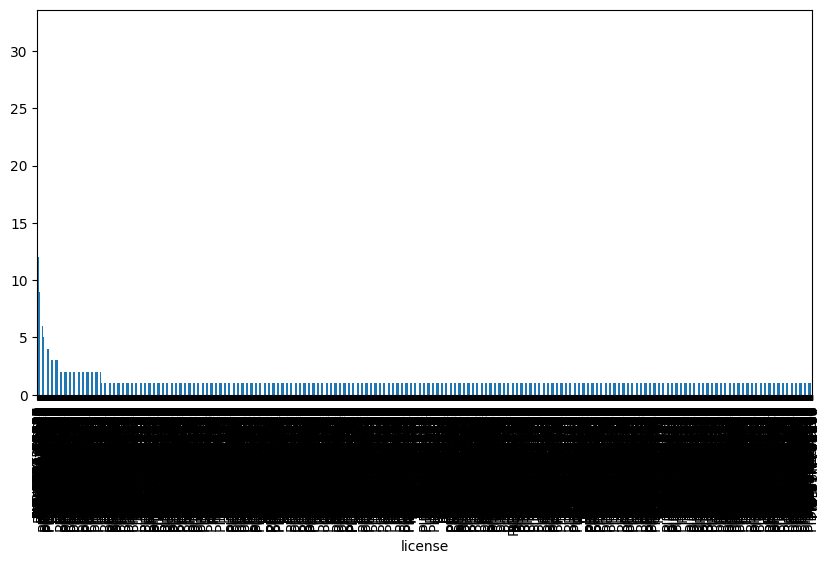

In [43]:
license[license < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<Axes: ylabel='license'>

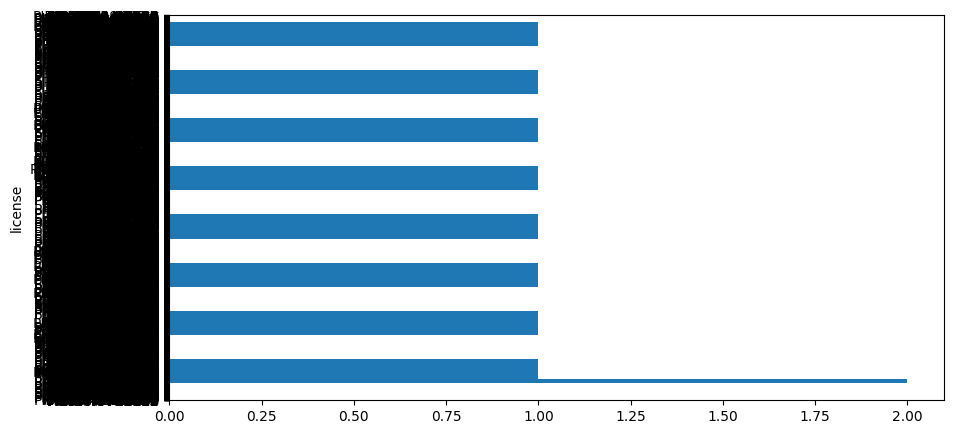

In [44]:
license[license < 3].plot(kind="barh")

<Axes: xlabel='source'>

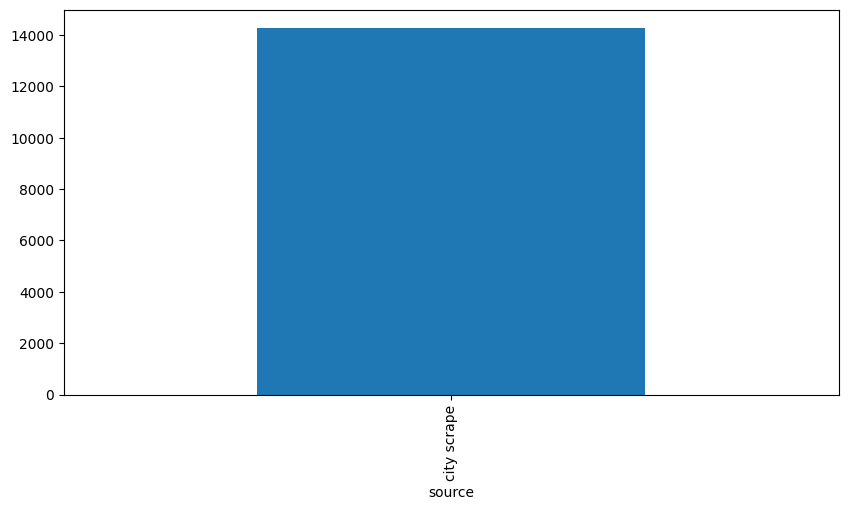

In [45]:
source = listing_data.source.value_counts() # This makes a series
source.plot(kind="bar")

<Axes: xlabel='property_type'>

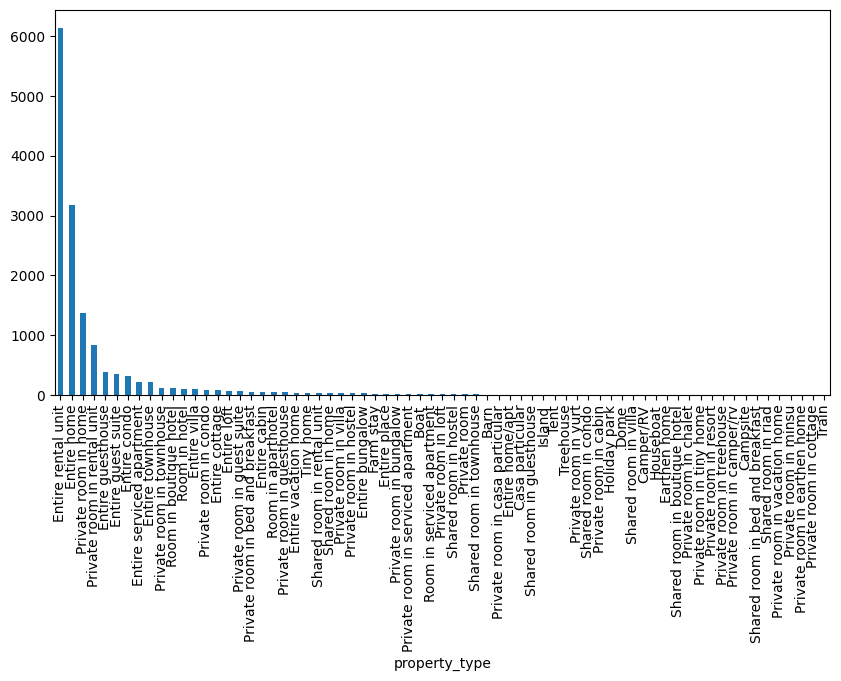

In [46]:
property_type = listing_data.property_type.value_counts() # This makes a series
property_type.plot(kind="bar")

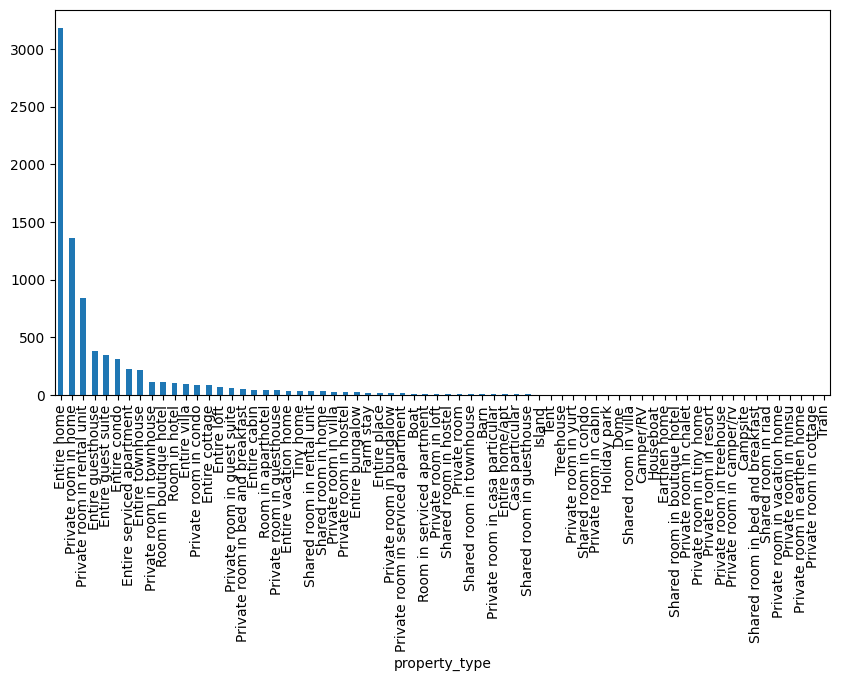

In [47]:
property_type = listing_data.property_type.value_counts() 
property_type[property_type < 5000].plot(kind="bar");

<Axes: xlabel='property_type'>

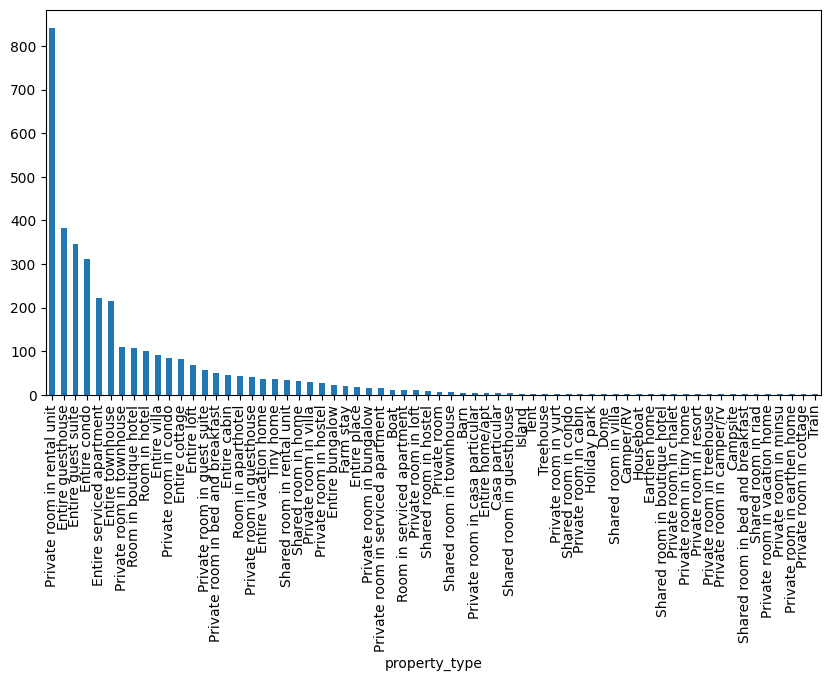

In [48]:
property_type[property_type < 1000].plot(kind="bar")

<Axes: xlabel='property_type'>

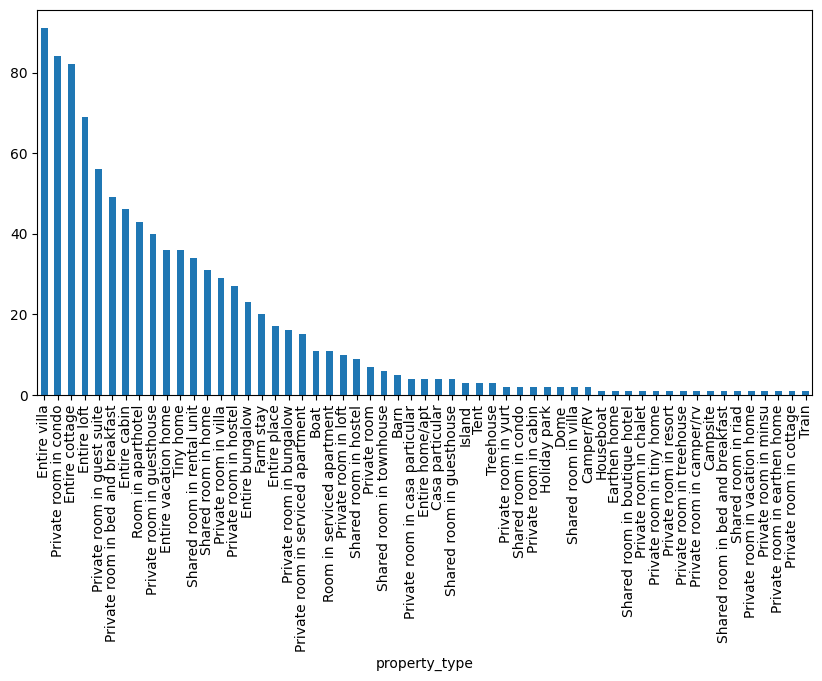

In [49]:
property_type[property_type < 100].plot(kind="bar")

<Axes: xlabel='property_type'>

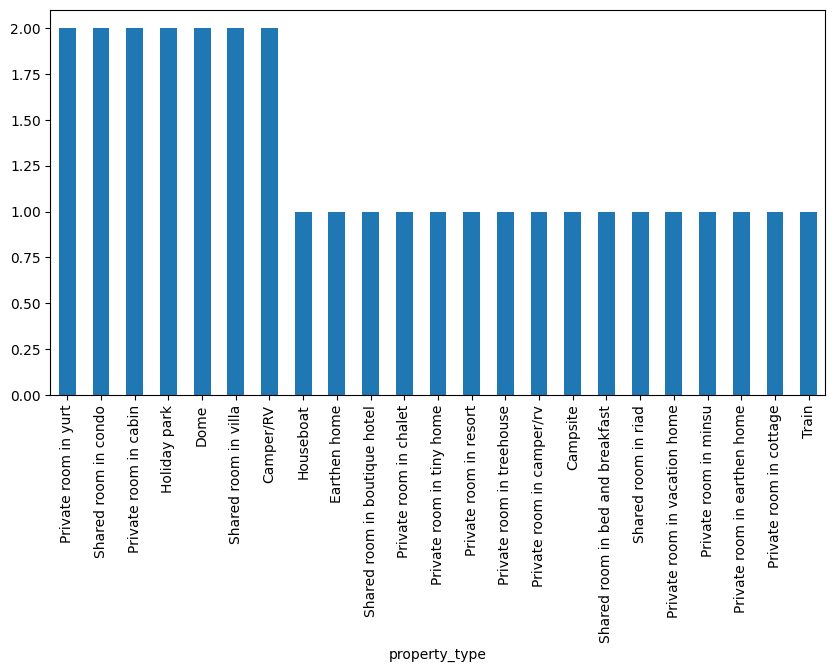

In [50]:
property_type[property_type < 3].plot(kind="bar")

<Axes: xlabel='room_type'>

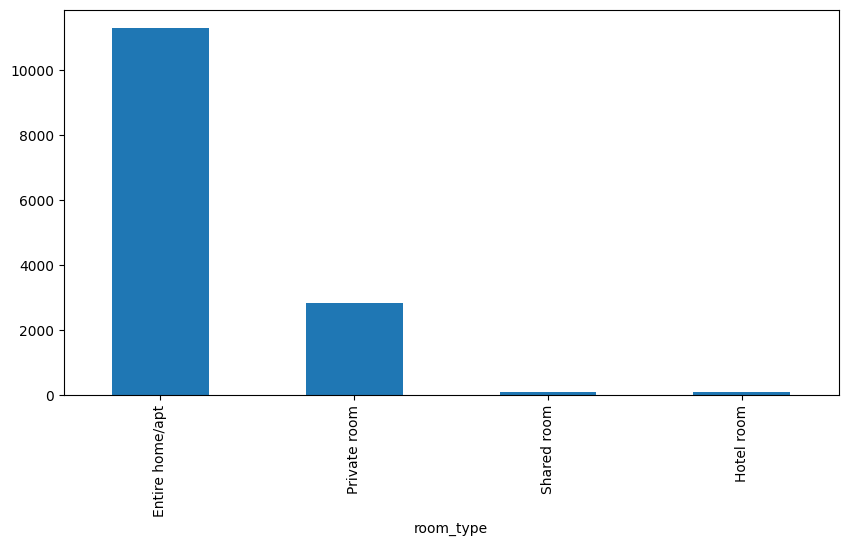

In [51]:
room_type = listing_data.room_type.value_counts() # This makes a series
room_type.plot(kind="bar")

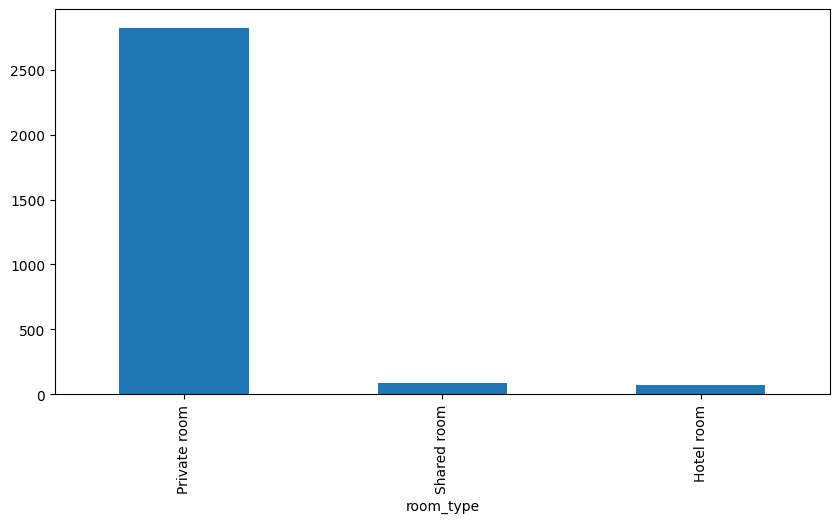

In [52]:
room_type = listing_data.room_type.value_counts() 
room_type[room_type < 5000].plot(kind="bar");

<Axes: xlabel='room_type'>

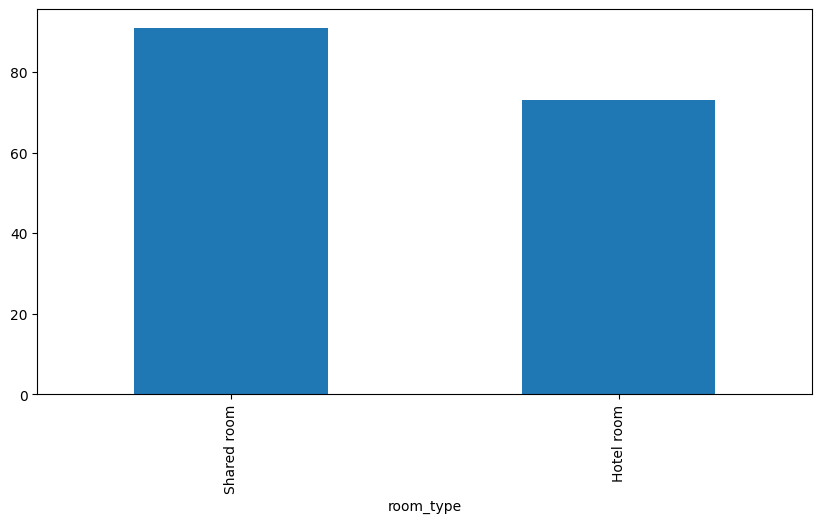

In [53]:
room_type[room_type < 1000].plot(kind="bar")

<Axes: xlabel='room_type'>

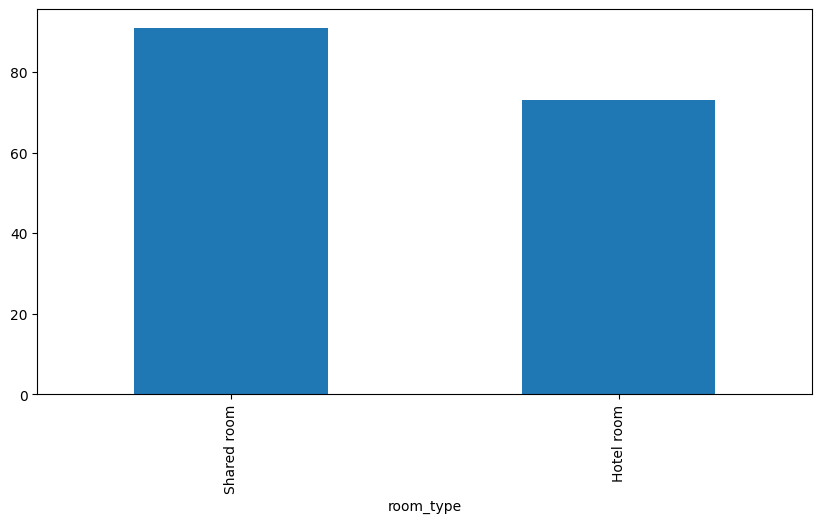

In [54]:
room_type[room_type < 100].plot(kind="bar")

<Axes: xlabel='host_location'>

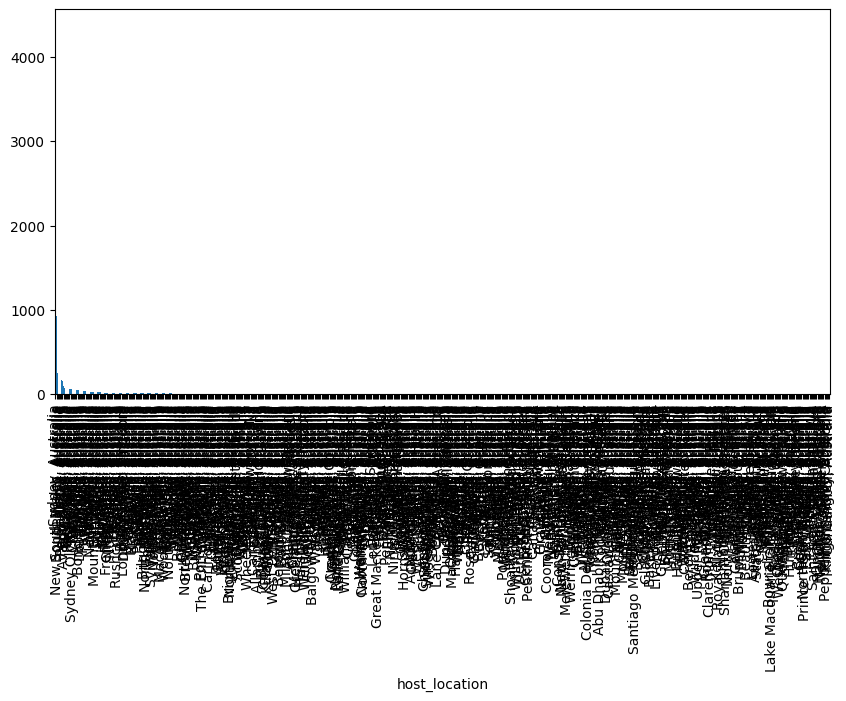

In [55]:
host_location = listing_data.host_location.value_counts() # This makes a series
host_location.plot(kind="bar")

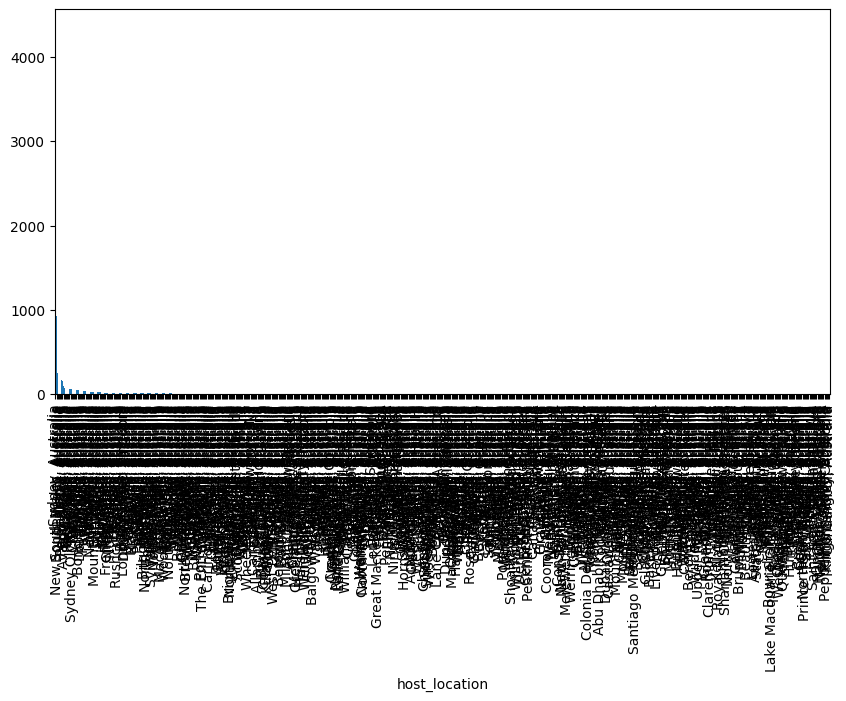

In [56]:
host_location = listing_data.host_location.value_counts() 
host_location[host_location < 5000].plot(kind="bar");

<Axes: xlabel='host_location'>

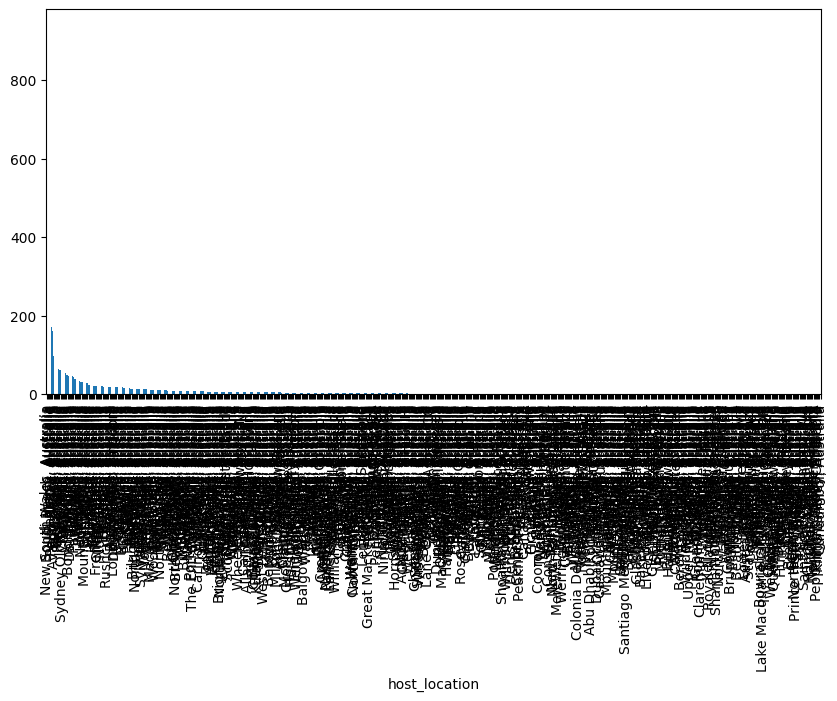

In [57]:
host_location[host_location < 1000].plot(kind="bar")

<Axes: xlabel='host_location'>

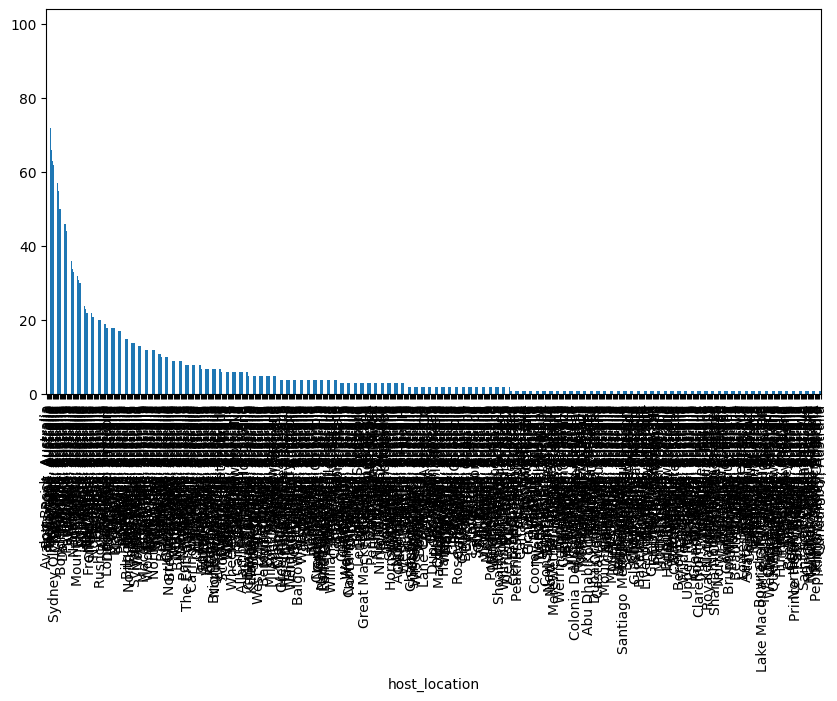

In [58]:
host_location[host_location < 100].plot(kind="bar")

<Axes: xlabel='host_location'>

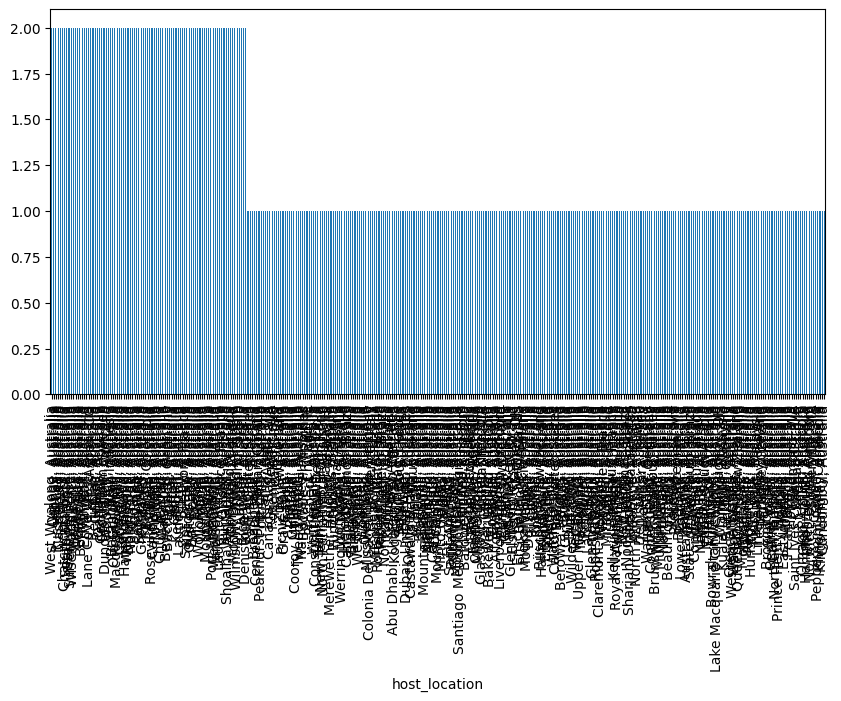

In [59]:
host_location[host_location < 3].plot(kind="bar")

<Axes: xlabel='host_verifications'>

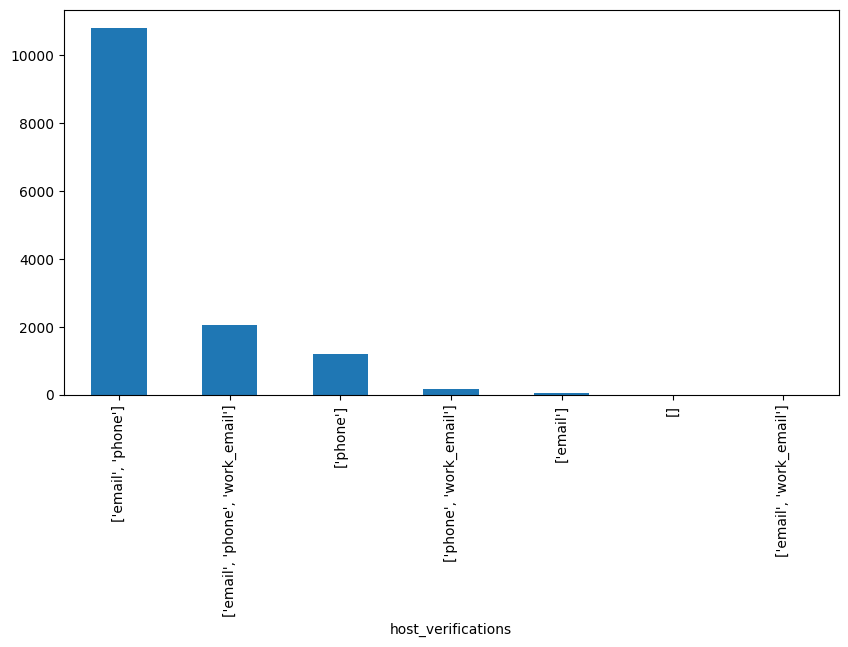

In [60]:
host_verifications = listing_data.host_verifications.value_counts() # This makes a series
host_verifications.plot(kind="bar")

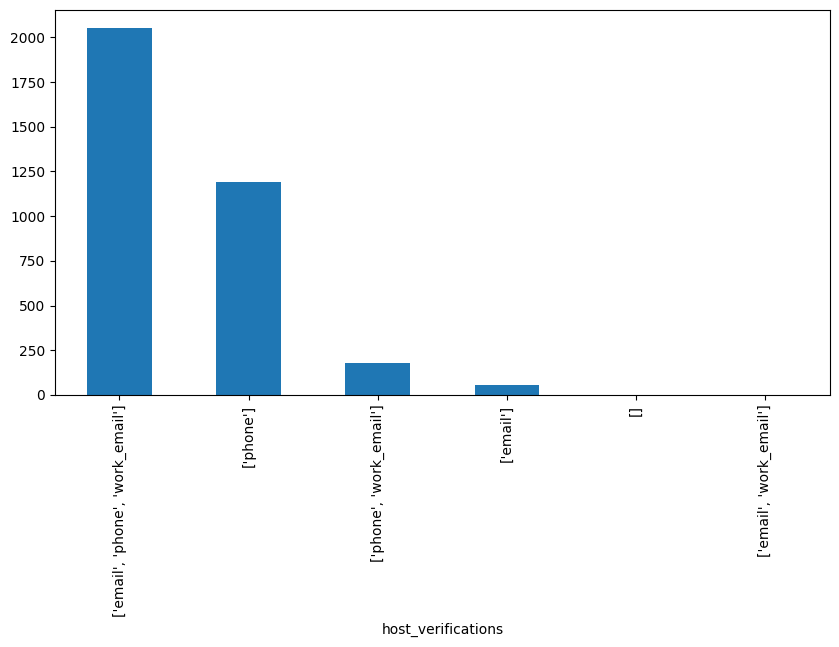

In [61]:
host_verifications = listing_data.host_verifications.value_counts() 
host_verifications[host_verifications < 5000].plot(kind="bar");

<Axes: xlabel='host_verifications'>

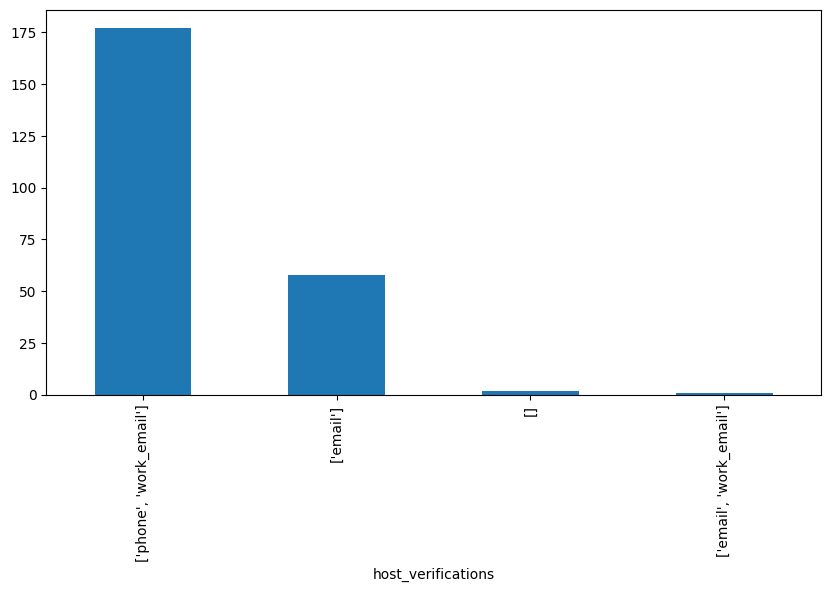

In [62]:
host_verifications[host_verifications < 1000].plot(kind="bar")

<Axes: xlabel='host_verifications'>

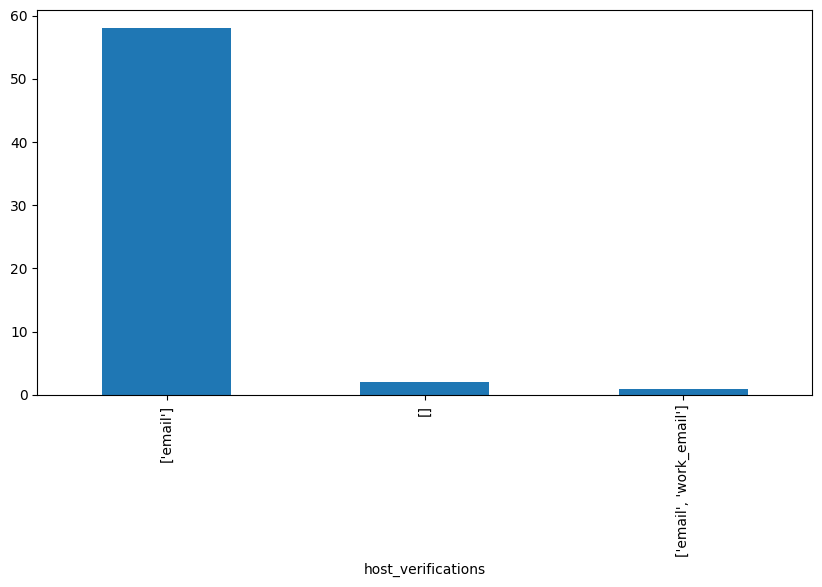

In [63]:
host_verifications[host_verifications < 100].plot(kind="bar")

<Axes: xlabel='host_verifications'>

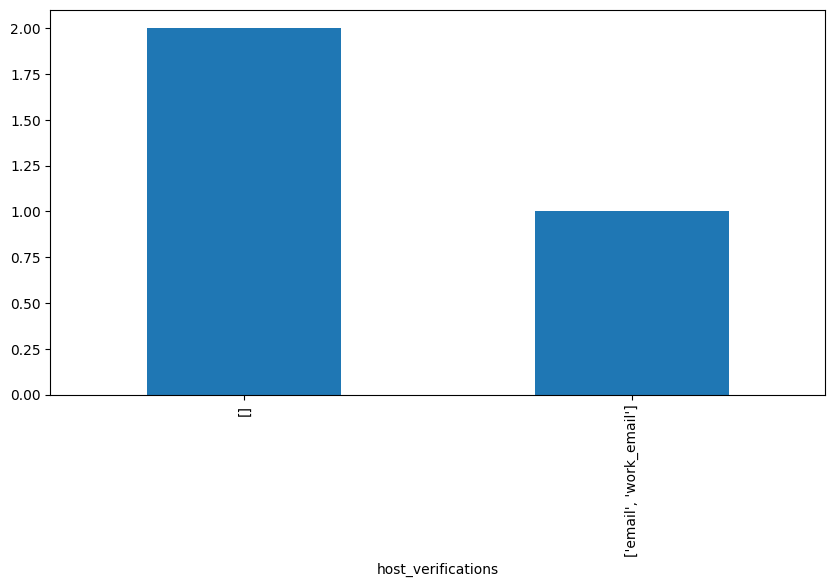

In [65]:
host_verifications[host_verifications < 3].plot(kind="bar")

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [66]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


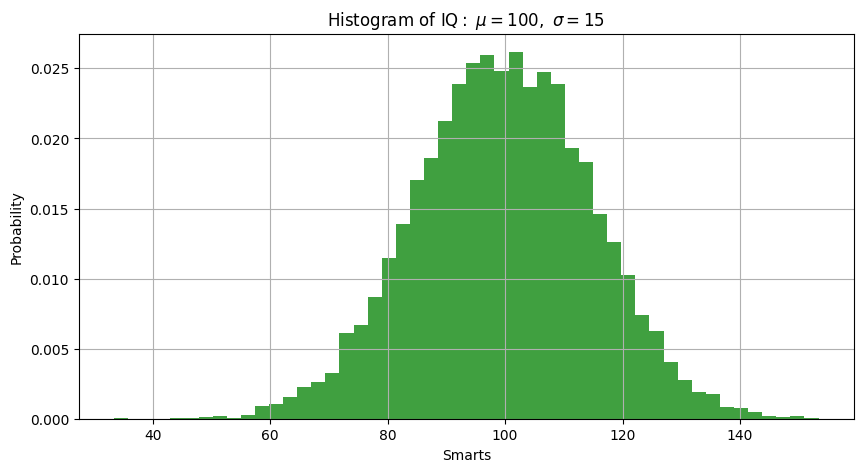

In [67]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()


Here's how we made our histogram before:

<Axes: >

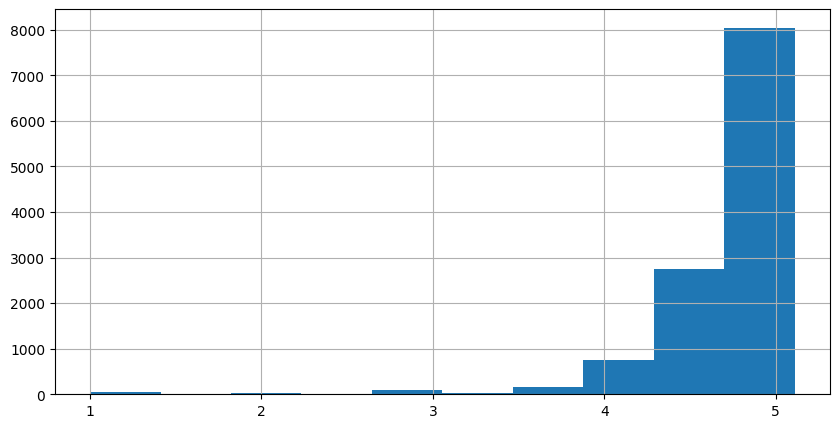

In [68]:
listing_data.review_scores_rating[listing_data.review_scores_rating < 1000].hist()

<Axes: >

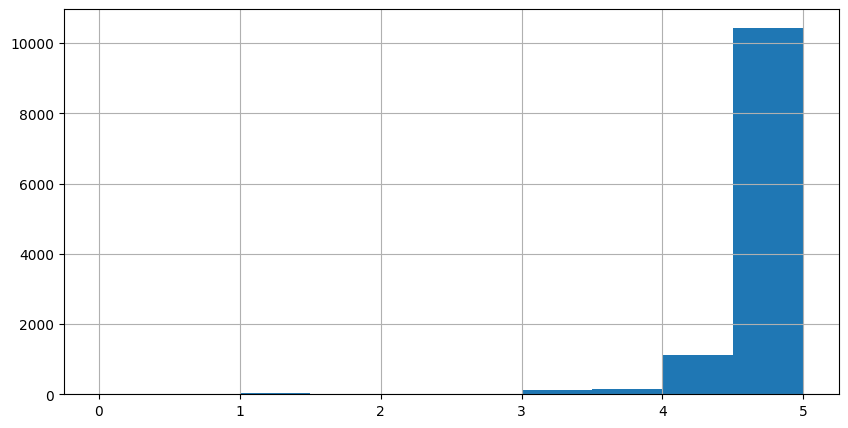

In [69]:
listing_data.review_scores_accuracy[listing_data.review_scores_accuracy < 1000].hist()

<Axes: >

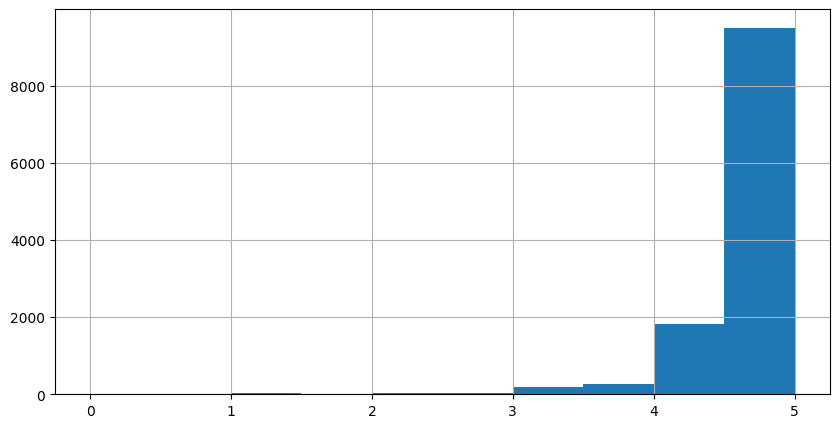

In [70]:
listing_data.review_scores_cleanliness[listing_data.review_scores_cleanliness < 1000].hist()

<Axes: >

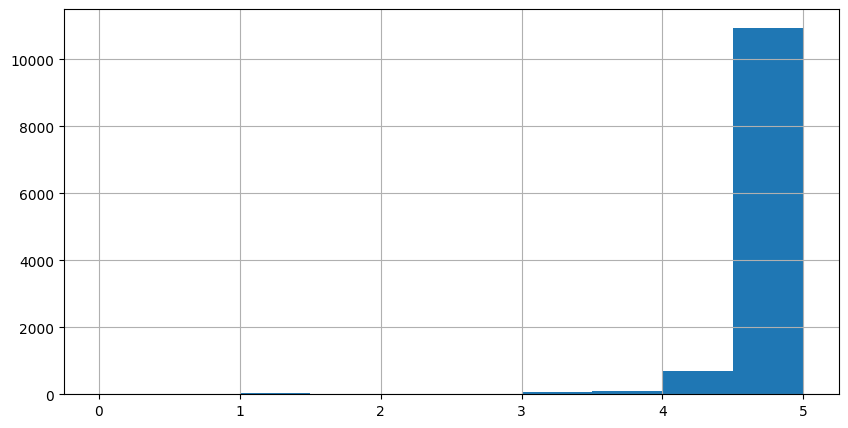

In [71]:
listing_data.review_scores_checkin[listing_data.review_scores_checkin < 1000].hist()

<Axes: >

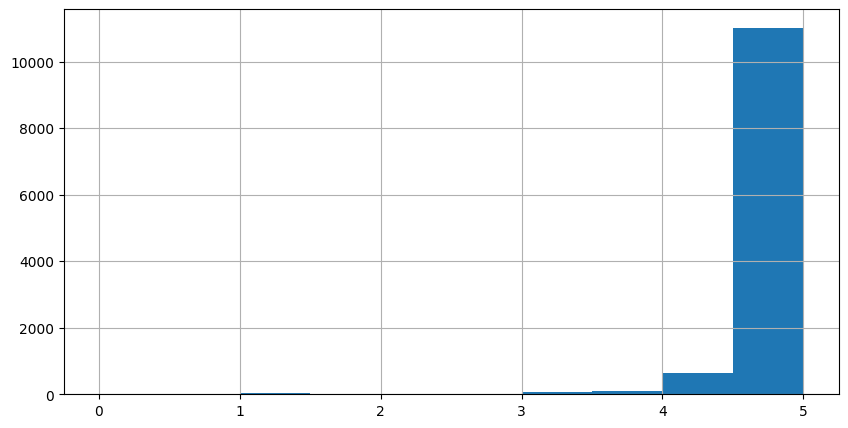

In [72]:
listing_data.review_scores_communication[listing_data.review_scores_communication < 1000].hist()

<Axes: >

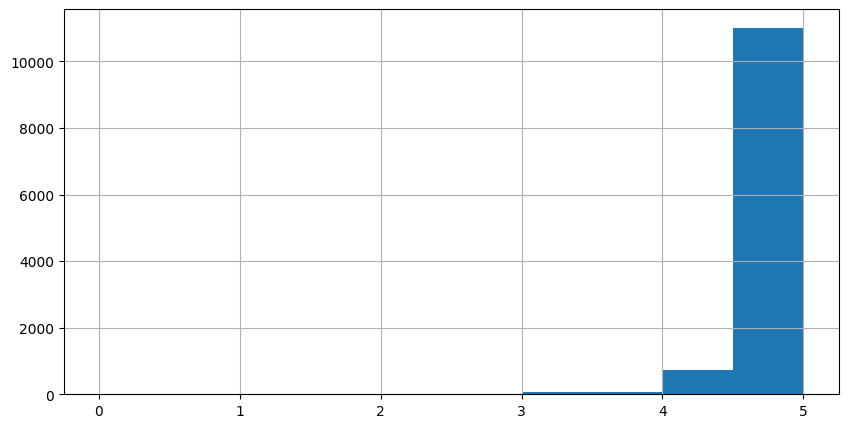

In [73]:
listing_data.review_scores_location[listing_data.review_scores_location < 1000].hist()

<Axes: >

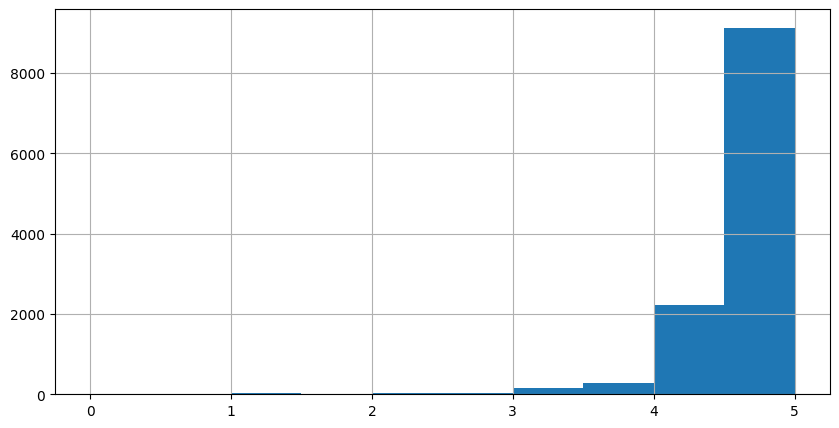

In [74]:
listing_data.review_scores_value[listing_data.review_scores_value < 1000].hist()

<Axes: >

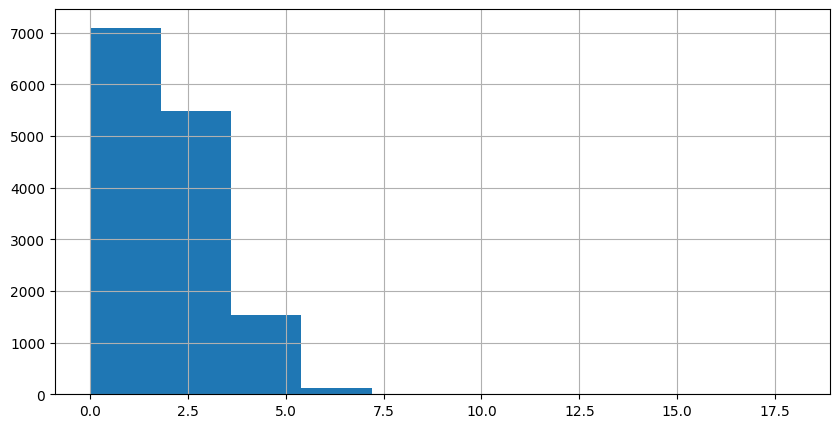

In [75]:
listing_data.bedrooms[listing_data.bedrooms < 1000].hist()

<Axes: >

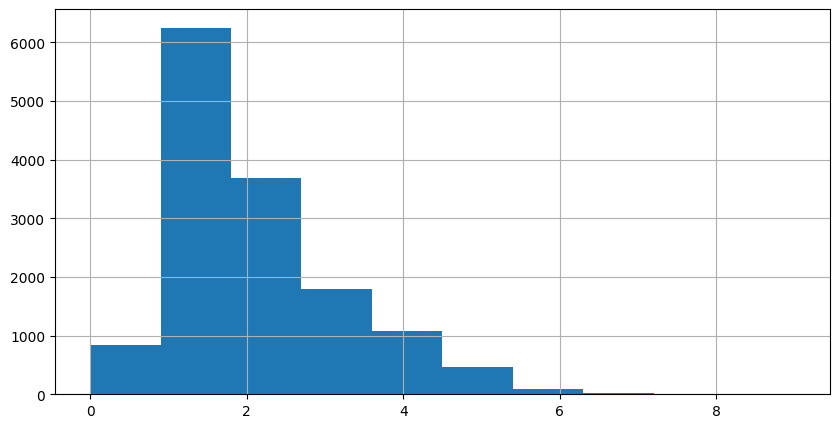

In [77]:
listing_data.bedrooms[listing_data.bedrooms < 10].hist()

<Axes: >

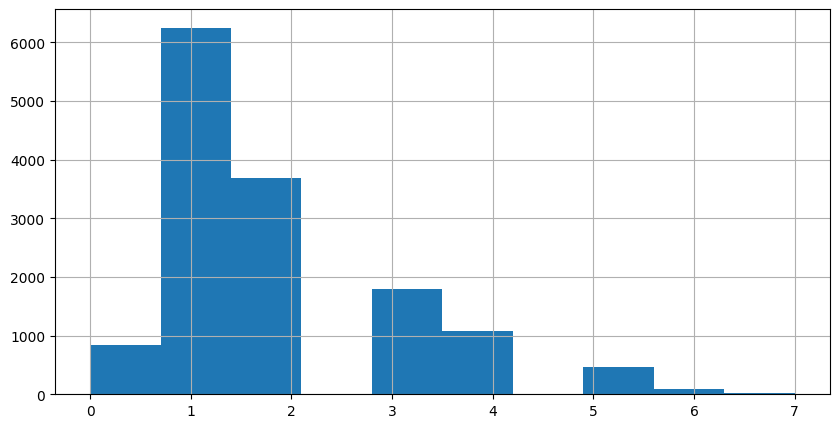

In [78]:
listing_data.bedrooms[listing_data.bedrooms < 8].hist()

<Axes: >

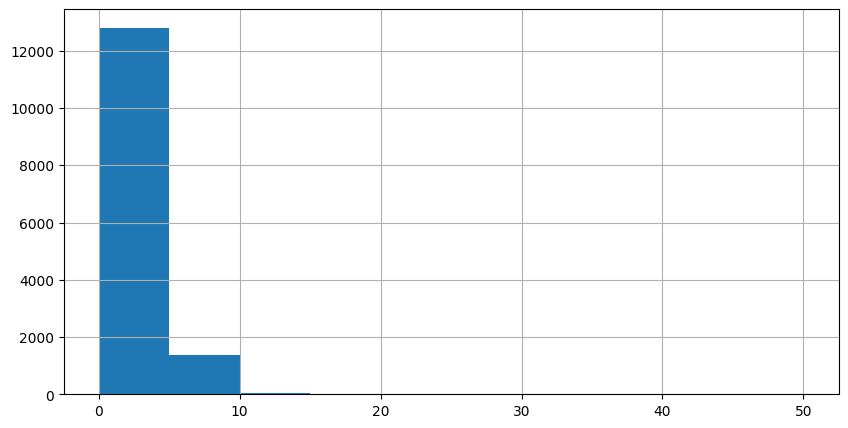

In [79]:
listing_data.beds[listing_data.beds < 1000].hist()

<Axes: >

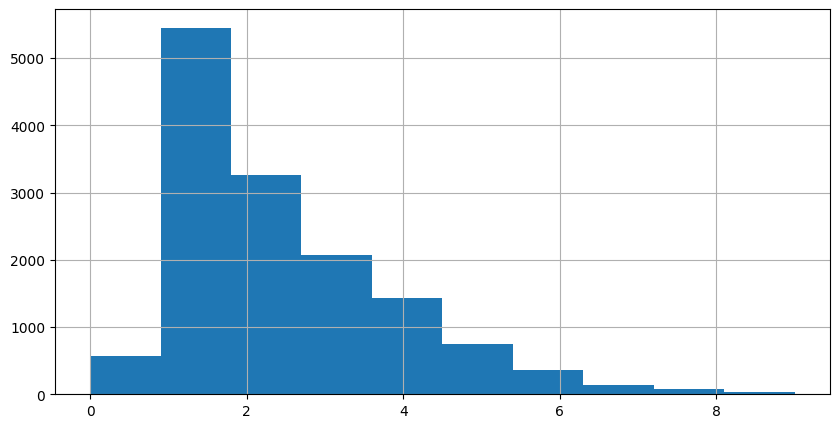

In [80]:
listing_data.beds[listing_data.beds < 10].hist()

<Axes: >

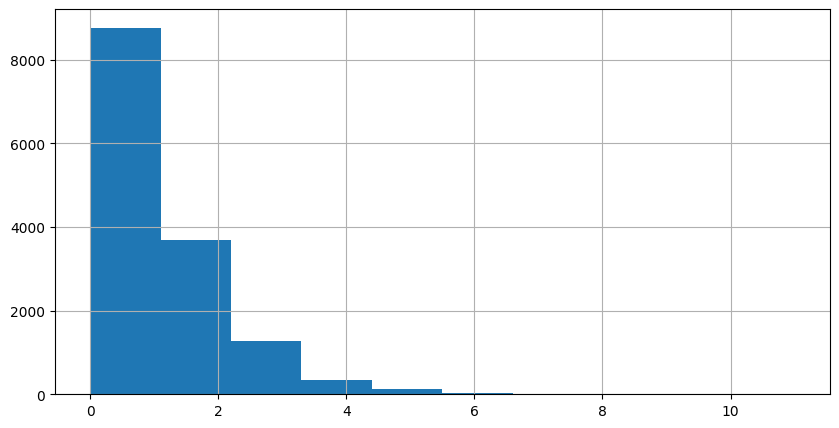

In [81]:
listing_data.bathrooms[listing_data.bathrooms < 1000].hist()

<Axes: >

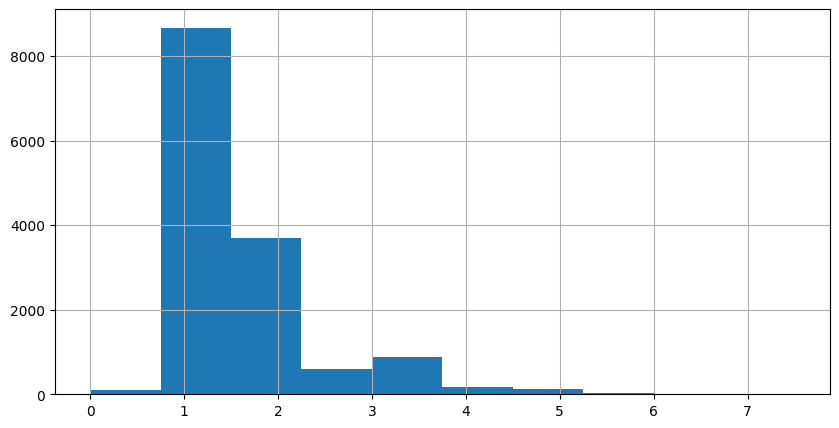

In [82]:
listing_data.bathrooms[listing_data.bathrooms < 10].hist()

<Axes: >

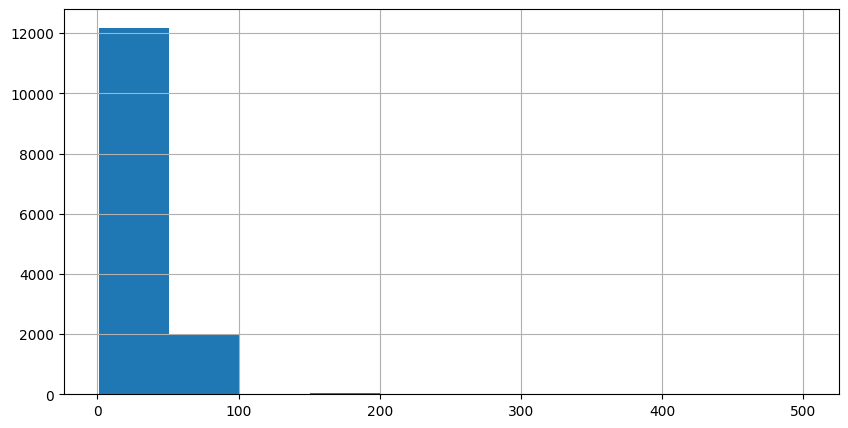

In [83]:
listing_data.minimum_nights[listing_data.minimum_nights < 1000].hist()

<Axes: >

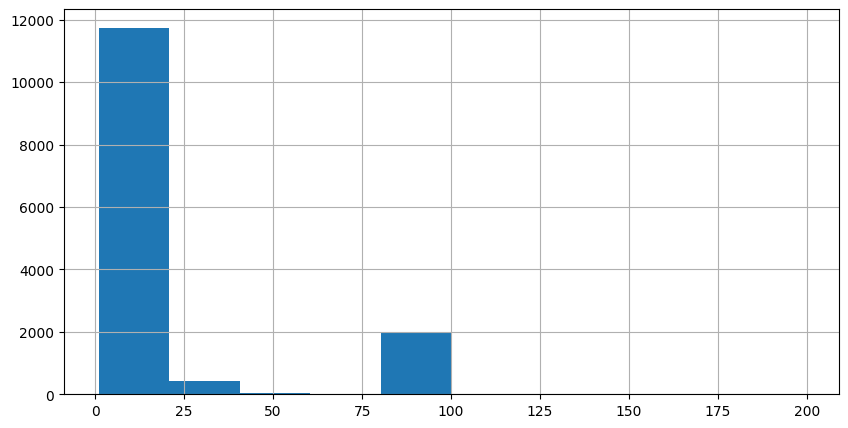

In [84]:
listing_data.minimum_nights[listing_data.minimum_nights < 200].hist()

<Axes: >

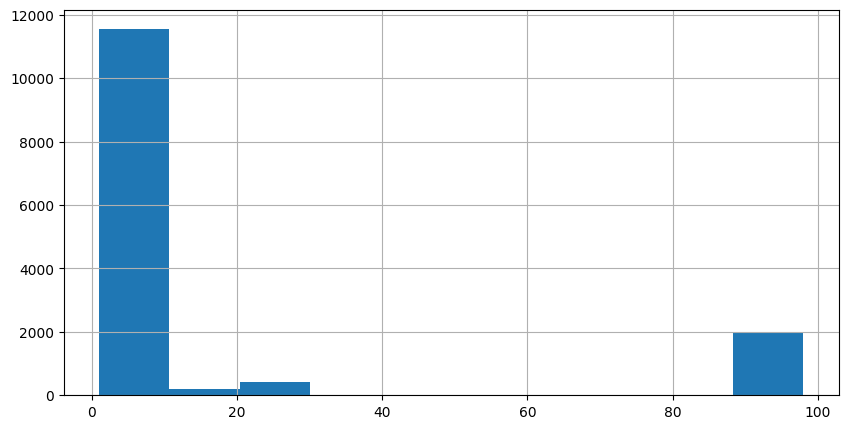

In [85]:
listing_data.minimum_nights[listing_data.minimum_nights < 100].hist()

<Axes: >

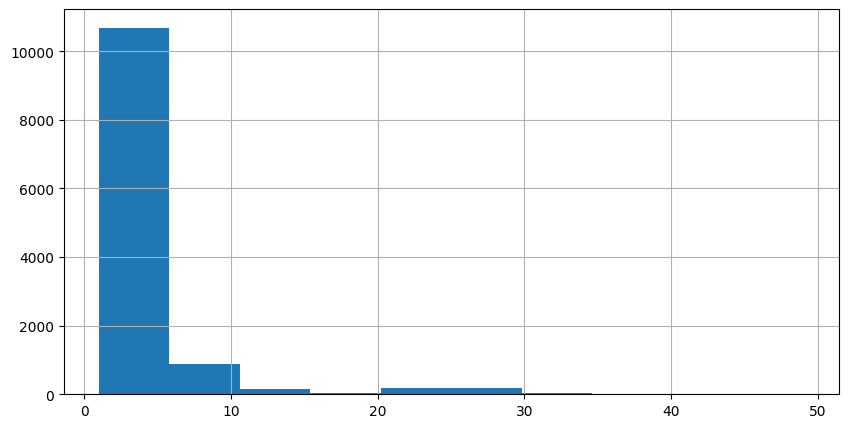

In [86]:
listing_data.minimum_nights[listing_data.minimum_nights < 50].hist()

<Axes: >

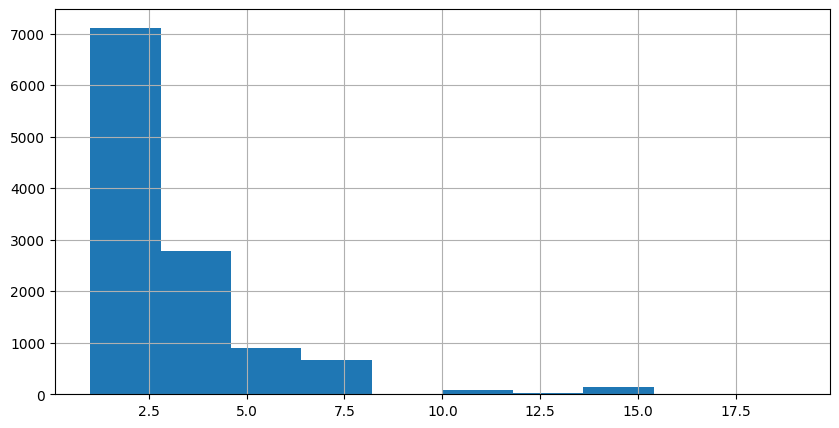

In [87]:
listing_data.minimum_nights[listing_data.minimum_nights < 20].hist()

<Axes: >

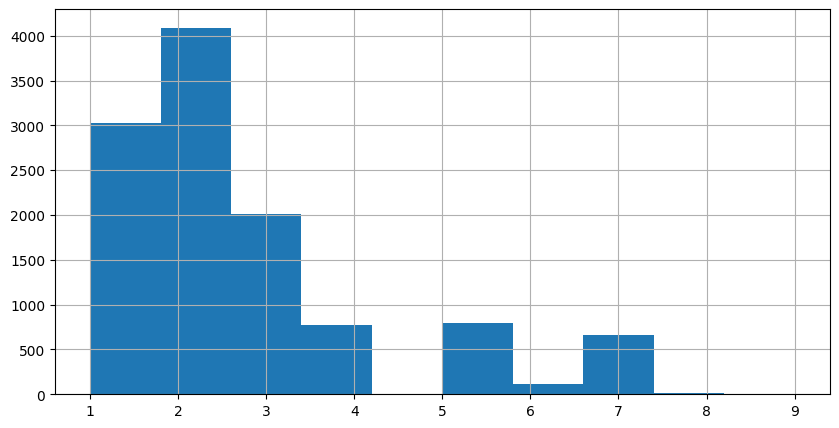

In [88]:
listing_data.minimum_nights[listing_data.minimum_nights < 10].hist()

<Axes: >

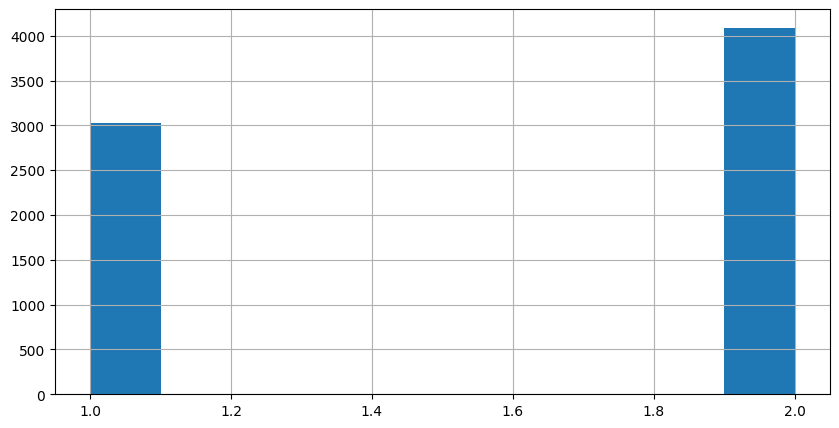

In [89]:
listing_data.minimum_nights[listing_data.minimum_nights < 3].hist()

<Axes: >

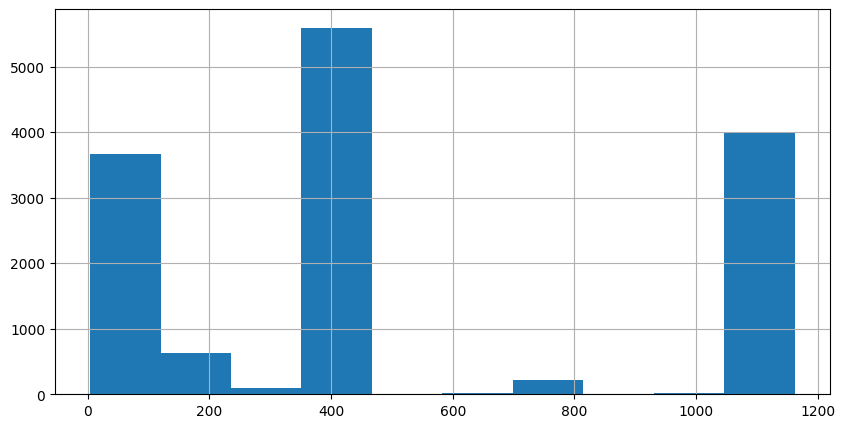

In [90]:
listing_data.maximum_nights[listing_data.maximum_nights > 3].hist()

<Axes: >

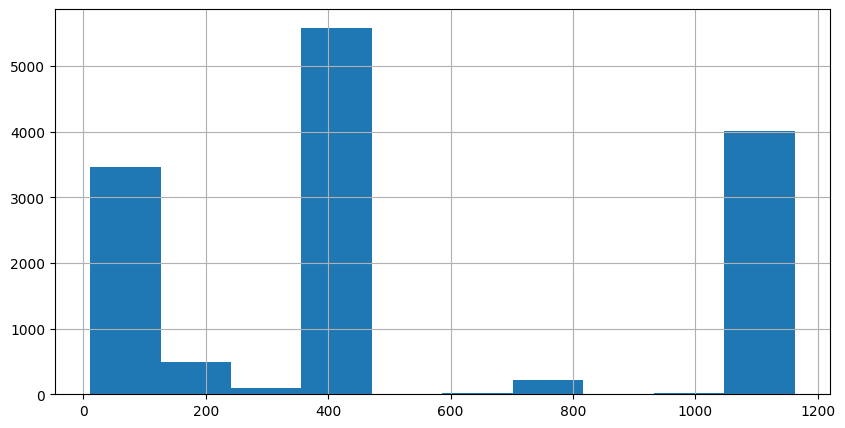

In [91]:
listing_data.maximum_nights[listing_data.maximum_nights > 10].hist()

<Axes: >

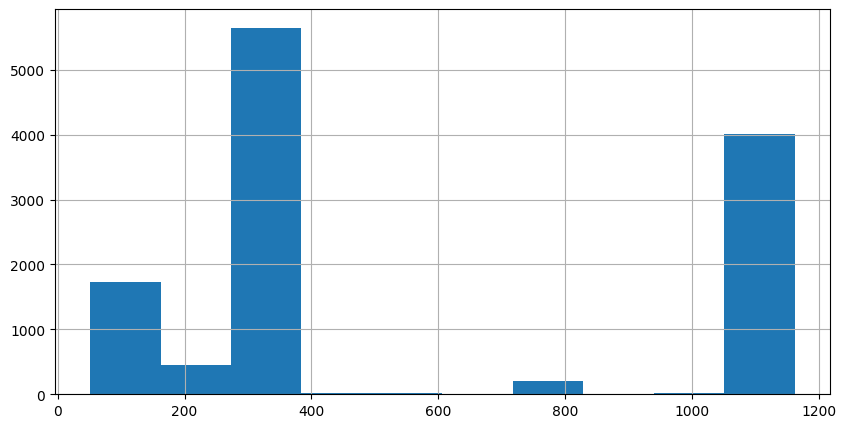

In [92]:
listing_data.maximum_nights[listing_data.maximum_nights > 50].hist()

<Axes: >

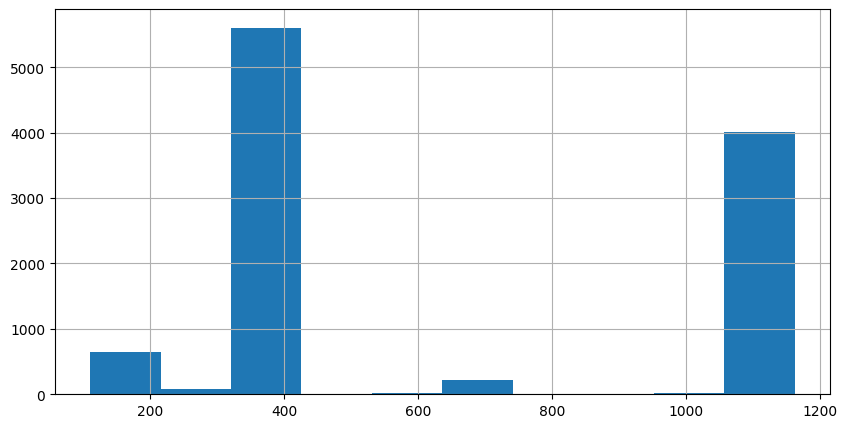

In [93]:
listing_data.maximum_nights[listing_data.maximum_nights > 100].hist()

<Axes: >

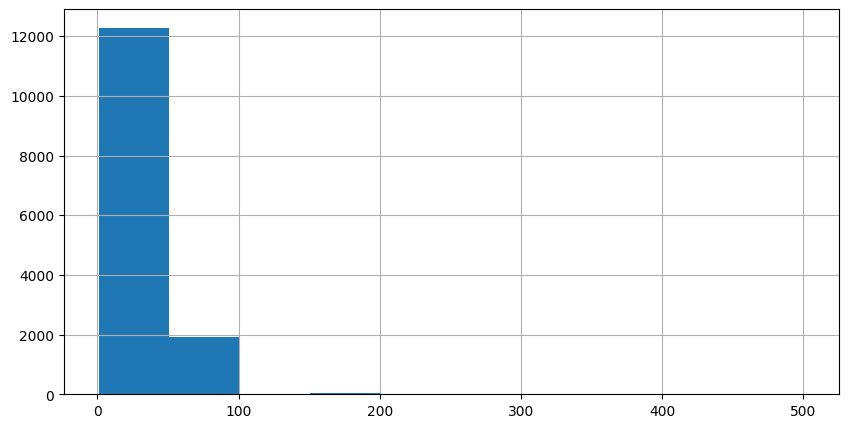

In [96]:
listing_data.minimum_minimum_nights[listing_data.minimum_minimum_nights < 1000].hist()

<Axes: >

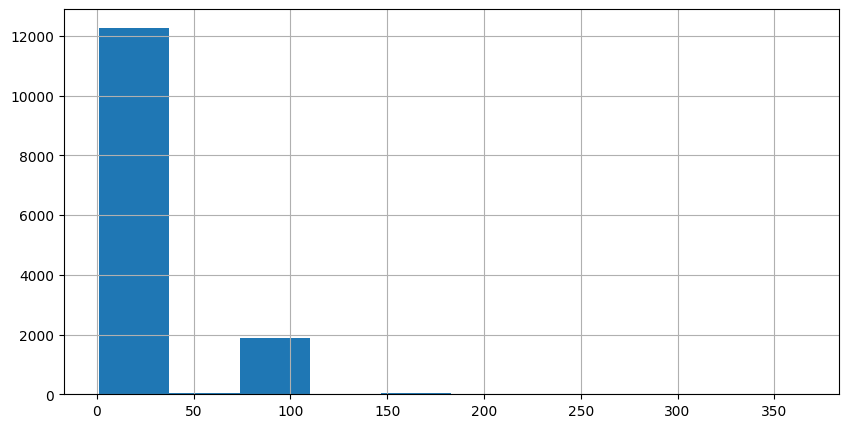

In [97]:
listing_data.minimum_minimum_nights[listing_data.minimum_minimum_nights < 500].hist()

<Axes: >

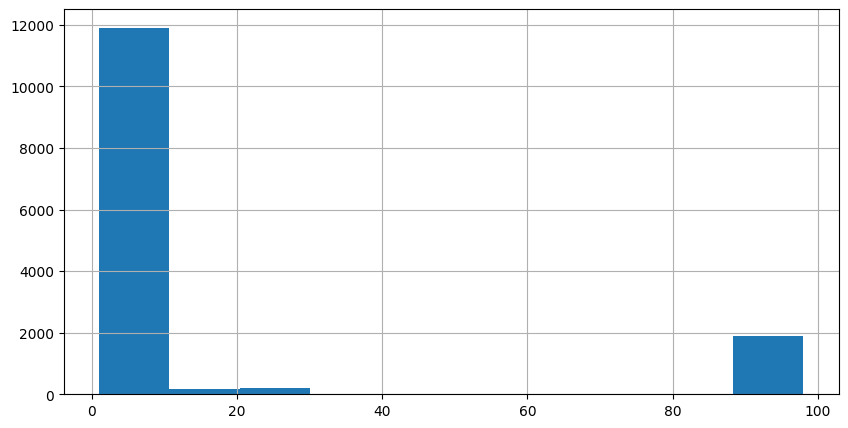

In [98]:
listing_data.minimum_minimum_nights[listing_data.minimum_minimum_nights < 100].hist()

<Axes: >

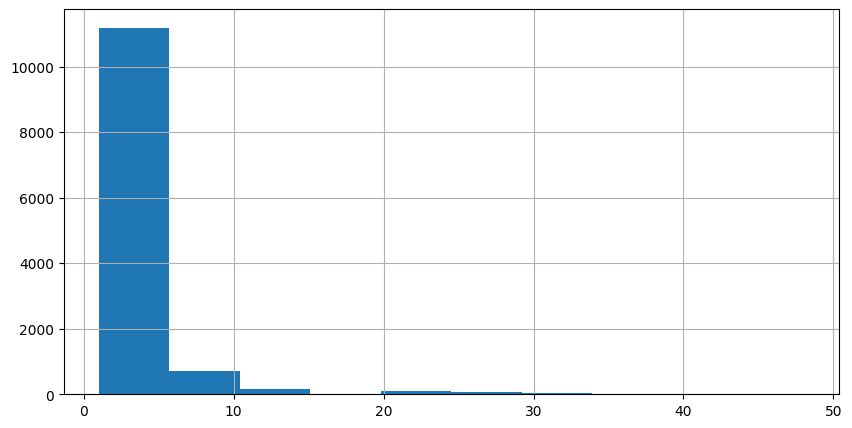

In [99]:
listing_data.minimum_minimum_nights[listing_data.minimum_minimum_nights < 50].hist()

<Axes: >

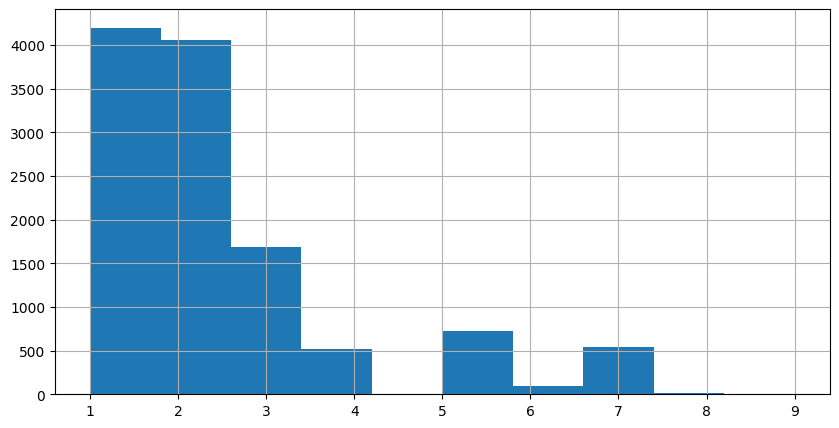

In [100]:
listing_data.minimum_minimum_nights[listing_data.minimum_minimum_nights < 10].hist()

<Axes: >

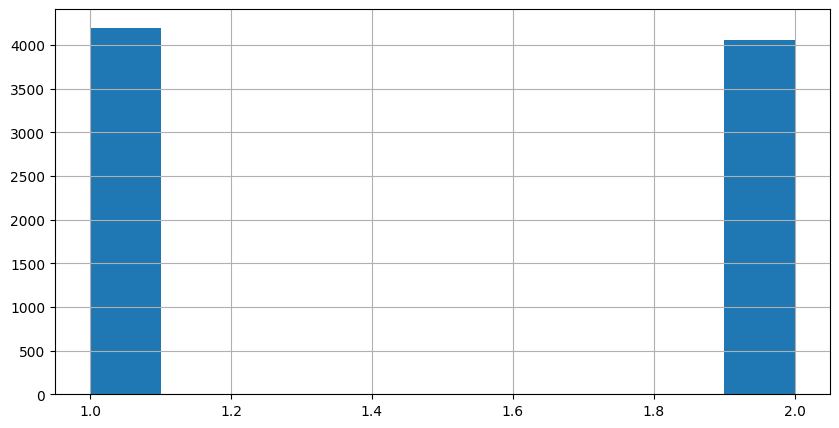

In [101]:
listing_data.minimum_minimum_nights[listing_data.minimum_minimum_nights < 3].hist()

<Axes: >

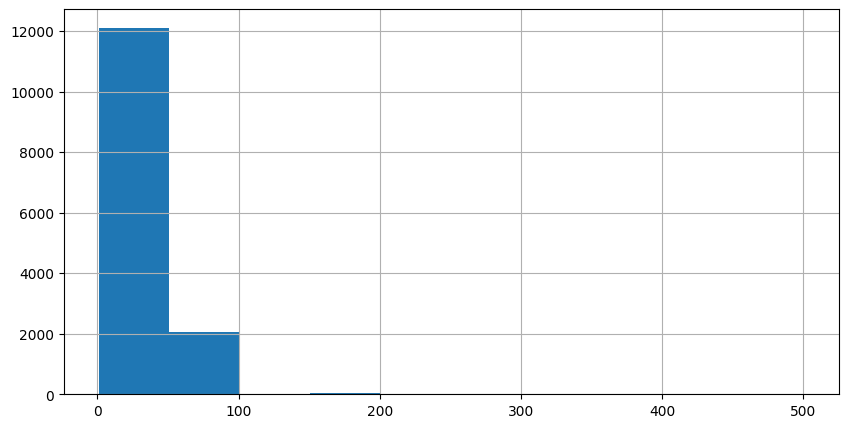

In [102]:
listing_data.maximum_minimum_nights[listing_data.maximum_minimum_nights < 1000].hist()

<Axes: >

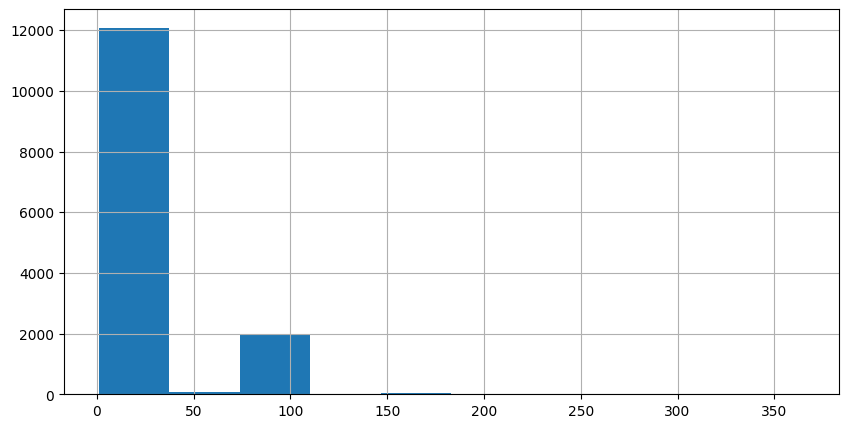

In [103]:
listing_data.maximum_minimum_nights[listing_data.maximum_minimum_nights < 500].hist()

<Axes: >

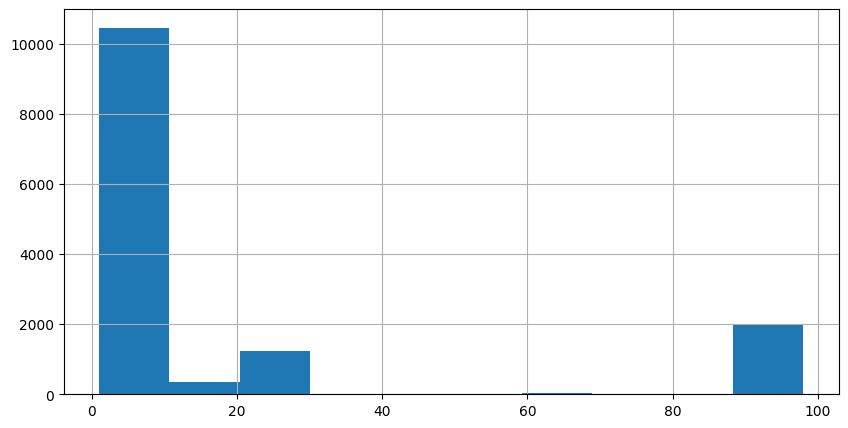

In [104]:
listing_data.maximum_minimum_nights[listing_data.maximum_minimum_nights < 100].hist()

<Axes: >

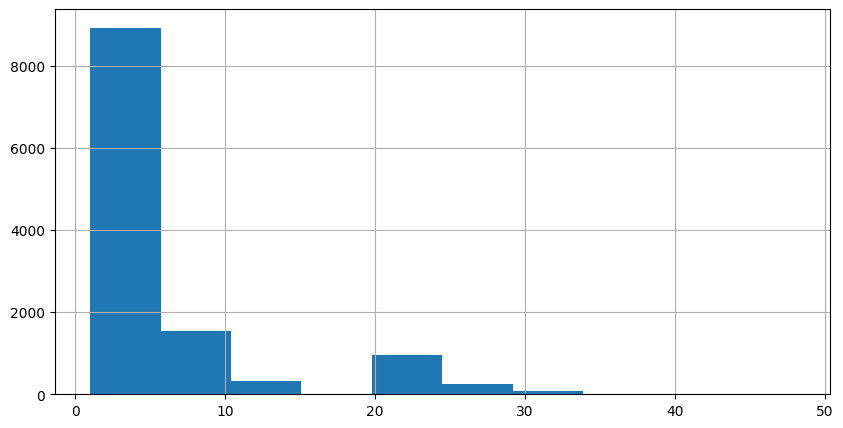

In [105]:
listing_data.maximum_minimum_nights[listing_data.maximum_minimum_nights < 50].hist()

<Axes: >

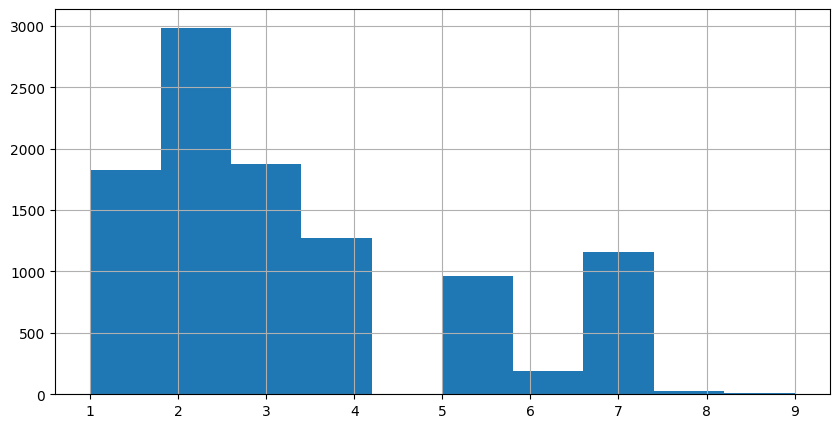

In [107]:
listing_data.maximum_minimum_nights[listing_data.maximum_minimum_nights < 10].hist()

<Axes: >

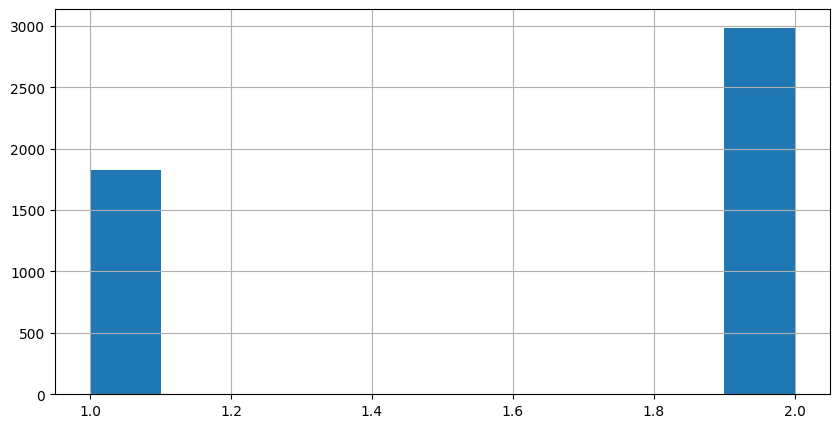

In [108]:
listing_data.maximum_minimum_nights[listing_data.maximum_minimum_nights < 3].hist()

<Axes: >

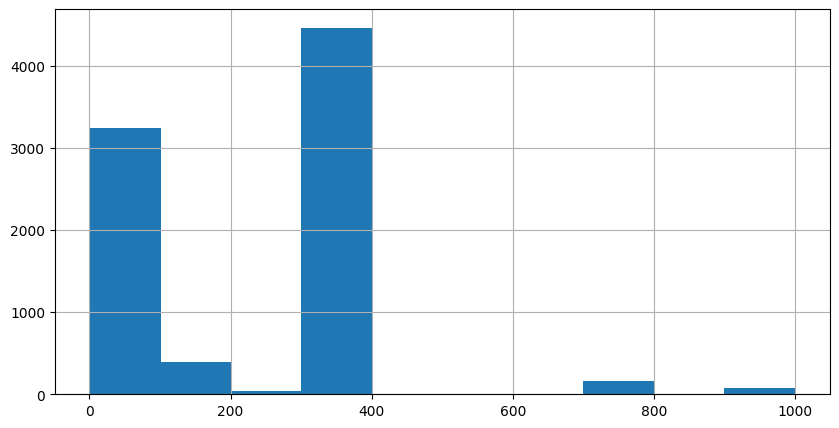

In [109]:
listing_data.minimum_maximum_nights[listing_data.minimum_maximum_nights < 1000].hist()

<Axes: >

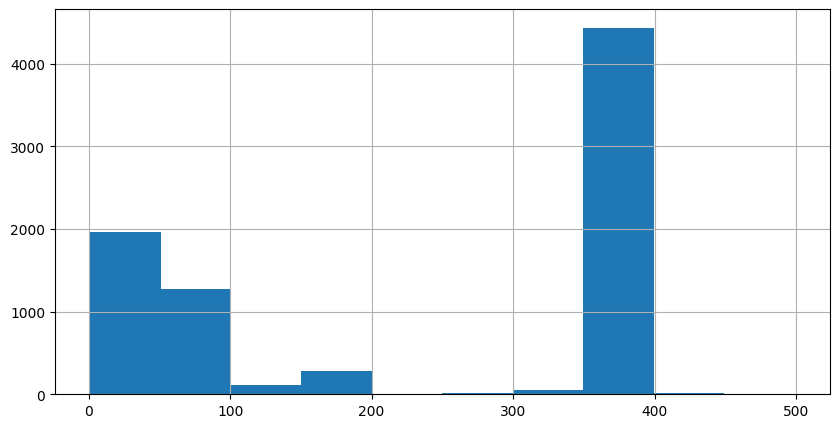

In [110]:
listing_data.minimum_maximum_nights[listing_data.minimum_maximum_nights < 500].hist()

<Axes: >

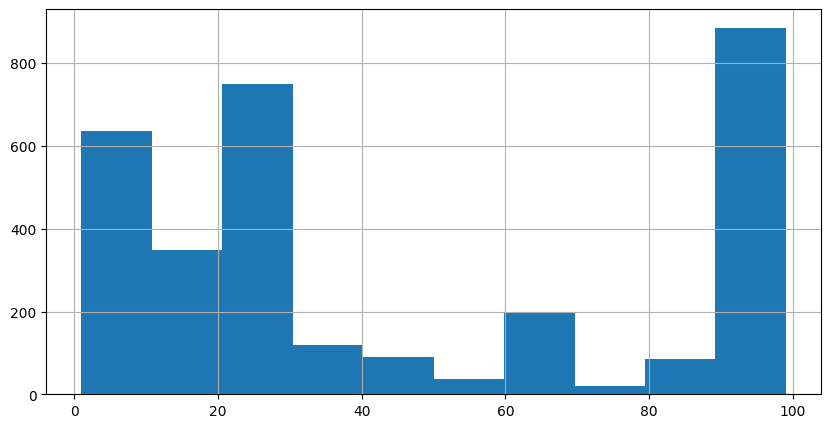

In [111]:
listing_data.minimum_maximum_nights[listing_data.minimum_maximum_nights < 100].hist()

<Axes: >

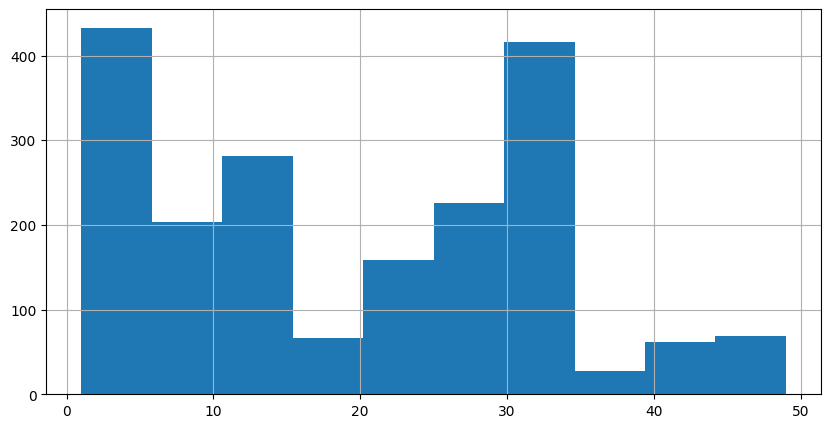

In [112]:
listing_data.minimum_maximum_nights[listing_data.minimum_maximum_nights < 50].hist()

<Axes: >

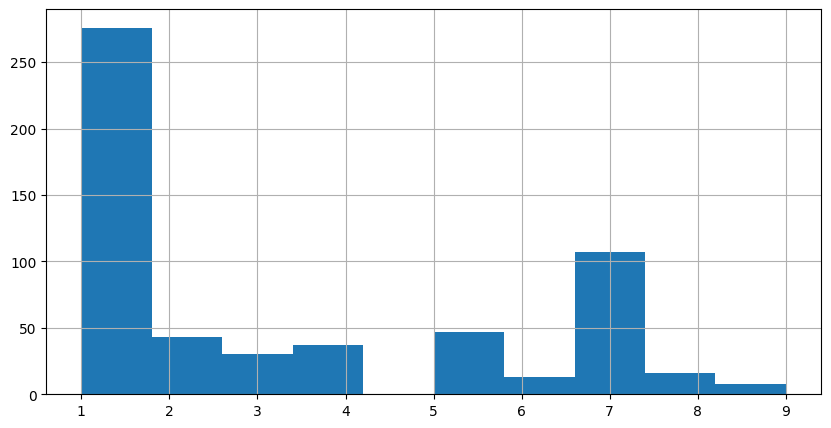

In [114]:
listing_data.minimum_maximum_nights[listing_data.minimum_maximum_nights < 10].hist()

<Axes: >

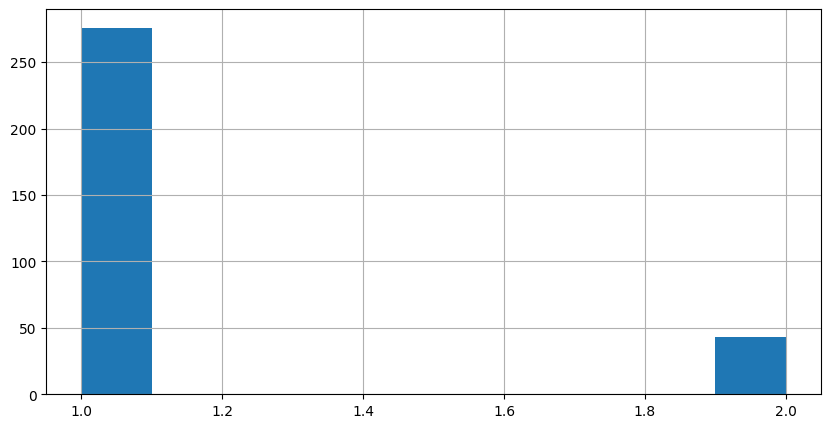

In [115]:
listing_data.minimum_maximum_nights[listing_data.minimum_maximum_nights < 3].hist()

<Axes: >

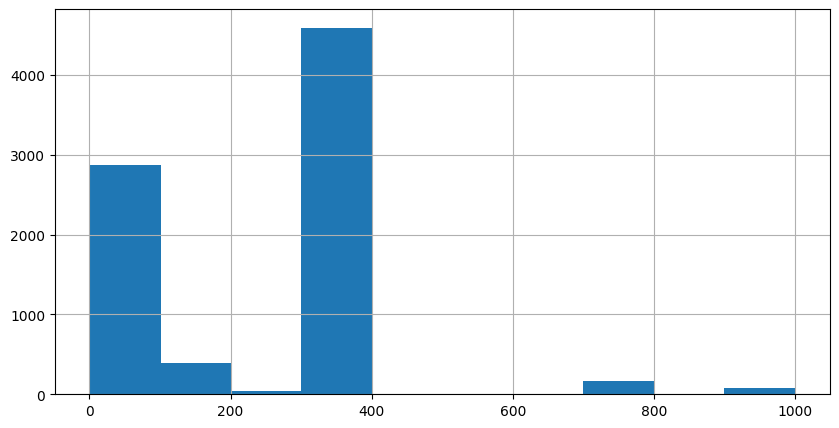

In [116]:
listing_data.maximum_maximum_nights[listing_data.maximum_maximum_nights < 1000].hist()

<Axes: >

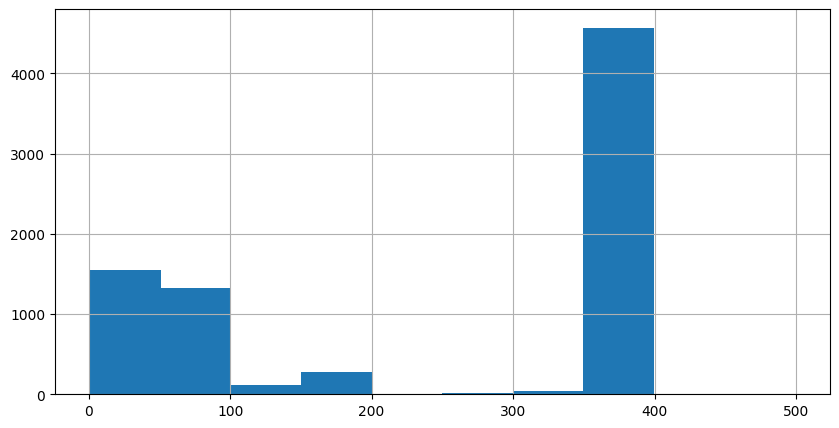

In [117]:
listing_data.maximum_maximum_nights[listing_data.maximum_maximum_nights < 500].hist()

<Axes: >

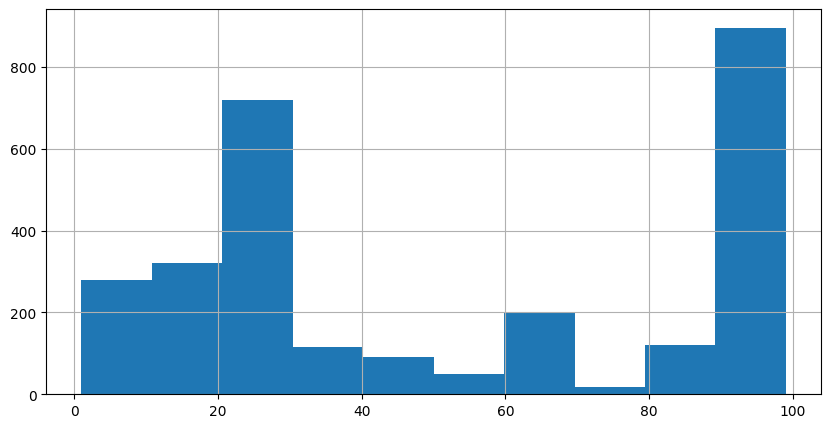

In [118]:
listing_data.maximum_maximum_nights[listing_data.maximum_maximum_nights < 100].hist()

<Axes: >

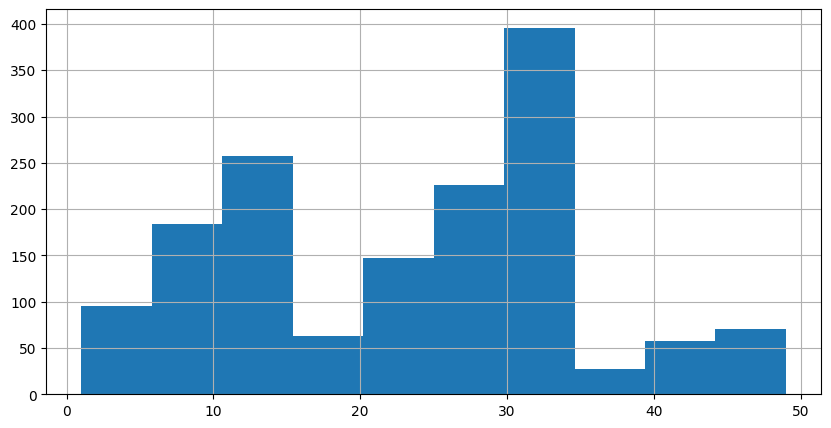

In [119]:
listing_data.maximum_maximum_nights[listing_data.maximum_maximum_nights < 50].hist()

<Axes: >

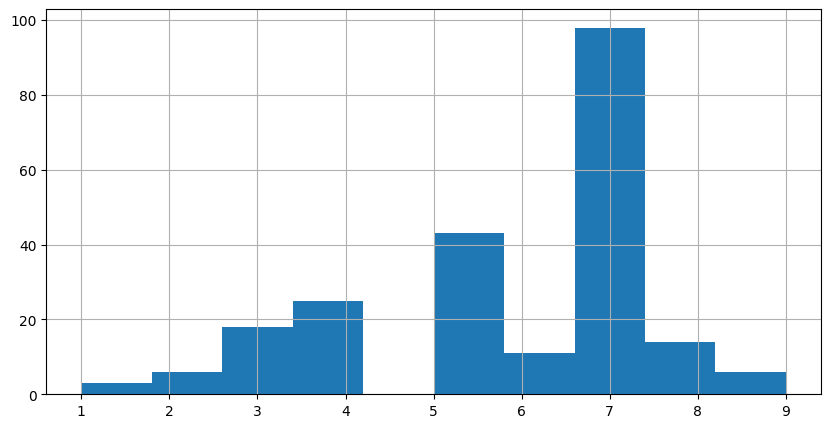

In [120]:
listing_data.maximum_maximum_nights[listing_data.maximum_maximum_nights < 10].hist()

<Axes: >

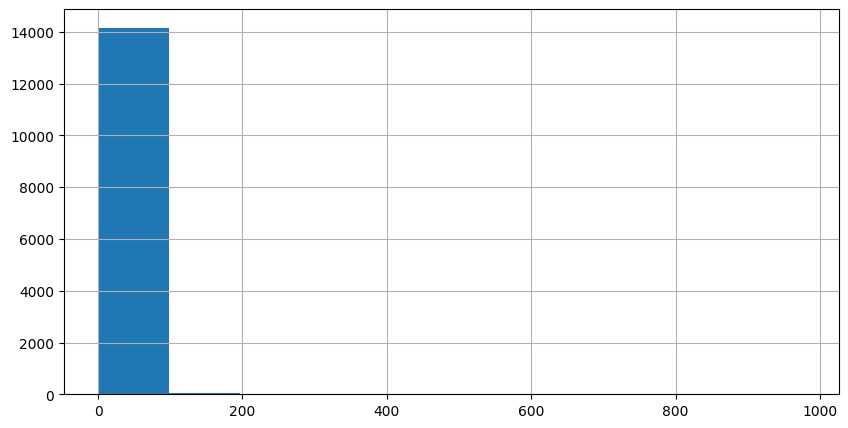

In [121]:
listing_data.minimum_nights_avg_ntm[listing_data.minimum_nights_avg_ntm < 1000].hist()

<Axes: >

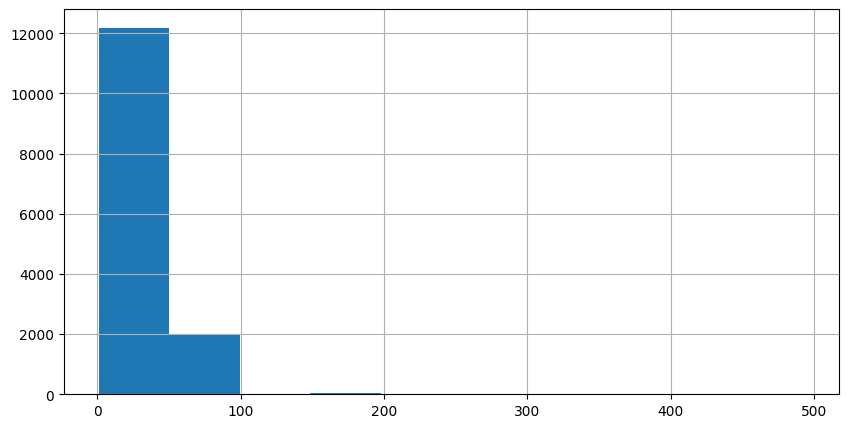

In [122]:
listing_data.minimum_nights_avg_ntm[listing_data.minimum_nights_avg_ntm < 500].hist()

<Axes: >

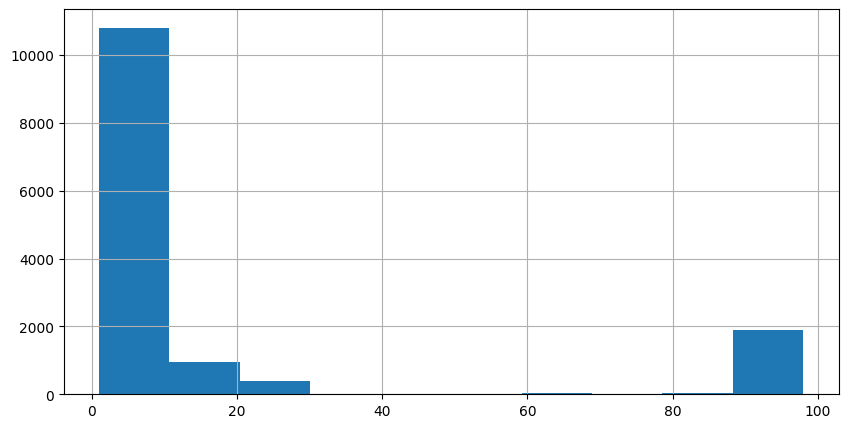

In [123]:
listing_data.minimum_nights_avg_ntm[listing_data.minimum_nights_avg_ntm < 100].hist()

<Axes: >

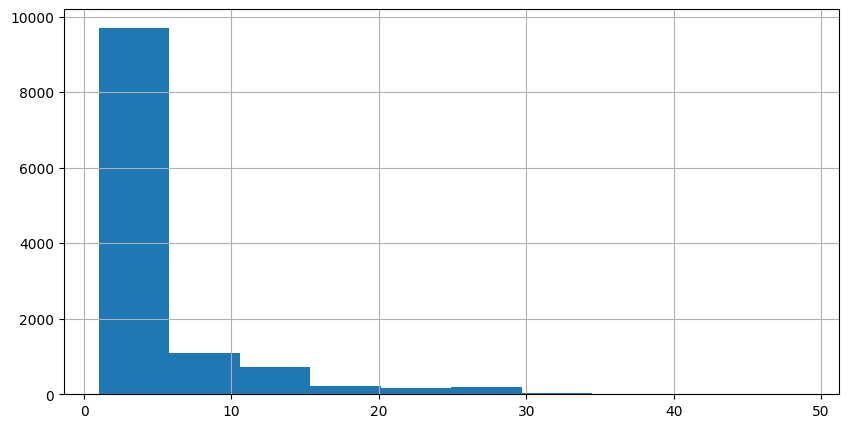

In [124]:
listing_data.minimum_nights_avg_ntm[listing_data.minimum_nights_avg_ntm < 50].hist()

<Axes: >

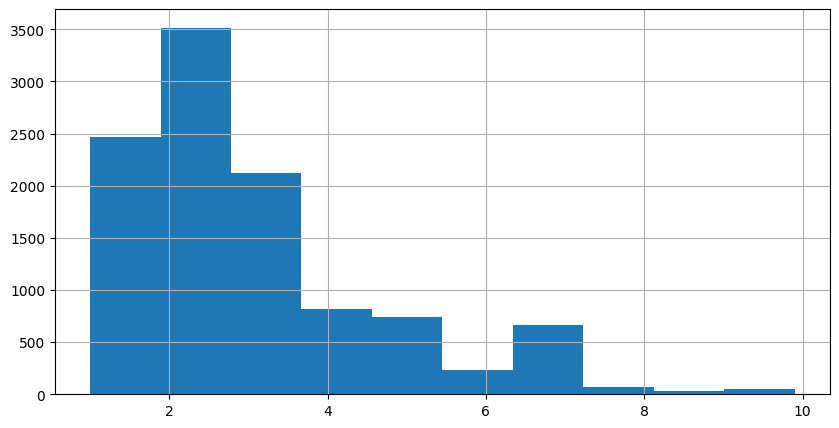

In [125]:
listing_data.minimum_nights_avg_ntm[listing_data.minimum_nights_avg_ntm < 10].hist()

<Axes: >

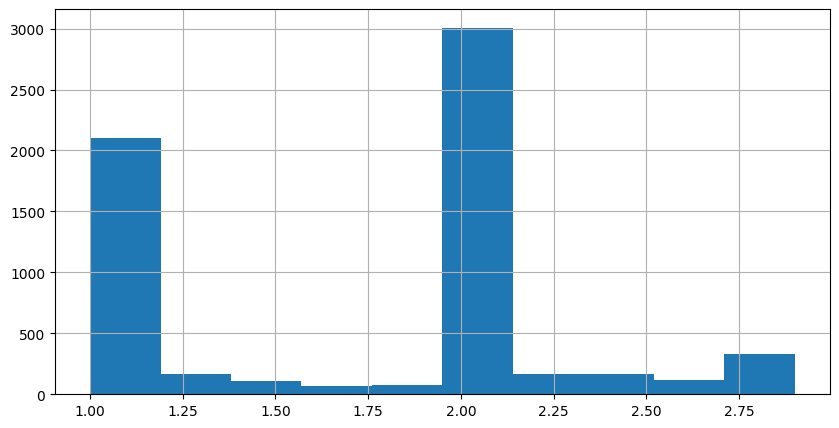

In [126]:
listing_data.minimum_nights_avg_ntm[listing_data.minimum_nights_avg_ntm < 3].hist()

<Axes: >

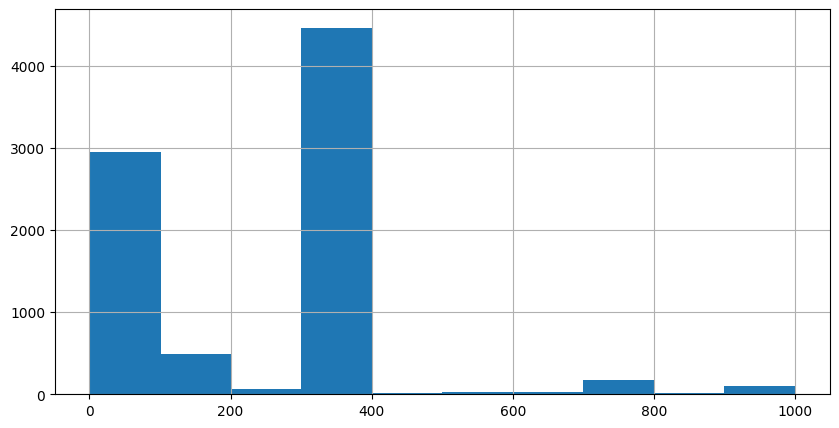

In [134]:
listing_data.maximum_nights_avg_ntm[listing_data.maximum_nights_avg_ntm < 1000].hist()

<Axes: >

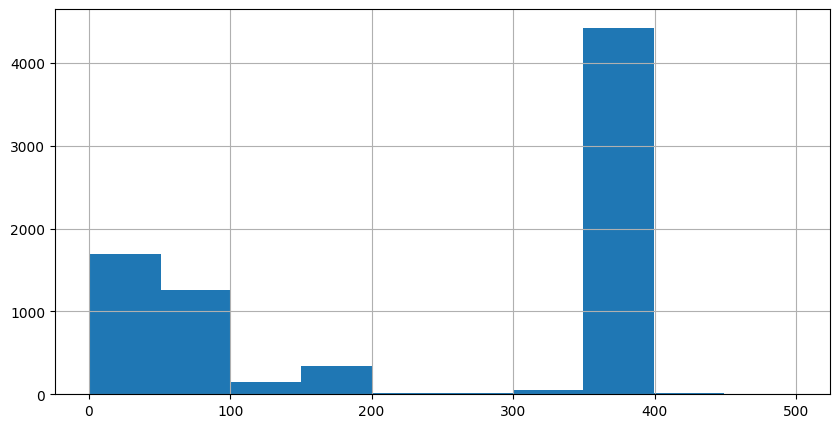

In [135]:
listing_data.maximum_nights_avg_ntm[listing_data.maximum_nights_avg_ntm < 500].hist()

<Axes: >

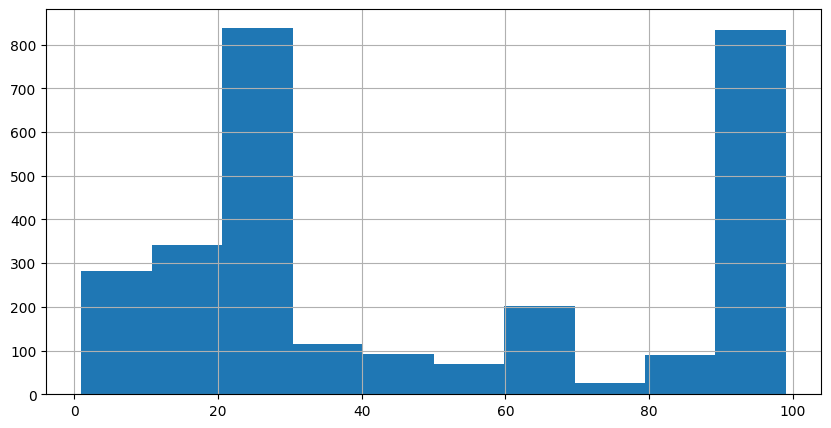

In [136]:
listing_data.maximum_nights_avg_ntm[listing_data.maximum_nights_avg_ntm < 100].hist()

<Axes: >

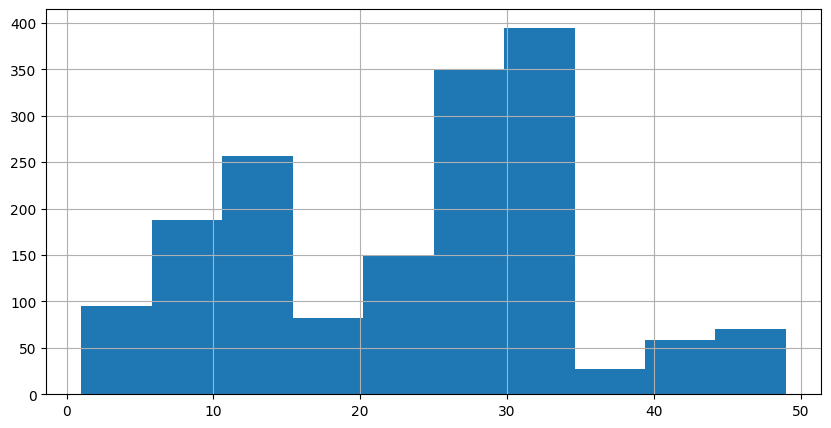

In [137]:
listing_data.maximum_nights_avg_ntm[listing_data.maximum_nights_avg_ntm < 50].hist()

<Axes: >

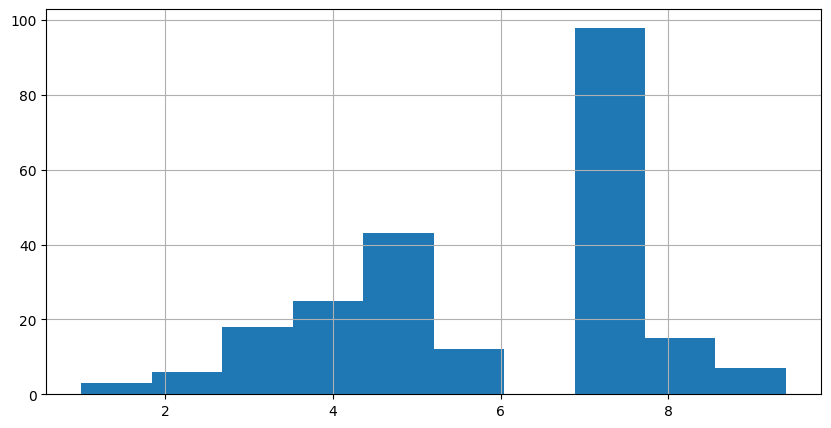

In [138]:
listing_data.maximum_nights_avg_ntm[listing_data.maximum_nights_avg_ntm < 10].hist()

<Axes: >

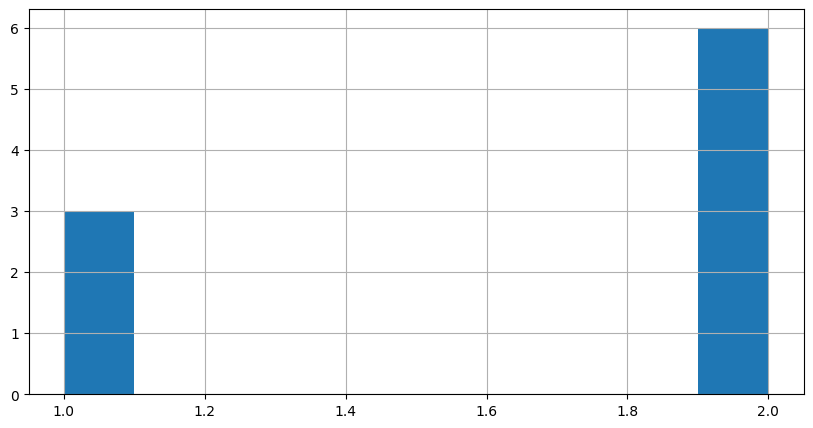

In [139]:
listing_data.maximum_nights_avg_ntm[listing_data.maximum_nights_avg_ntm < 3].hist()

<Axes: >

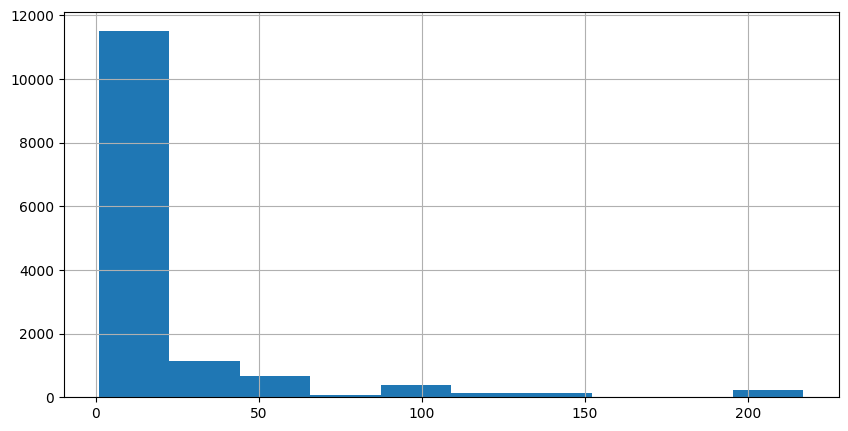

In [140]:
listing_data.calculated_host_listings_count[listing_data.calculated_host_listings_count < 1000].hist()

<Axes: >

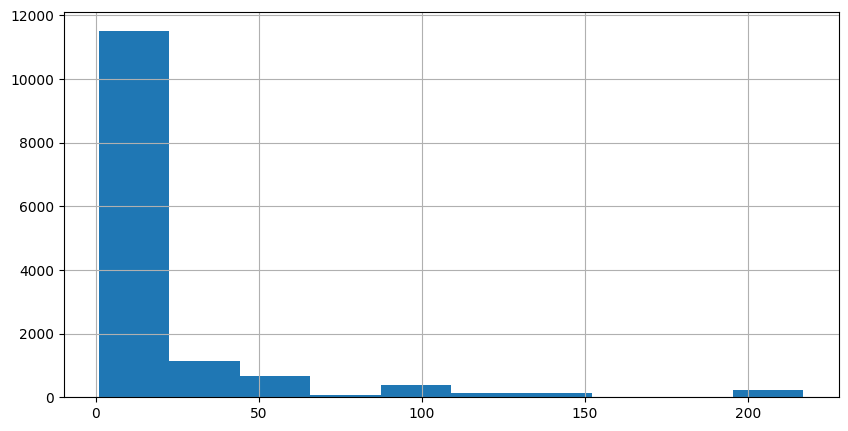

In [141]:
listing_data.calculated_host_listings_count[listing_data.calculated_host_listings_count < 500].hist()

<Axes: >

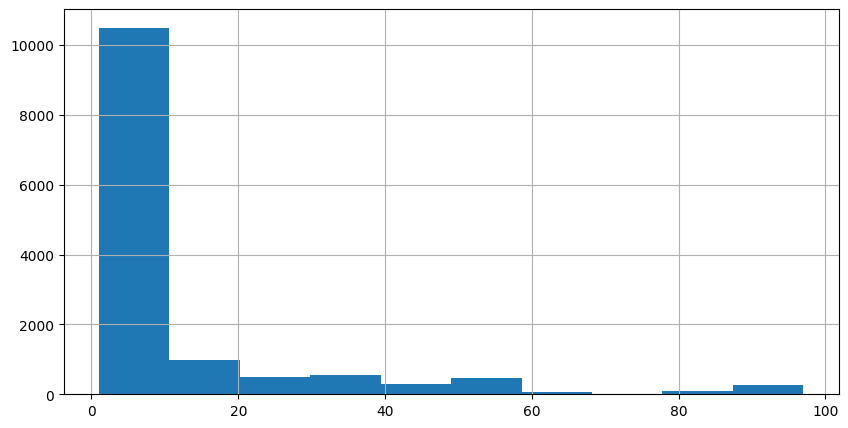

In [142]:
listing_data.calculated_host_listings_count[listing_data.calculated_host_listings_count < 100].hist()

<Axes: >

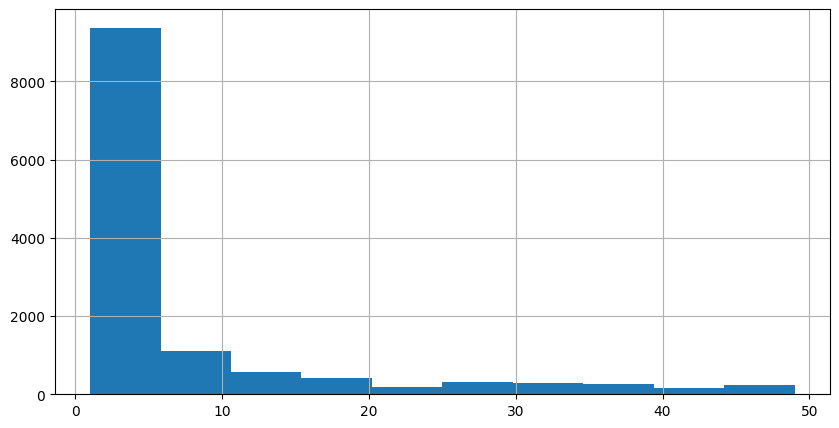

In [143]:
listing_data.calculated_host_listings_count[listing_data.calculated_host_listings_count < 50].hist()

<Axes: >

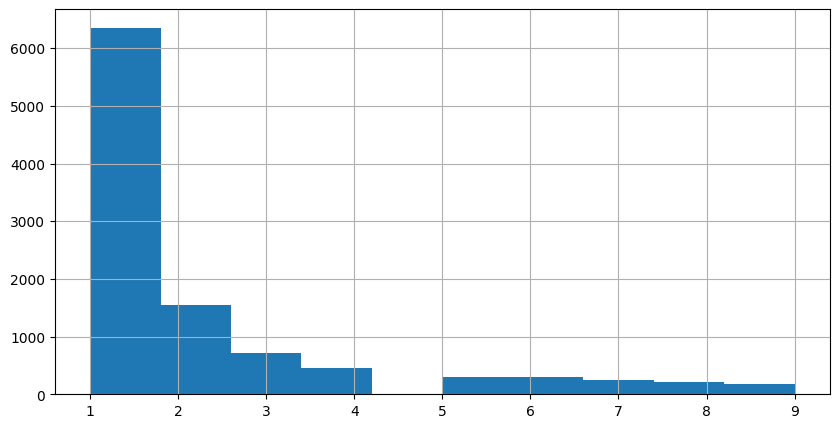

In [144]:
listing_data.calculated_host_listings_count[listing_data.calculated_host_listings_count < 10].hist()

<Axes: >

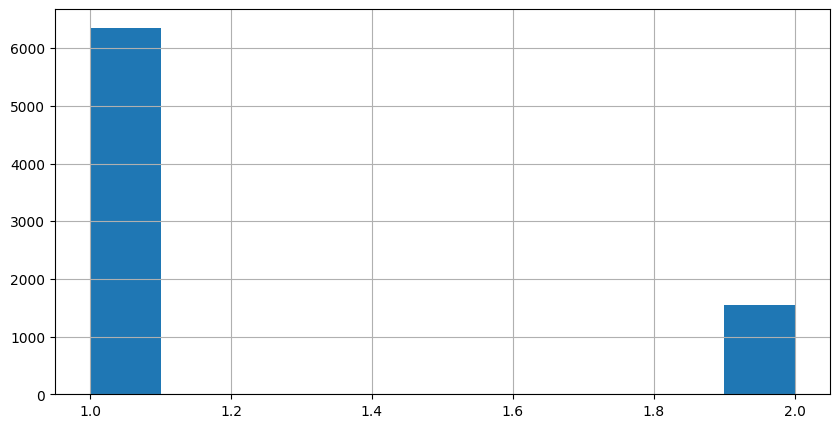

In [145]:
listing_data.calculated_host_listings_count[listing_data.calculated_host_listings_count < 3].hist()

<Axes: >

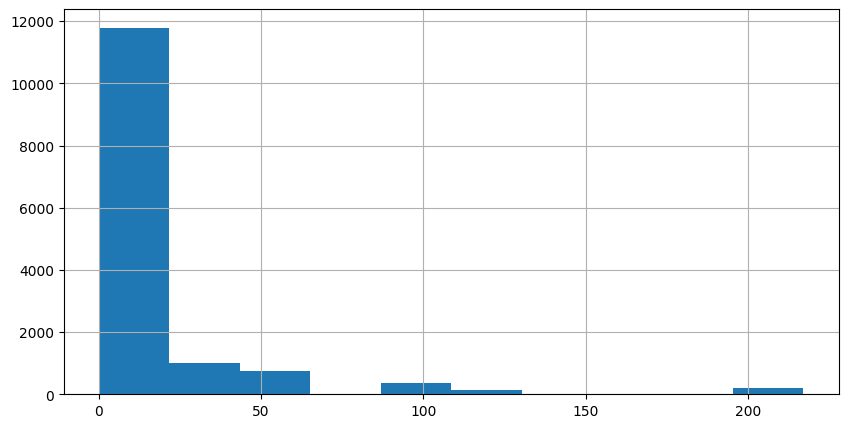

In [146]:
listing_data.calculated_host_listings_count_entire_homes[listing_data.calculated_host_listings_count_entire_homes < 1000].hist()

<Axes: >

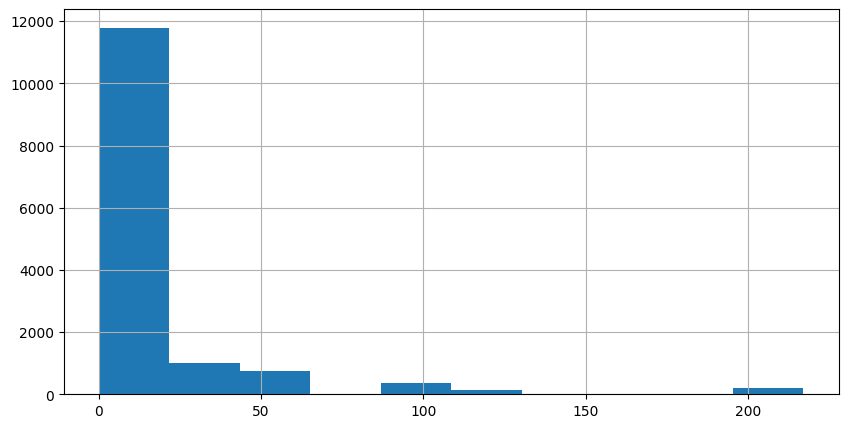

In [147]:
listing_data.calculated_host_listings_count_entire_homes[listing_data.calculated_host_listings_count_entire_homes < 500].hist()

<Axes: >

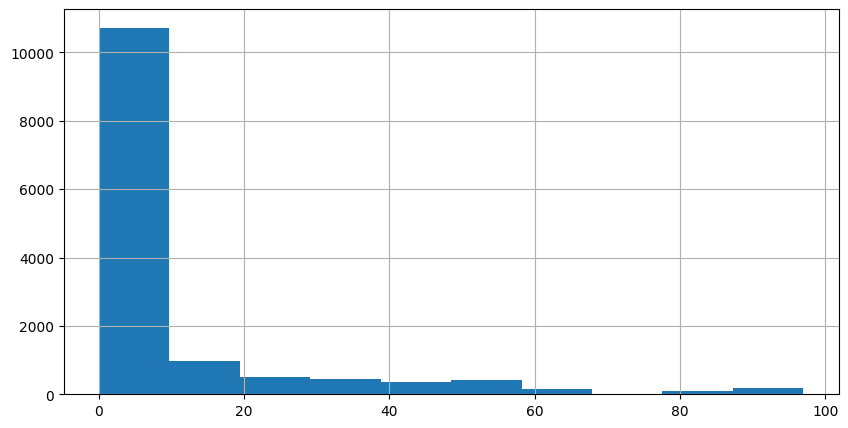

In [148]:
listing_data.calculated_host_listings_count_entire_homes[listing_data.calculated_host_listings_count_entire_homes < 100].hist()

<Axes: >

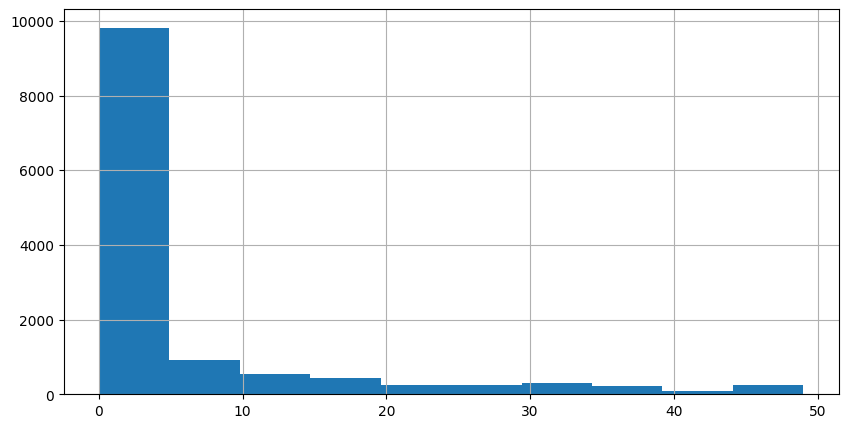

In [149]:
listing_data.calculated_host_listings_count_entire_homes[listing_data.calculated_host_listings_count_entire_homes < 50].hist()

<Axes: >

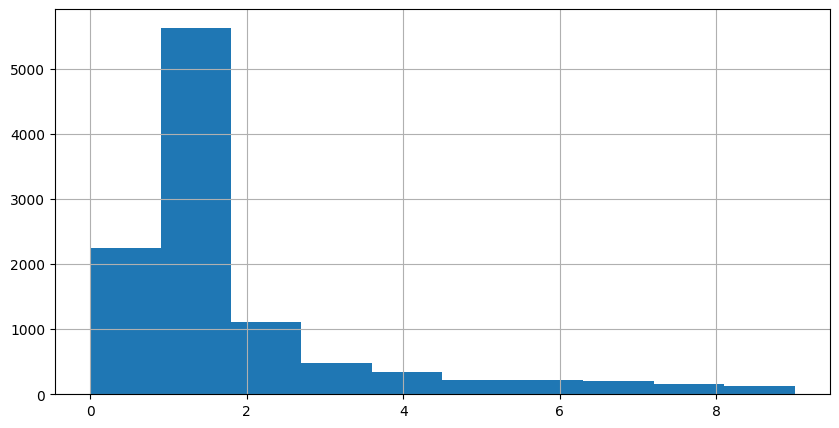

In [150]:
listing_data.calculated_host_listings_count_entire_homes[listing_data.calculated_host_listings_count_entire_homes < 10].hist()

<Axes: >

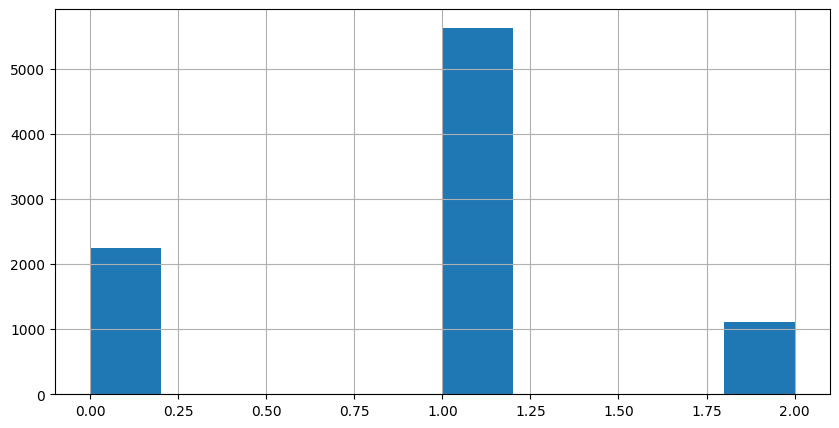

In [152]:
listing_data.calculated_host_listings_count_entire_homes[listing_data.calculated_host_listings_count_entire_homes < 3].hist()

<Axes: >

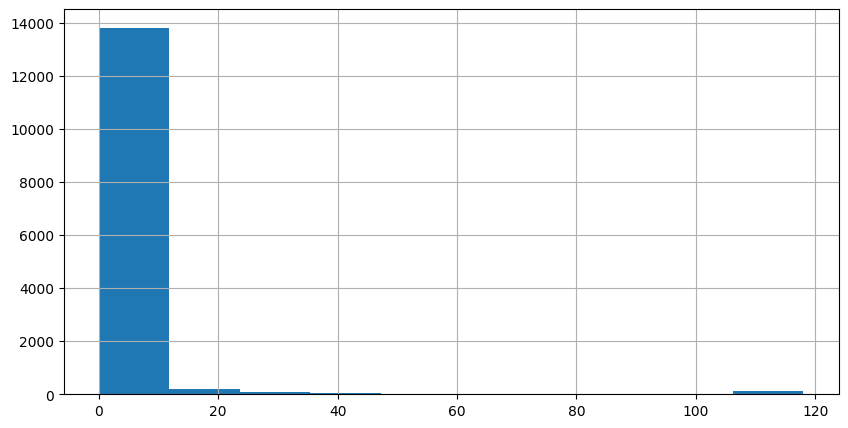

In [153]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 1000].hist()

<Axes: >

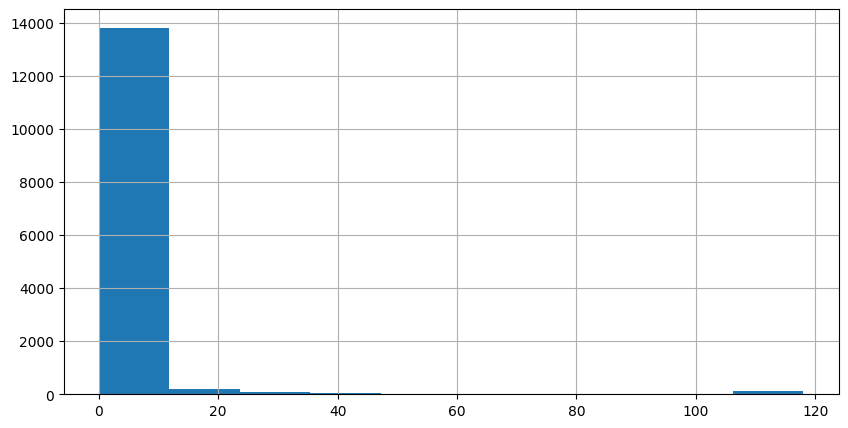

In [154]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 500].hist()

<Axes: >

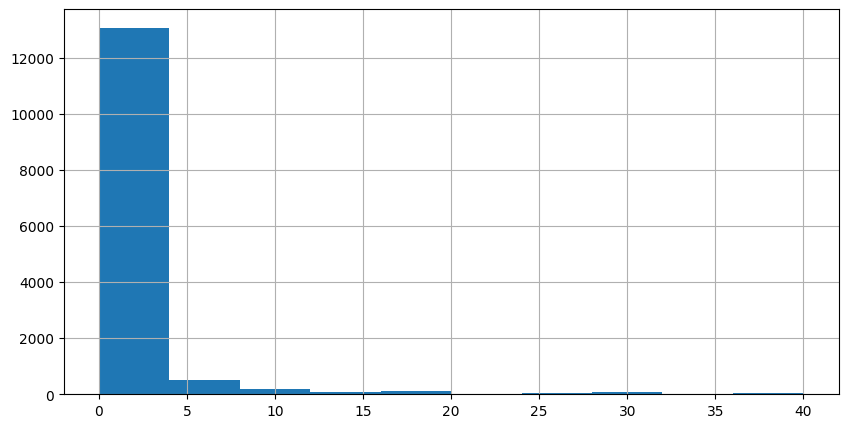

In [155]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 100].hist()

<Axes: >

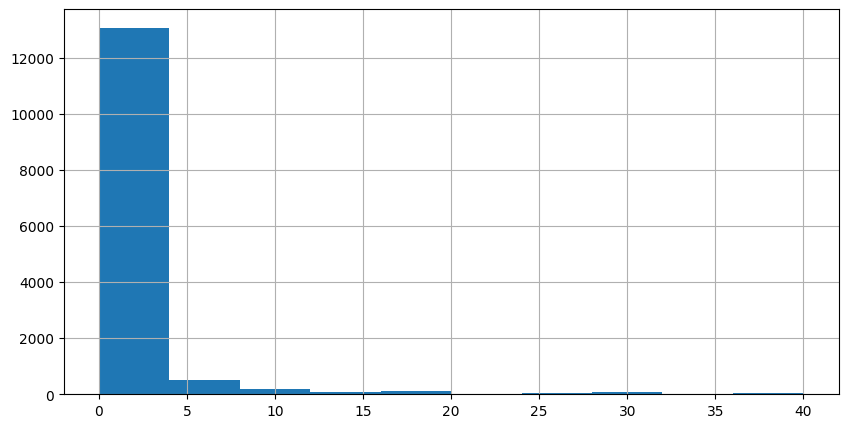

In [156]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 50].hist()

<Axes: >

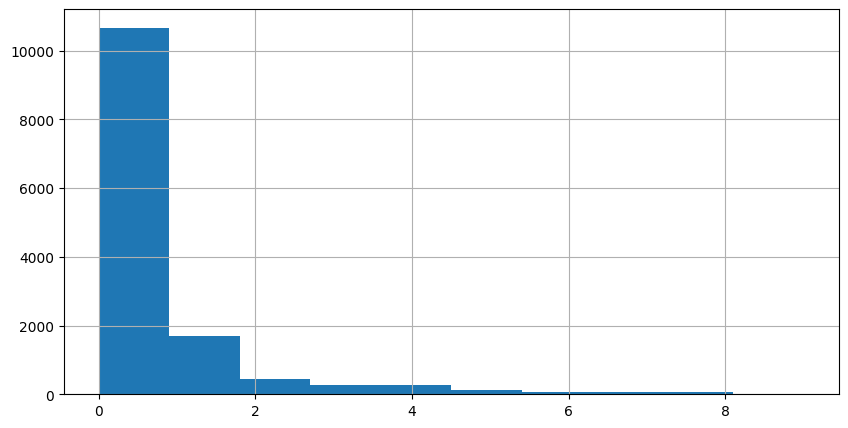

In [157]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 10].hist()

<Axes: >

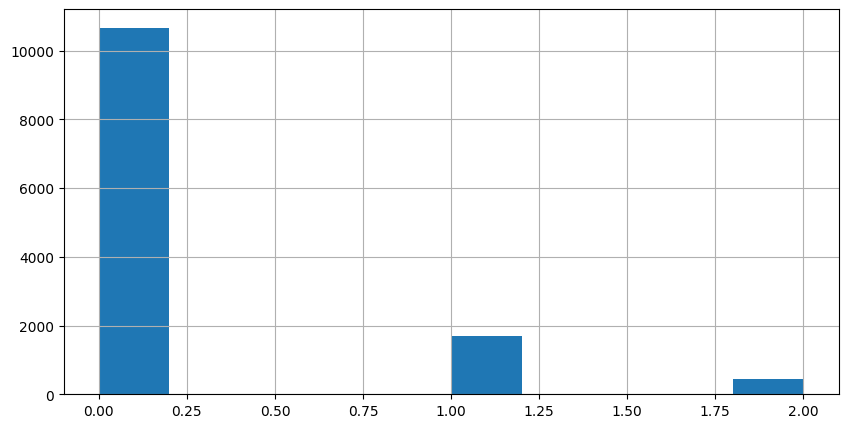

In [158]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 3].hist()

<Axes: >

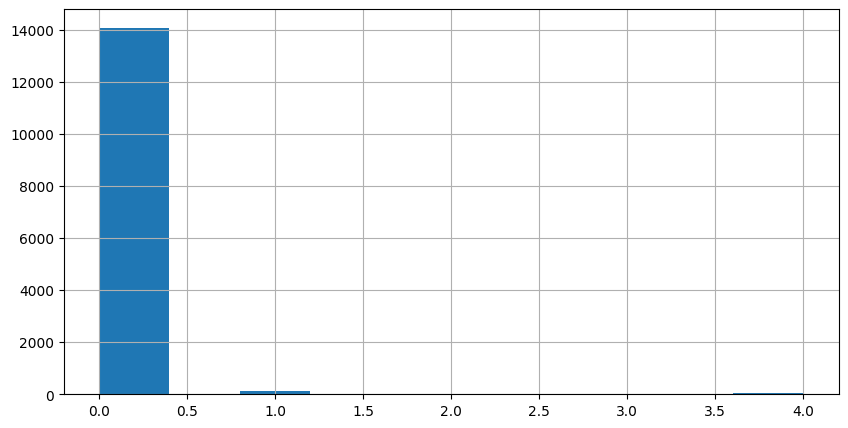

In [159]:
listing_data.calculated_host_listings_count_shared_rooms[listing_data.calculated_host_listings_count_shared_rooms < 1000].hist()

<Axes: >

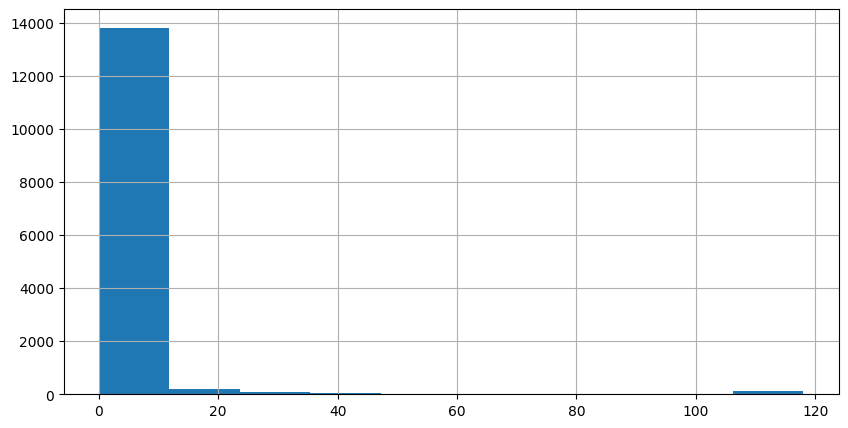

In [160]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 500].hist()

<Axes: >

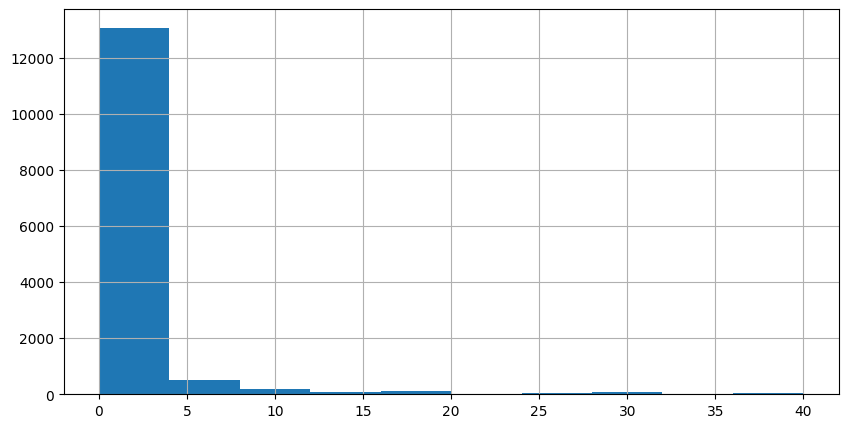

In [161]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 100].hist()

<Axes: >

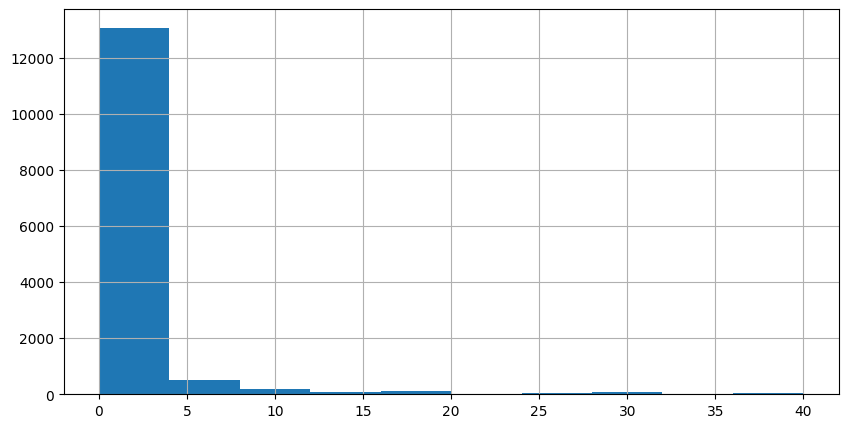

In [162]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 50].hist()

<Axes: >

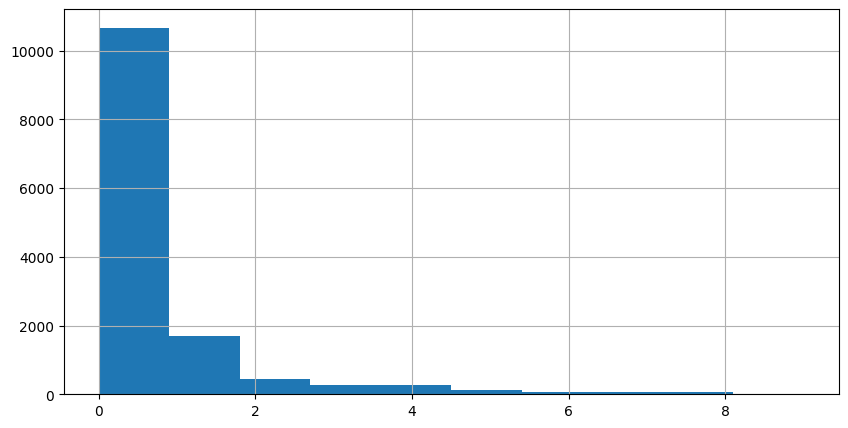

In [163]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 10].hist()

<Axes: >

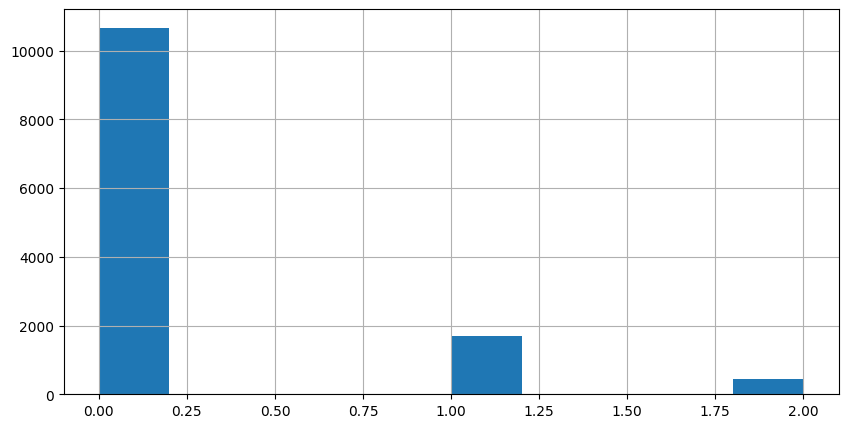

In [164]:
listing_data.calculated_host_listings_count_private_rooms[listing_data.calculated_host_listings_count_private_rooms < 3].hist()

<Axes: >

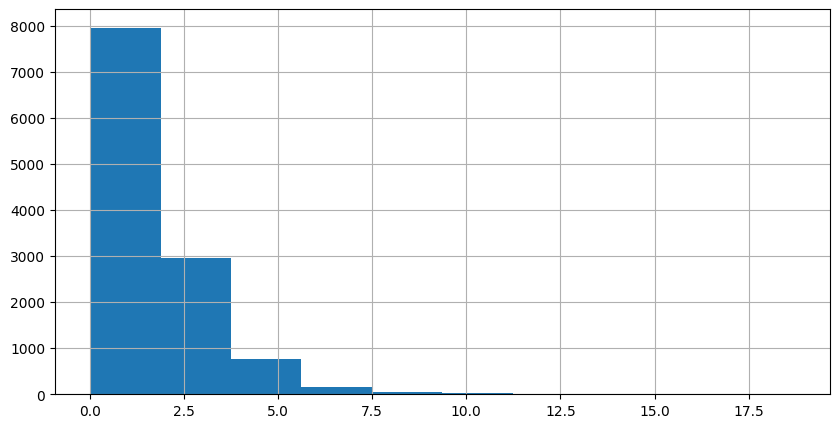

In [165]:
listing_data.reviews_per_month[listing_data.reviews_per_month < 1000].hist()

<Axes: >

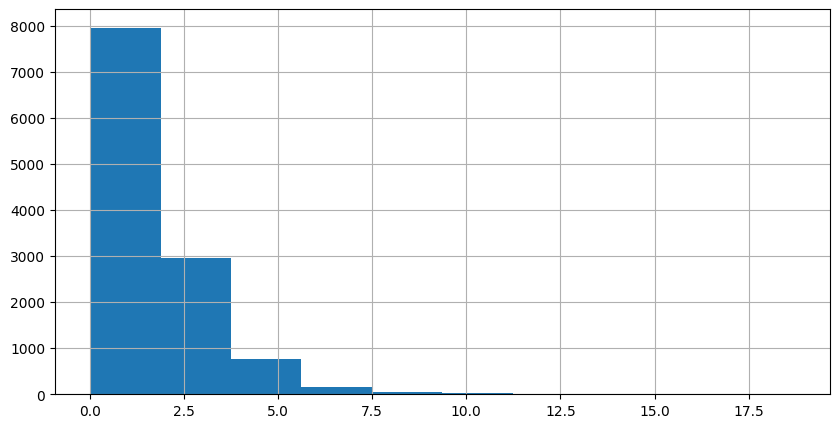

In [166]:
listing_data.reviews_per_month[listing_data.reviews_per_month < 500].hist()

<Axes: >

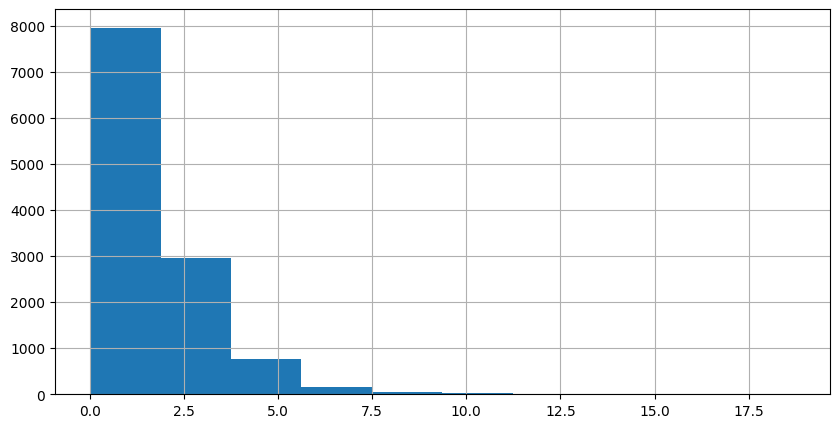

In [167]:
listing_data.reviews_per_month[listing_data.reviews_per_month < 100].hist()

<Axes: >

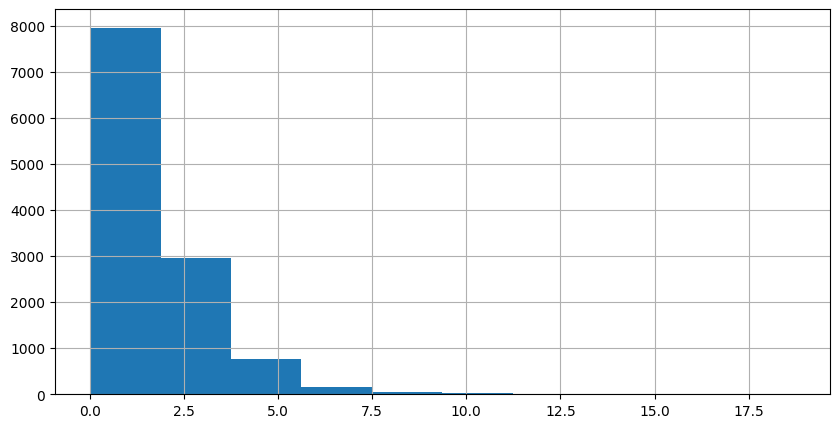

In [168]:
listing_data.reviews_per_month[listing_data.reviews_per_month < 50].hist()

<Axes: >

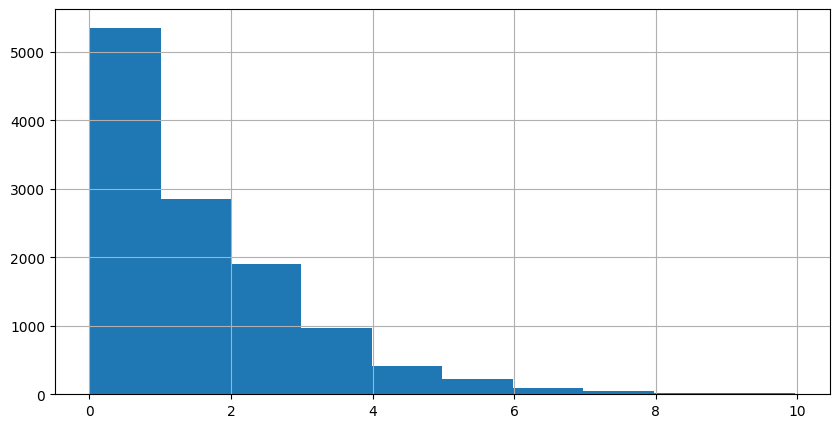

In [169]:
listing_data.reviews_per_month[listing_data.reviews_per_month < 10].hist()

<Axes: >

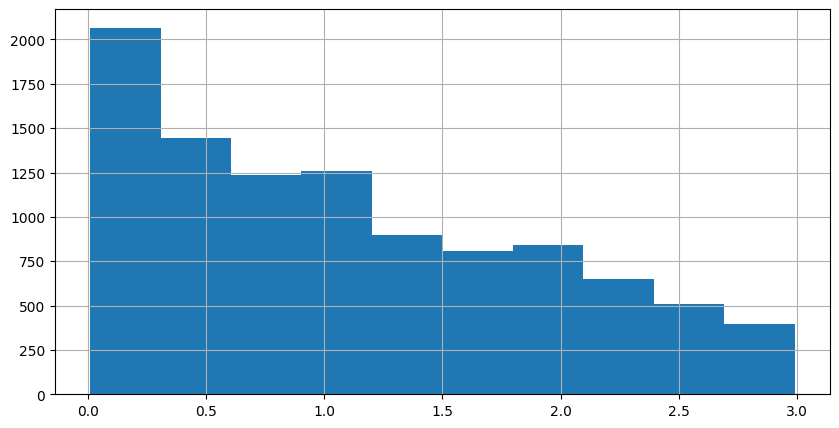

In [170]:
listing_data.reviews_per_month[listing_data.reviews_per_month < 3].hist()

<Axes: >

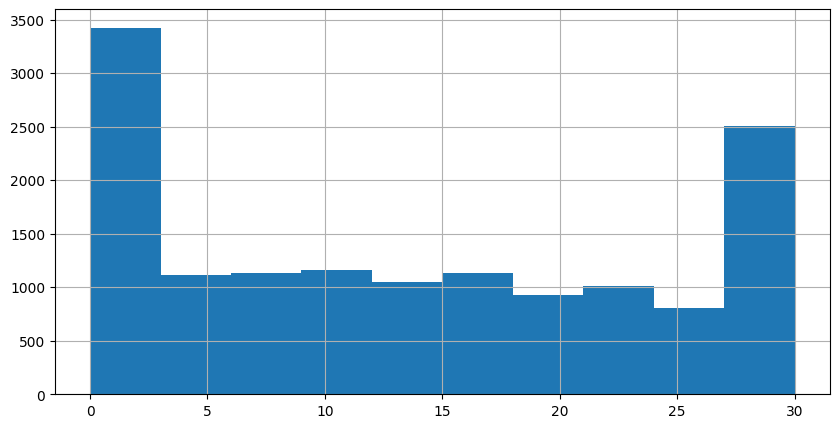

In [171]:
listing_data.availability_30[listing_data.availability_30 < 50].hist()

<Axes: >

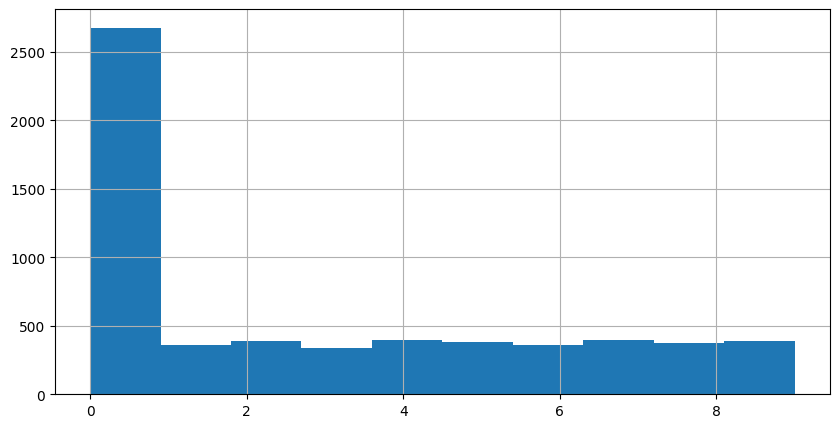

In [172]:
listing_data.availability_30[listing_data.availability_30 < 10].hist()

<Axes: >

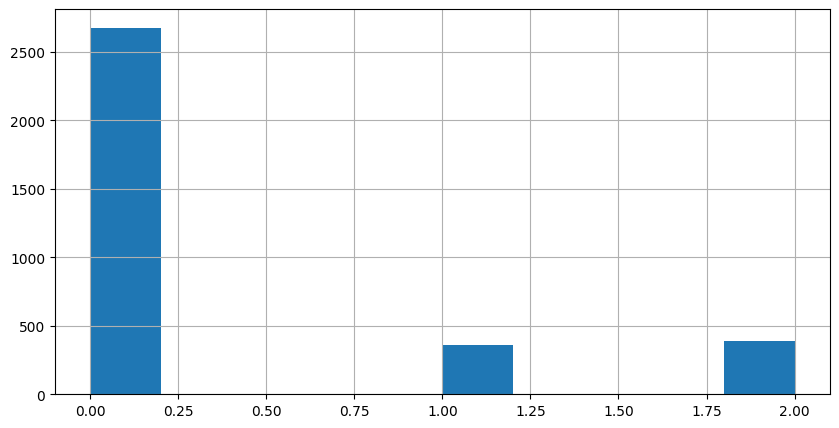

In [173]:
listing_data.availability_30[listing_data.availability_30 < 3].hist()

<Axes: >

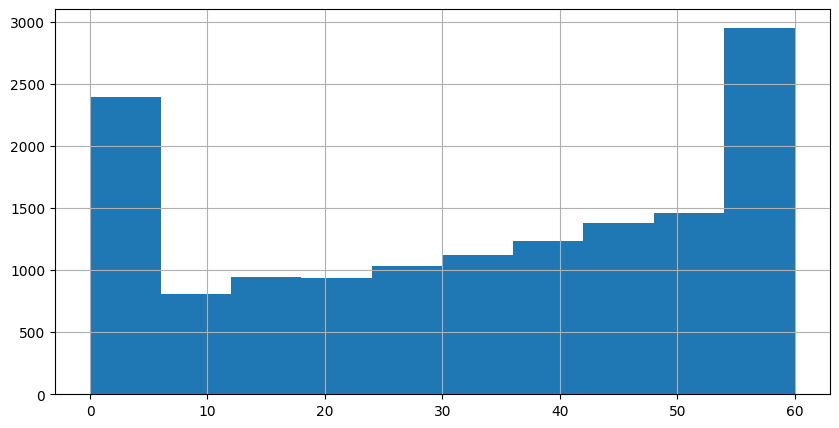

In [174]:
listing_data.availability_60[listing_data.availability_60 < 100].hist()

<Axes: >

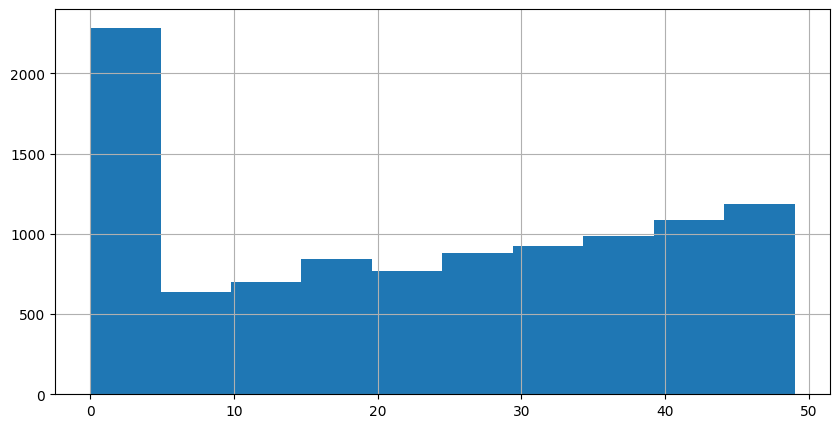

In [175]:
listing_data.availability_60[listing_data.availability_60 < 50].hist()

<Axes: >

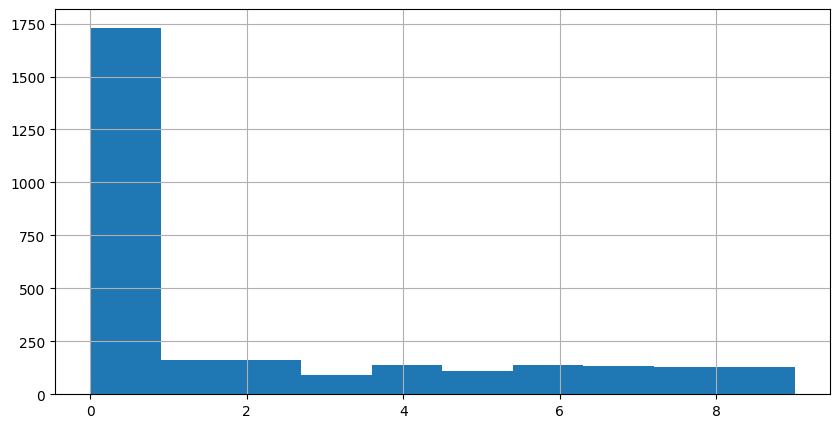

In [176]:
listing_data.availability_60[listing_data.availability_60 < 10].hist()

<Axes: >

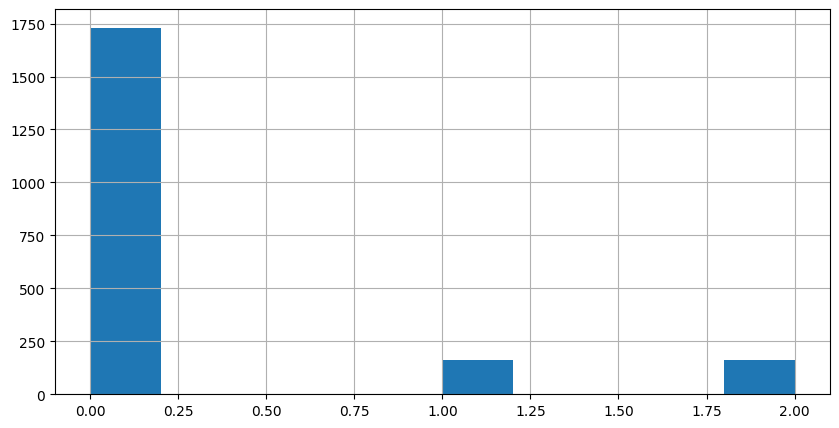

In [177]:
listing_data.availability_60[listing_data.availability_60 < 3].hist()

<Axes: >

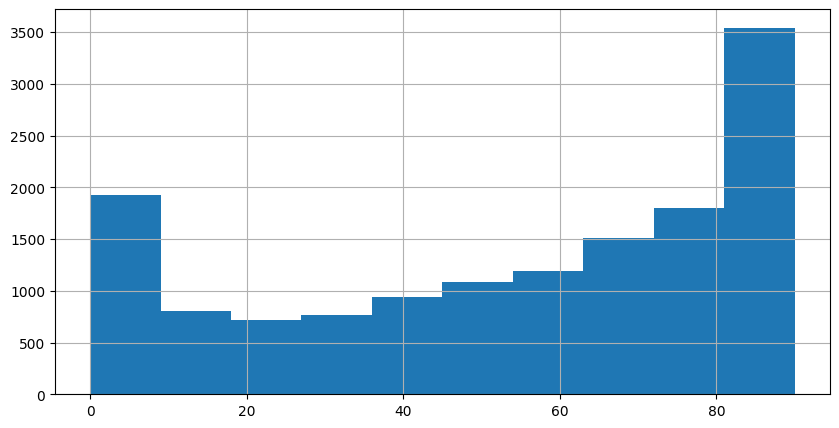

In [178]:
listing_data.availability_90[listing_data.availability_90 < 100].hist()

<Axes: >

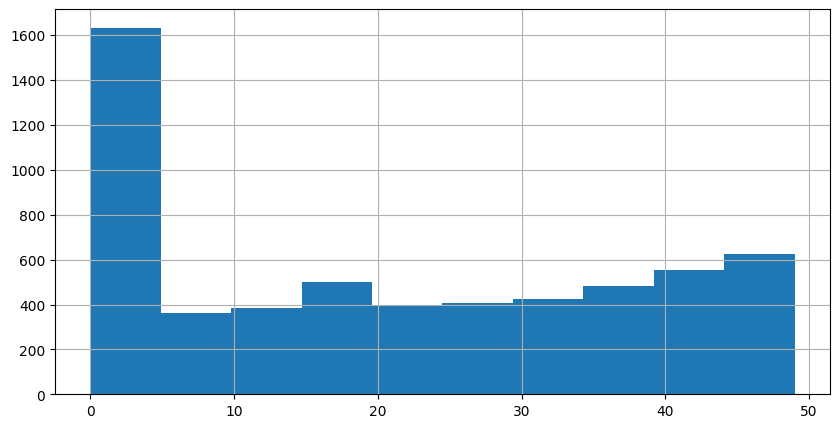

In [179]:
listing_data.availability_90[listing_data.availability_90 < 50].hist()

<Axes: >

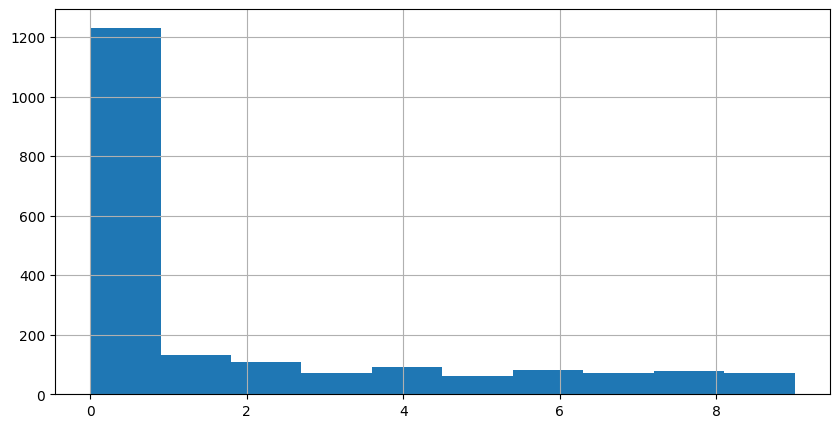

In [180]:
listing_data.availability_90[listing_data.availability_90 < 10].hist()

<Axes: >

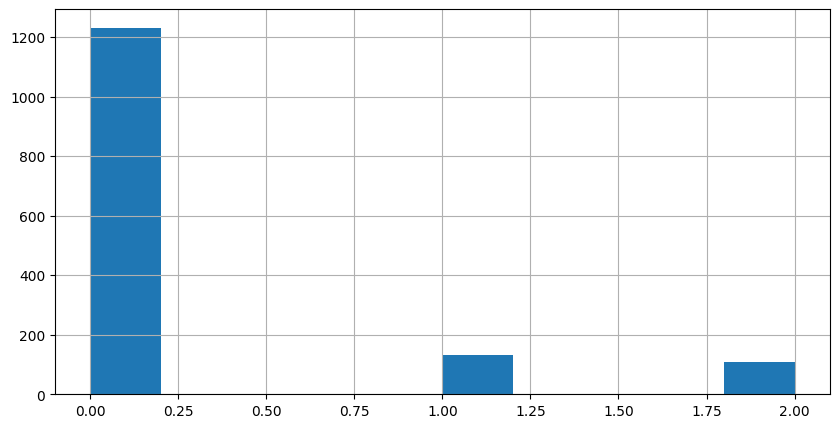

In [181]:
listing_data.availability_90[listing_data.availability_90 < 3].hist()

<Axes: >

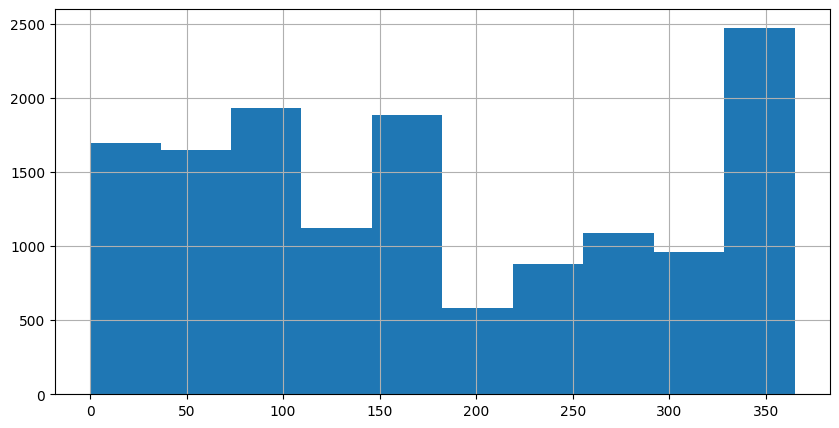

In [182]:
listing_data.availability_365[listing_data.availability_365 < 500].hist()

<Axes: >

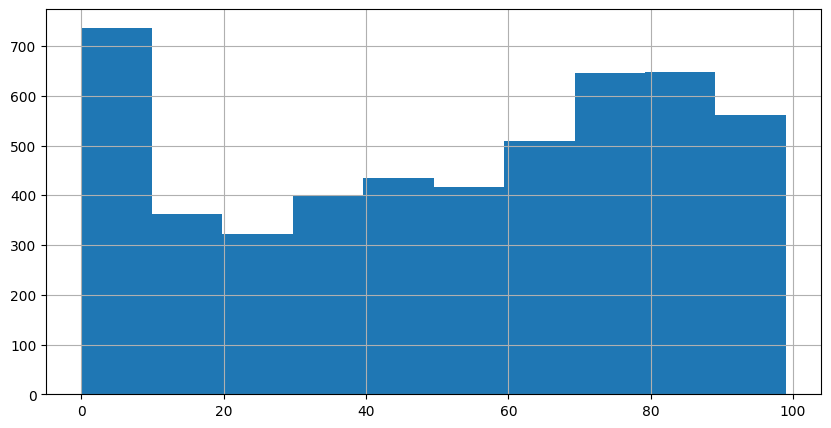

In [183]:
listing_data.availability_365[listing_data.availability_365 < 100].hist()

<Axes: >

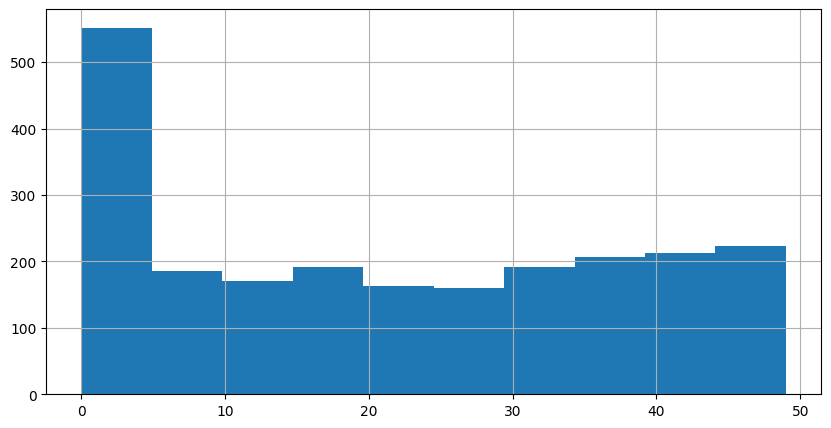

In [184]:
listing_data.availability_365[listing_data.availability_365 < 50].hist()

<Axes: >

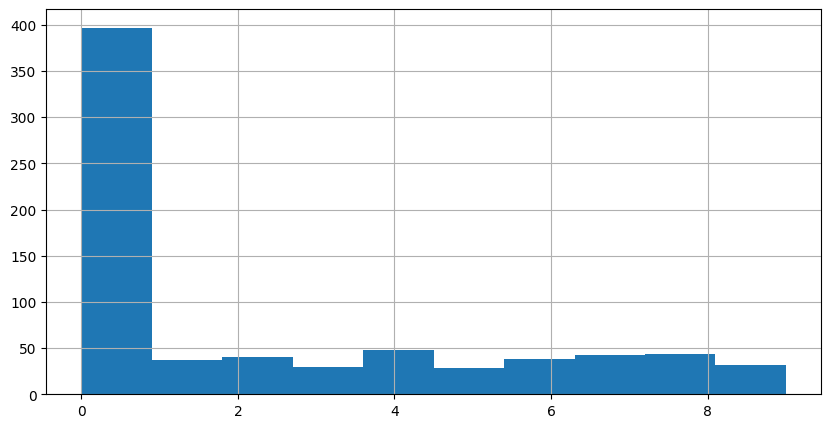

In [185]:
listing_data.availability_365[listing_data.availability_365 < 10].hist()

<Axes: >

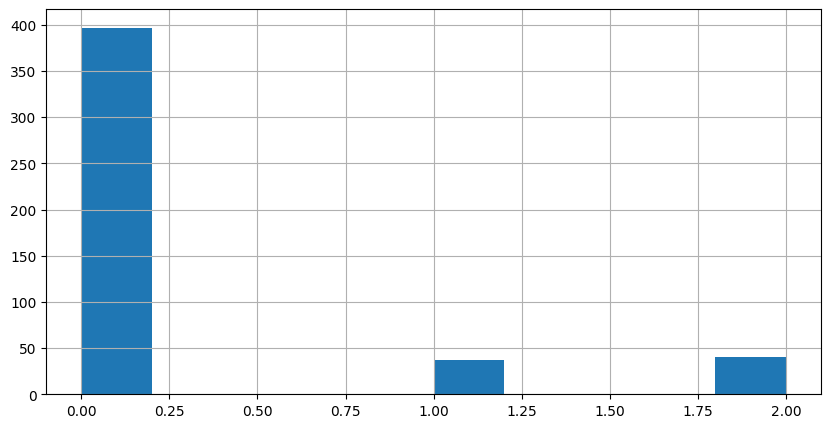

In [186]:
listing_data.availability_365[listing_data.availability_365 < 3].hist()

<Axes: >

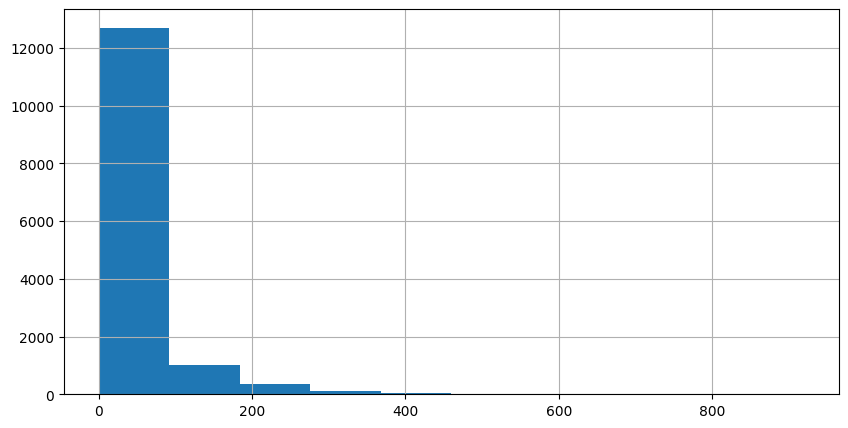

In [189]:
listing_data.number_of_reviews[listing_data.number_of_reviews < 1000].hist()

<Axes: >

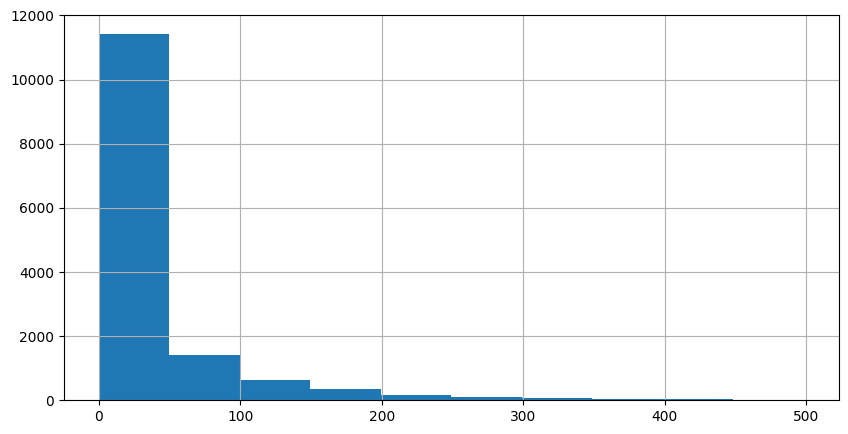

In [190]:
listing_data.number_of_reviews[listing_data.number_of_reviews < 500].hist()

<Axes: >

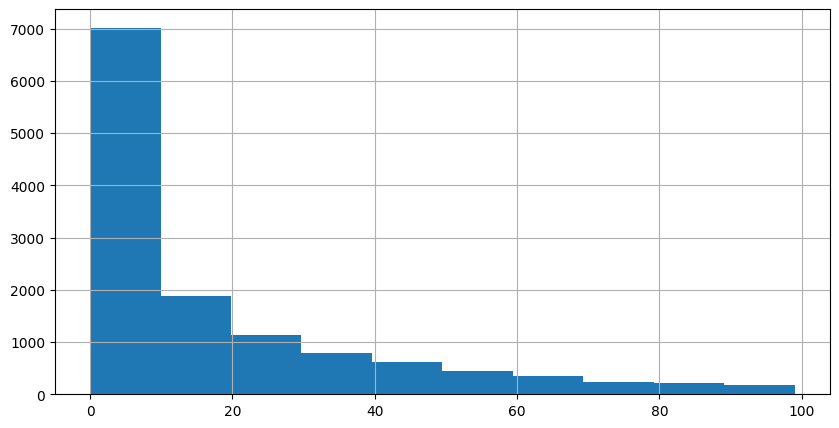

In [191]:
listing_data.number_of_reviews[listing_data.number_of_reviews < 100].hist()

<Axes: >

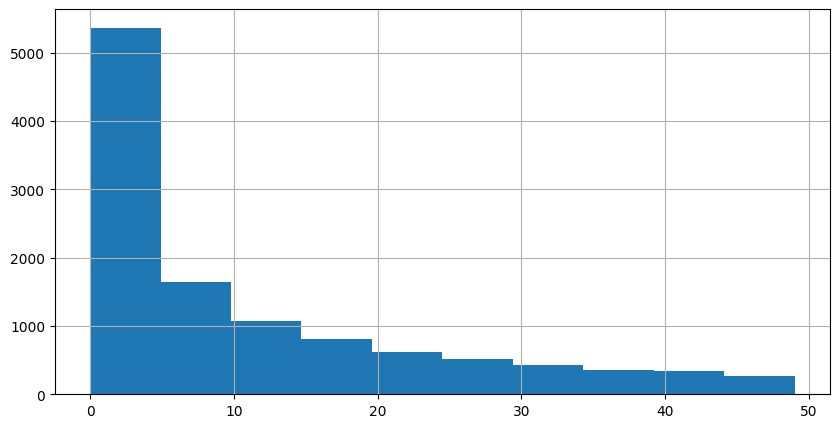

In [192]:
listing_data.number_of_reviews[listing_data.number_of_reviews < 50].hist()

<Axes: >

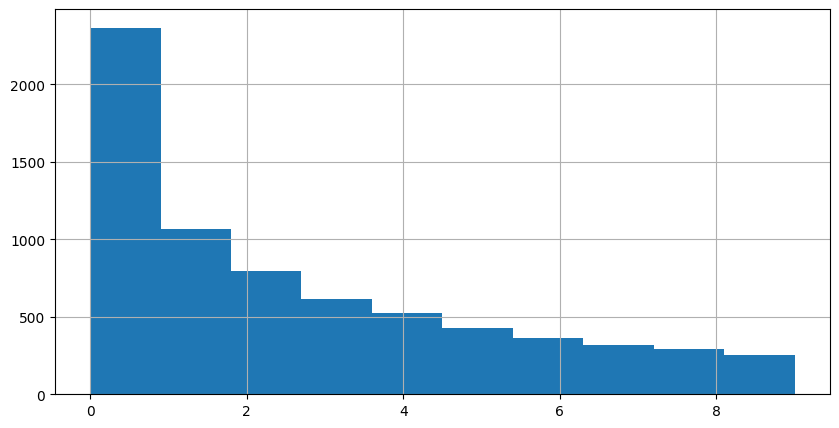

In [193]:
listing_data.number_of_reviews[listing_data.number_of_reviews < 10].hist()

<Axes: >

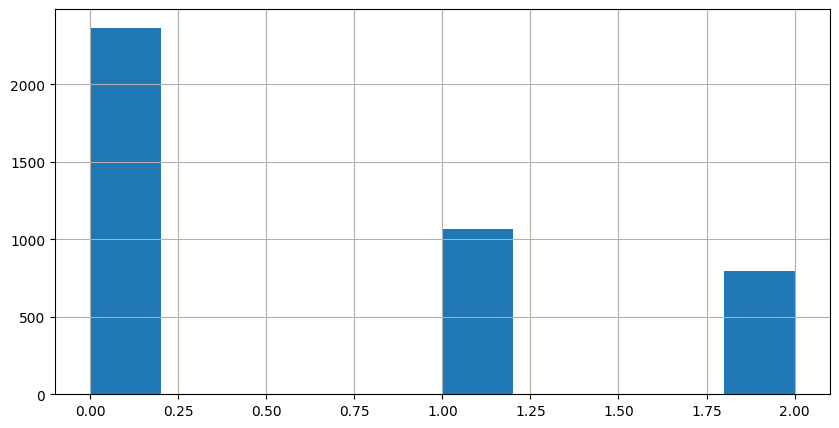

In [194]:
listing_data.number_of_reviews[listing_data.number_of_reviews < 3].hist()

This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

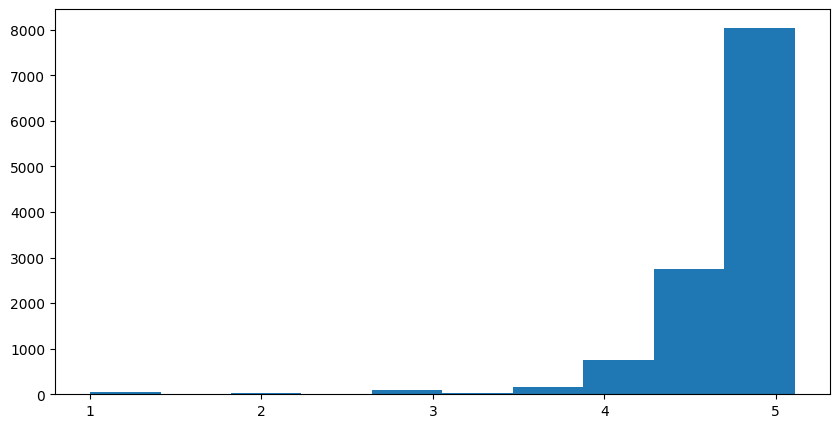

In [195]:
capped_face_value_data = listing_data.review_scores_rating[listing_data.review_scores_rating < 1000]

plt.hist(capped_face_value_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

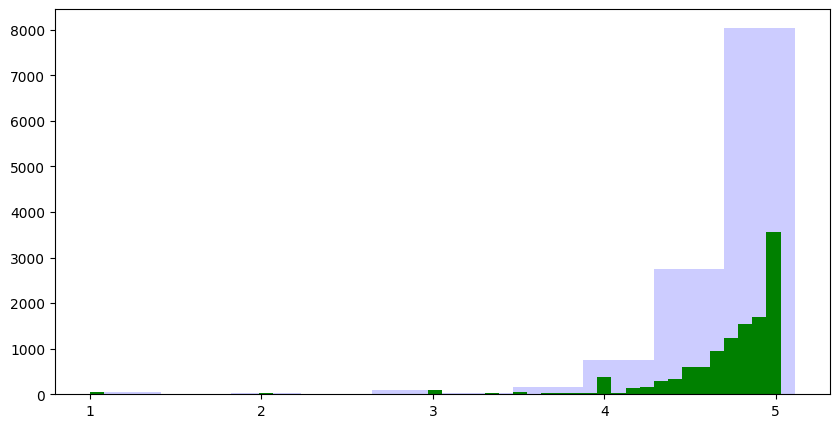

In [196]:
capped_face_value_data = listing_data.review_scores_rating[listing_data.review_scores_rating < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_face_value_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_face_value_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

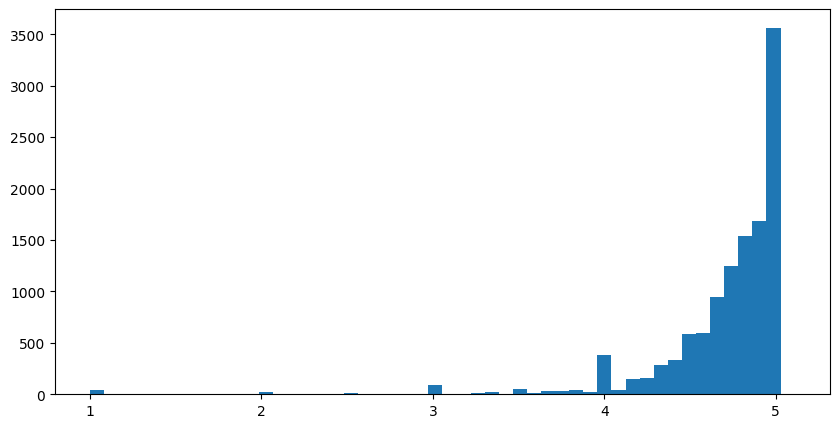

In [197]:
plt.hist(listing_data.review_scores_rating, bins=50)
plt.show()

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

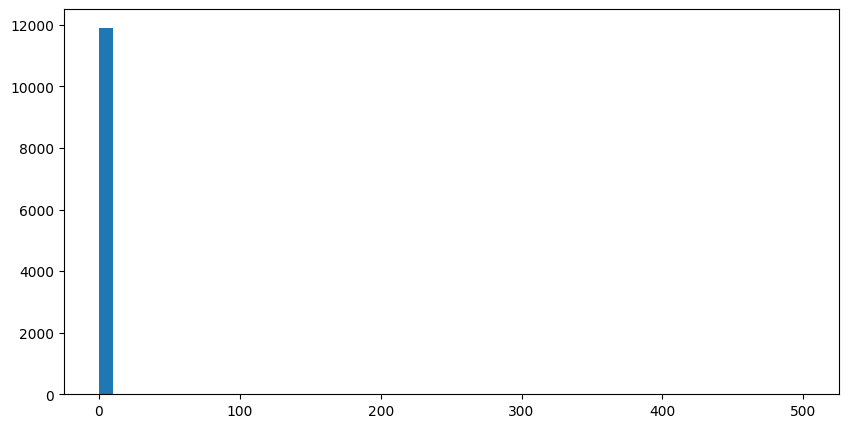

In [198]:
plt.hist(listing_data["review_scores_rating"], bins=50, range=(0, 500))
plt.show()

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

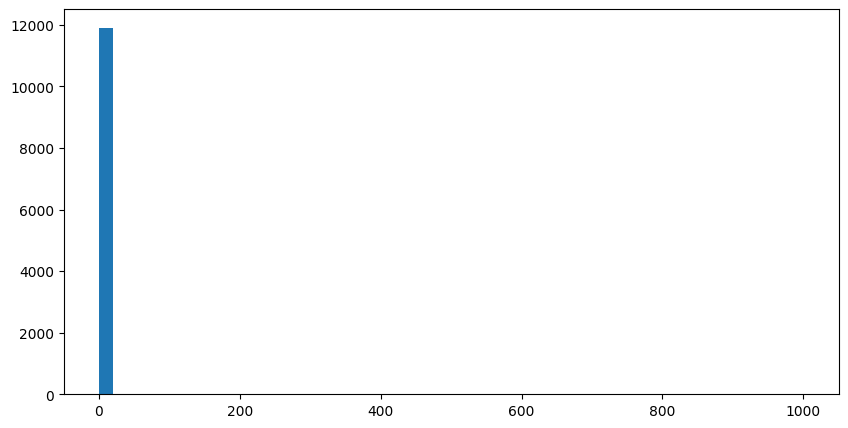

In [199]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    listing_data.review_scores_rating,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()


This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

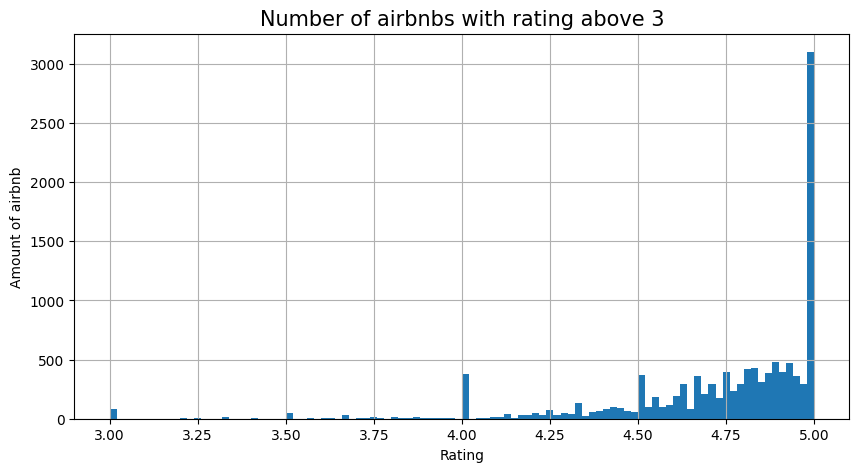

In [200]:
number_of_bins = 100
lower_bound = 3
upper_bound = 5

plt.hist(listing_data.review_scores_rating, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of airbnbs with rating above 3", fontsize=15)
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Amount of airbnb", fontsize=10)
plt.grid(True)
plt.show()


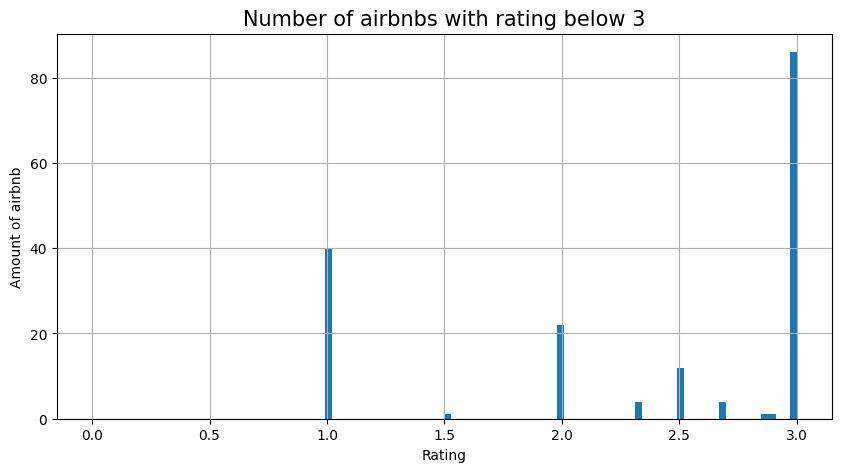

In [201]:
number_of_bins = 100
lower_bound = 0
upper_bound = 3

plt.hist(listing_data.review_scores_rating, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of airbnbs with rating below 3", fontsize=15)
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Amount of airbnb", fontsize=10)
plt.grid(True)
plt.show()

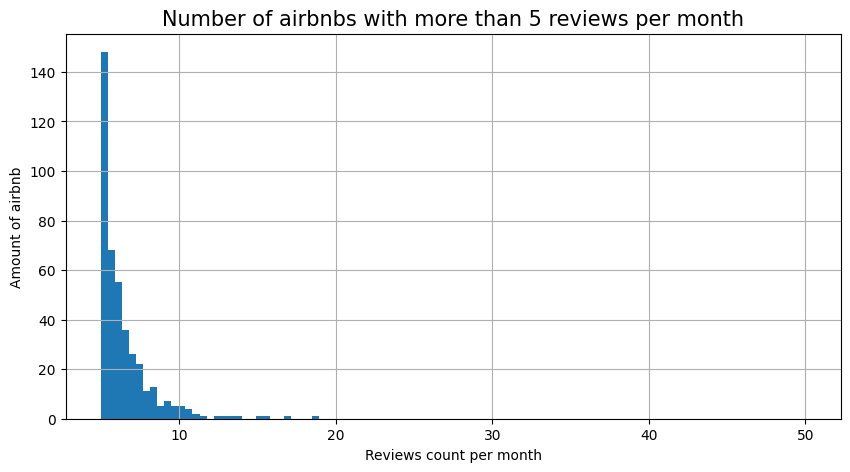

In [203]:
number_of_bins = 100
lower_bound = 5
upper_bound = 50

plt.hist(listing_data.reviews_per_month, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of airbnbs with more than 5 reviews per month", fontsize=15)
plt.xlabel("Reviews count per month", fontsize=10)
plt.ylabel("Amount of airbnb", fontsize=10)
plt.grid(True)
plt.show()

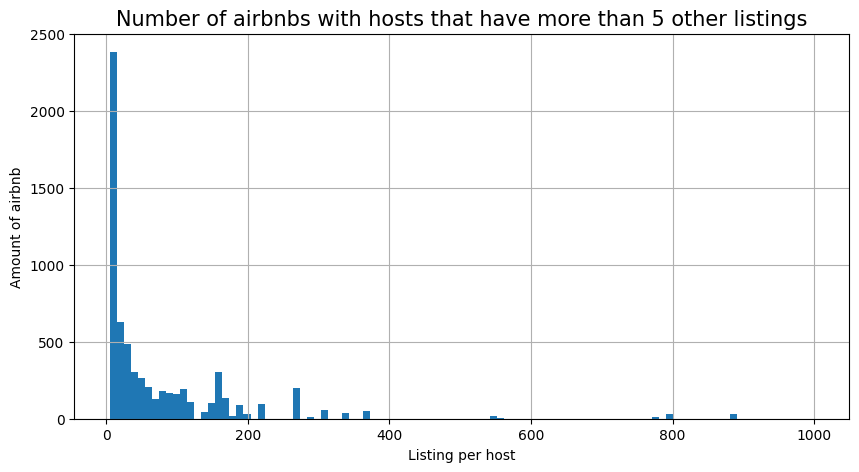

In [206]:
number_of_bins = 100
lower_bound = 5
upper_bound = 1000

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of airbnbs with hosts that have more than 5 other listings", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Amount of airbnb", fontsize=10)
plt.grid(True)
plt.show()

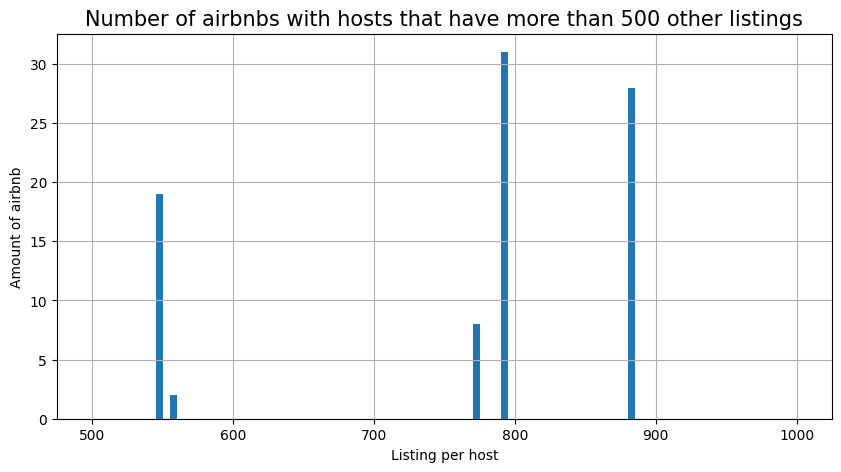

In [207]:
number_of_bins = 100
lower_bound = 500
upper_bound = 1000

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of airbnbs with hosts that have more than 500 other listings", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Amount of airbnb", fontsize=10)
plt.grid(True)
plt.show()

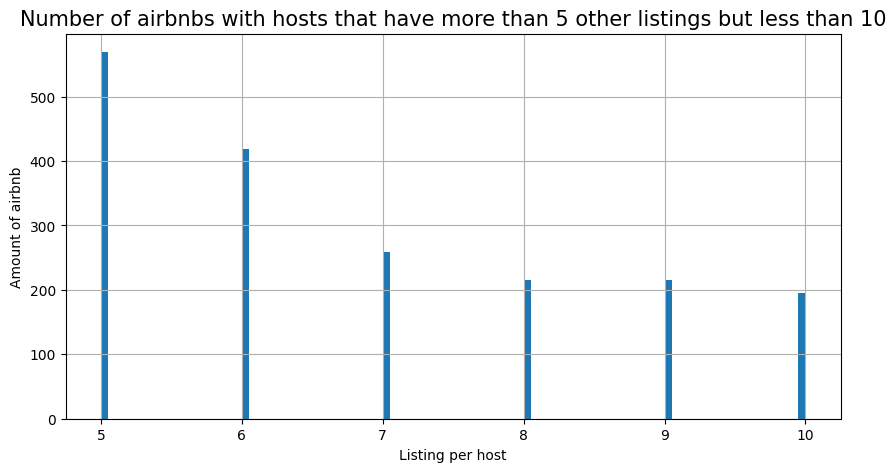

In [209]:
number_of_bins = 100
lower_bound = 5
upper_bound = 10

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of airbnbs with hosts that have more than 5 other listings but less than 10", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Amount of airbnb", fontsize=10)
plt.grid(True)
plt.show()

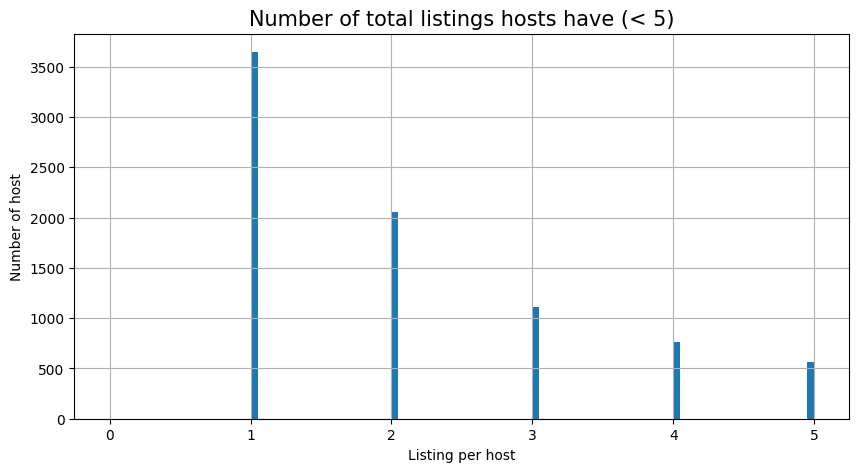

In [213]:
number_of_bins = 100
lower_bound = 0
upper_bound = 5

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of total listings hosts have (< 5)", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Number of host", fontsize=10)
plt.grid(True)
plt.show()

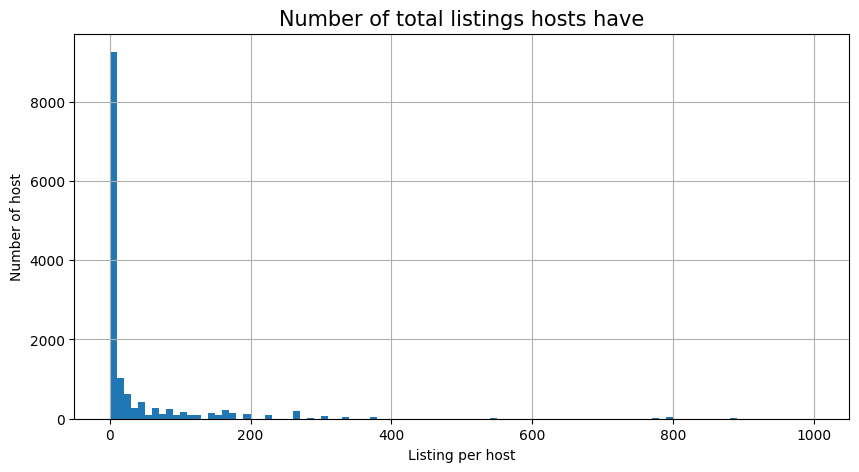

In [215]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of total listings hosts have", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Number of host", fontsize=10)
plt.grid(True)
plt.show()

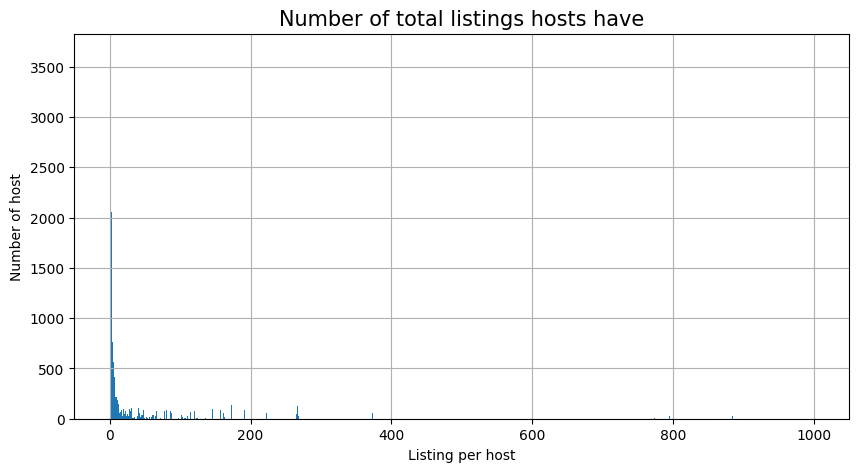

In [216]:
number_of_bins = 1000
lower_bound = 0
upper_bound = 1000

plt.hist(listing_data.host_total_listings_count, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of total listings hosts have", fontsize=15)
plt.xlabel("Listing per host", fontsize=10)
plt.ylabel("Number of host", fontsize=10)
plt.grid(True)
plt.show()

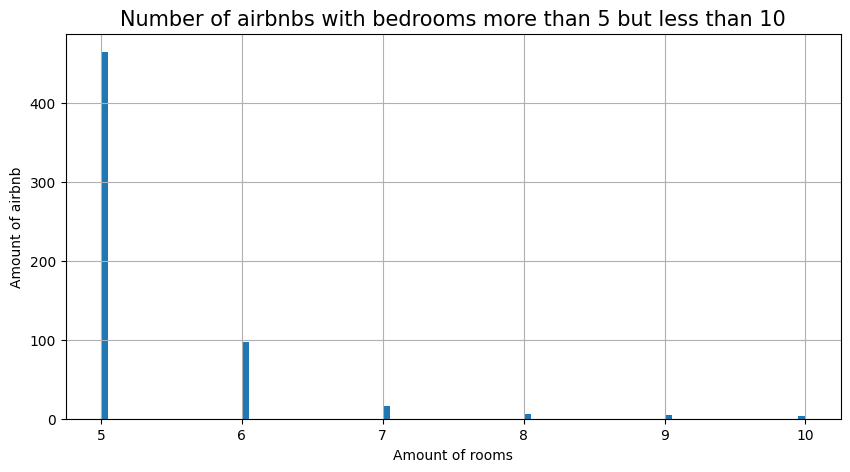

In [218]:
number_of_bins = 100
lower_bound = 5
upper_bound = 10

plt.hist(listing_data.bedrooms, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of airbnbs with bedrooms more than 5 but less than 10", fontsize=15)
plt.xlabel("Amount of rooms", fontsize=10)
plt.ylabel("Amount of airbnb", fontsize=10)
plt.grid(True)
plt.show()

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [167]:
penalty_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["OFFENCE_MONTH"],
    dayfirst=True,
)
penalty_data.head(2)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... RED_LIGHT_CAMERA_IND SPEED_CAMERA_IND SEATBELT_IND  \
0         7163.0  ...                    Y              NaN          NaN   
1            NaN  ...                  NaN              NaN          NaN   

  MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0              NaN         NaN      NaN      NaN                 NaN   
1              NaN           Y      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE  
0           46       16238  
1           78       20670  

[2 rows x 25 columns]

This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [169]:
first_date = penalty_data.OFFENCE_MONTH.min()
last_date = penalty_data.OFFENCE_MONTH.max()
f"range is: {first_date} to {last_date}"


'range is: 2011-07-01 00:00:00 to 2017-02-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [181]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.min(), date_format_pattern)
latest_date = datetime.strftime(penalty_data.OFFENCE_MONTH.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"


'range is: July, 2011 to February, 2017'

Which means that we can put those values into our graph title:

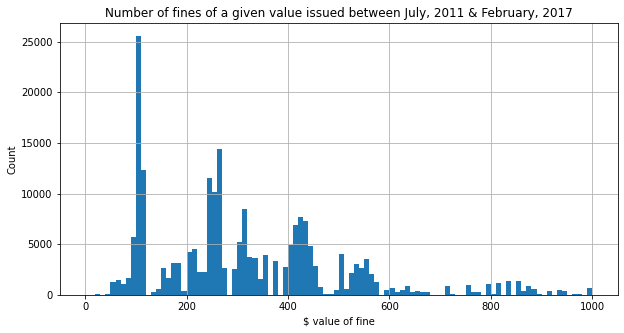

In [190]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

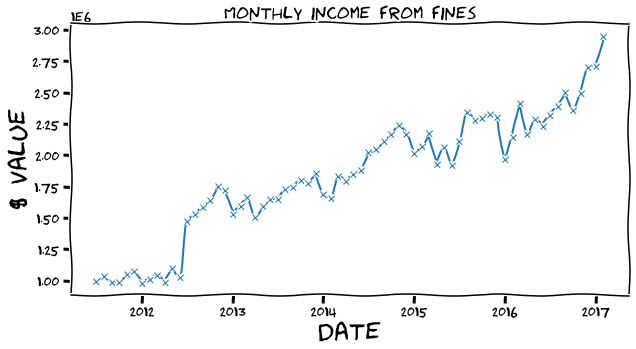

In [182]:
income = penalty_data[["OFFENCE_MONTH", "FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Date", fontsize=26)
plt.ylabel("$ Value", fontsize=26)
plt.grid(True)
plt.show()


In [183]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.1520.0_x64__qbz5n2kfra8p0\lib\_collections_abc.py:940:

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [184]:
ss = penalty_data.loc[:5]


Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [191]:
ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(2)


<ipython-input-191-beb3bd65b756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_lambda"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   
1       2011-2012    2011-07-01          8469   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   
1                  Stop on/near marked foot crossing  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   
1         173(1)         265        NaN                       NaN   

   LOCATION_CODE  ... SEATBELT_IND MOBILE_PHONE_IND PARKING_IND CINS_IND  \
0         7163.0  ...          NaN              NaN         NaN      NaN   
1            NaN  ...          NaN              NaN           Y      NaN   

  FOOD_IND BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  
0      NaN                 NaN           46       16238   1               1  
1      NaN                 NaN           78       20670   1               1  

[2 rows x 27 columns]

Above is equivalent to below, it's up to you to decide what is more readable.

In [192]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-192-ebf8f59cf10c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["day_from_function"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... MOBILE_PHONE_IND PARKING_IND CINS_IND FOOD_IND  \
0         7163.0  ...              NaN         NaN      NaN      NaN   

  BICYCLE_TOY_ETC_IND TOTAL_NUMBER TOTAL_VALUE day day_from_lambda  \
0                 NaN           46       16238   1               1   

  day_from_function  
0                 1  

[1 rows x 28 columns]

Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [194]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)


<ipython-input-194-e3cd89590808>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss["nice_day"] = ss.apply(my_f, axis=1)


OFFENCE_FINYEAR OFFENCE_MONTH  OFFENCE_CODE  \
0       2011-2012    2011-07-01         74731   

                                        OFFENCE_DESC      LEGISLATION  \
0  Proceed through red traffic light - Camera Det...  ROAD RULES 2008   

  SECTION_CLAUSE  FACE_VALUE CAMERA_IND               CAMERA_TYPE  \
0          59(1)         353          Y  Red Light / Speed Camera   

   LOCATION_CODE  ... PARKING_IND CINS_IND FOOD_IND BICYCLE_TOY_ETC_IND  \
0         7163.0  ...         NaN      NaN      NaN                 NaN   

  TOTAL_NUMBER TOTAL_VALUE day day_from_lambda day_from_function nice_day  
0           46       16238   1               1                 1   Friday  

[1 rows x 29 columns]

Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

<AxesSubplot:>

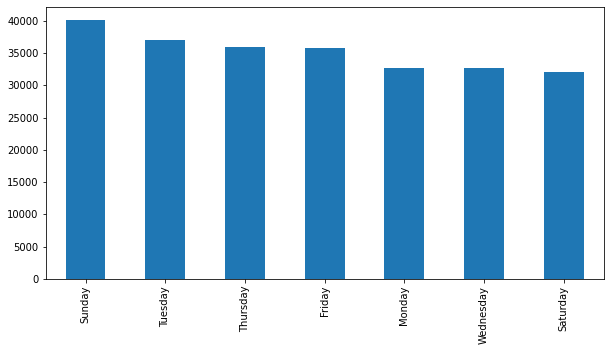

In [195]:
def my_f(x):
    return datetime.strftime(x.OFFENCE_MONTH, "%A")


penalty_data["nice_day"] = penalty_data.apply(my_f, axis=1)
penalty_data.nice_day.value_counts().plot(kind="bar")


And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [187]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))


uni of stairs
Ben Doherty


So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_